# Exploratory Data Analysis (EDA) of Airbnb London Data

In [1]:
# Topic:        Project 2
# Subject:      Exploratory Data Analysis (EDA) of Airbnb London Data
# Date:         23/06/2020
# Name:         yalin yener

In [2]:
# Importing Libraries

import glob
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Reading Files and Creating Data Frame

listing = pd.read_csv("http://data.insideairbnb.com/united-kingdom/england/london/2020-01-09/visualisations/listings.csv")
uk_house_price=pd.read_excel("/Users/yalinyener/GitHub/yalinyener/EDA-Airbnb-London/data/UK_House_price_index.xlsx",sheet_name="Average price")
council_tax=pd.read_excel("/Users/yalinyener/GitHub/yalinyener/EDA-Airbnb-London/data/council-tax-bands-borough.xlsx",sheet_name="2020-21")
sales_volume=pd.read_excel("/Users/yalinyener/GitHub/yalinyener/EDA-Airbnb-London/data/UK_House_price_index.xlsx",sheet_name="Sales Volume")
house_price = pd.read_csv("/Users/yalinyener/GitHub/yalinyener/EDA-Airbnb-London/data/HousePrice.csv")

In [4]:
#Checking Data Frame - listing

listing.sample(5)

id                                               name    host_id  \
29244  18889027    *** Modern clean Very good room super transport    1591664   
26499  17617294     Bright Double Room & Private Bathroom in Cheam    2356196   
47719  26773599  Beautiful 2 Bed Home - East London, Victoria Line    1340830   
54642  30141559  Luxury 2 bed + 2 bath flat + HOT TUB, GYM AND ...    1478314   
72674  37731454                    Bright 1BD in South West London  237869054   

       host_name  neighbourhood_group           neighbourhood  latitude  \
29244      Boris                  NaN           Tower Hamlets  51.51790   
26499      Reena                  NaN                  Sutton  51.35581   
47719  Henrietta                  NaN          Waltham Forest  51.57608   
54642     Kayode                  NaN               Islington  51.53134   
72674      Stacy                  NaN  Hammersmith and Fulham  51.48217   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
29244   -0.01774     Private room     30               3                  6   
26499   -0.21400     Private room     48               1                 20   
47719   -0.03255  Entire home/apt     90               2                  0   
54642   -0.11472  Entire home/apt    149               1                  0   
72674   -0.19688     Private room     46               1                  2   

      last_review  reviews_per_month  calculated_host_listings_count  \
29244  2019-10-13               0.19                              21   
26499  2018-10-05               0.60                               1   
47719         NaN                NaN                               1   
54642         NaN                NaN                               2   
72674  2019-11-09               0.43                               2   

       availability_365  
29244               364  
26499               350  
47719                 0  
54642                55  
72674                 0

In [5]:
#Checking DataFrame size

listing.shape

(87235, 16)

In [6]:
#Checking general info about dataframe

listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87235 entries, 0 to 87234
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              87235 non-null  int64  
 1   name                            87210 non-null  object 
 2   host_id                         87235 non-null  int64  
 3   host_name                       87055 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   87235 non-null  object 
 6   latitude                        87235 non-null  float64
 7   longitude                       87235 non-null  float64
 8   room_type                       87235 non-null  object 
 9   price                           87235 non-null  int64  
 10  minimum_nights                  87235 non-null  int64  
 11  number_of_reviews               87235 non-null  int64  
 12  last_review                     

In [7]:
# Checking columns names

listing.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
#Checking duplicates rows and drop.

listing.drop_duplicates(subset=None, keep="first", inplace=True)

In [9]:
#Checking null values based on columns

listing.isnull().sum()

id                                    0
name                                 25
host_id                               0
host_name                           180
neighbourhood_group               87235
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       20185
reviews_per_month                 20185
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
# Deleting full na column

del listing["neighbourhood_group"]

In [11]:
#Checking basic descriptive statistics for numerical columns.

listing.describe()

id       host_id      latitude     longitude         price  \
count  8.723500e+04  8.723500e+04  87235.000000  87235.000000  87235.000000   
mean   2.417451e+07  8.876013e+07     51.509951     -0.128141    126.193661   
std    1.185304e+07  9.027420e+07      0.046259      0.092799    218.645415   
min    1.155100e+04  2.697000e+03     51.294790     -0.496680      0.000000   
25%    1.503780e+07  1.570313e+07     51.485780     -0.188130     47.000000   
50%    2.464114e+07  4.833657e+07     51.514130     -0.125820     83.000000   
75%    3.511699e+07  1.463288e+08     51.537590     -0.069910    140.000000   
max    4.140905e+07  3.256726e+08     51.681690      0.285390  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    87235.000000       87235.000000       67050.000000   
mean         4.168453          17.765702           1.162955   
std         17.537646          37.412409           1.357714   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.240000   
50%          2.000000           4.000000           0.720000   
75%          3.000000          18.000000           1.570000   
max       1125.000000         737.000000          22.040000   

       calculated_host_listings_count  availability_365  
count                    87235.000000      87235.000000  
mean                        22.829037        119.579045  
std                        116.265256        135.808206  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         65.000000  
75%                          5.000000        239.000000  
max                       1044.000000        365.000000

In [12]:
#Brief Insight of listing

print("Number of properties:")
print(len(listing["id"]))

print("")
print("Number of unique host:")
print(len(listing["host_name"].unique()))


print("")
print("Number of Room Type:")
print(len(listing["room_type"].unique()))


print("")
print("Number of Borough:")
print(len(listing["neighbourhood"].unique()))


print("")
print("Average Price for All London:")
print(round(listing.price.mean(),2))


print("")
print("Maximum Price for All London:")
print(round(listing.price.max(),2))


print("")
print("Minimum Price for All London:")
print(round(listing.price.min(),2))


print("")
print("Number of 0 (Zero) Price:")
print(len(listing[listing["price"]==0]))

print("")
print("Average Number of Revies for All London:")
print(round(listing.number_of_reviews.mean(),2))


Number of properties:
87235

Number of unique host:
14783

Number of Room Type:
4

Number of Borough:
33

Average Price for All London:
126.19

Maximum Price for All London:
10000

Minimum Price for All London:
0

Number of 0 (Zero) Price:
23

Average Number of Revies for All London:
17.77


In [13]:
#Deleting rows that price and number of reviews is equal zero

listing = listing[(listing["price"]>0) | (listing["number_of_reviews"]>0)]
len(listing)

87231

In [14]:
#Group by Room Type 

room_type_group_count = listing.groupby("room_type").id.count().sort_values(ascending=False)
room_type_group_count = room_type_group_count.reset_index()
room_type_group_count.rename(columns={"id":"count"}, inplace=True)
room_type_group_count["percentage"]=round(room_type_group_count["count"] / room_type_group_count["count"].sum()*100,2)
room_type_group_count

room_type  count  percentage
0  Entire home/apt  48871       56.02
1     Private room  36794       42.18
2       Hotel room    899        1.03
3      Shared room    667        0.76

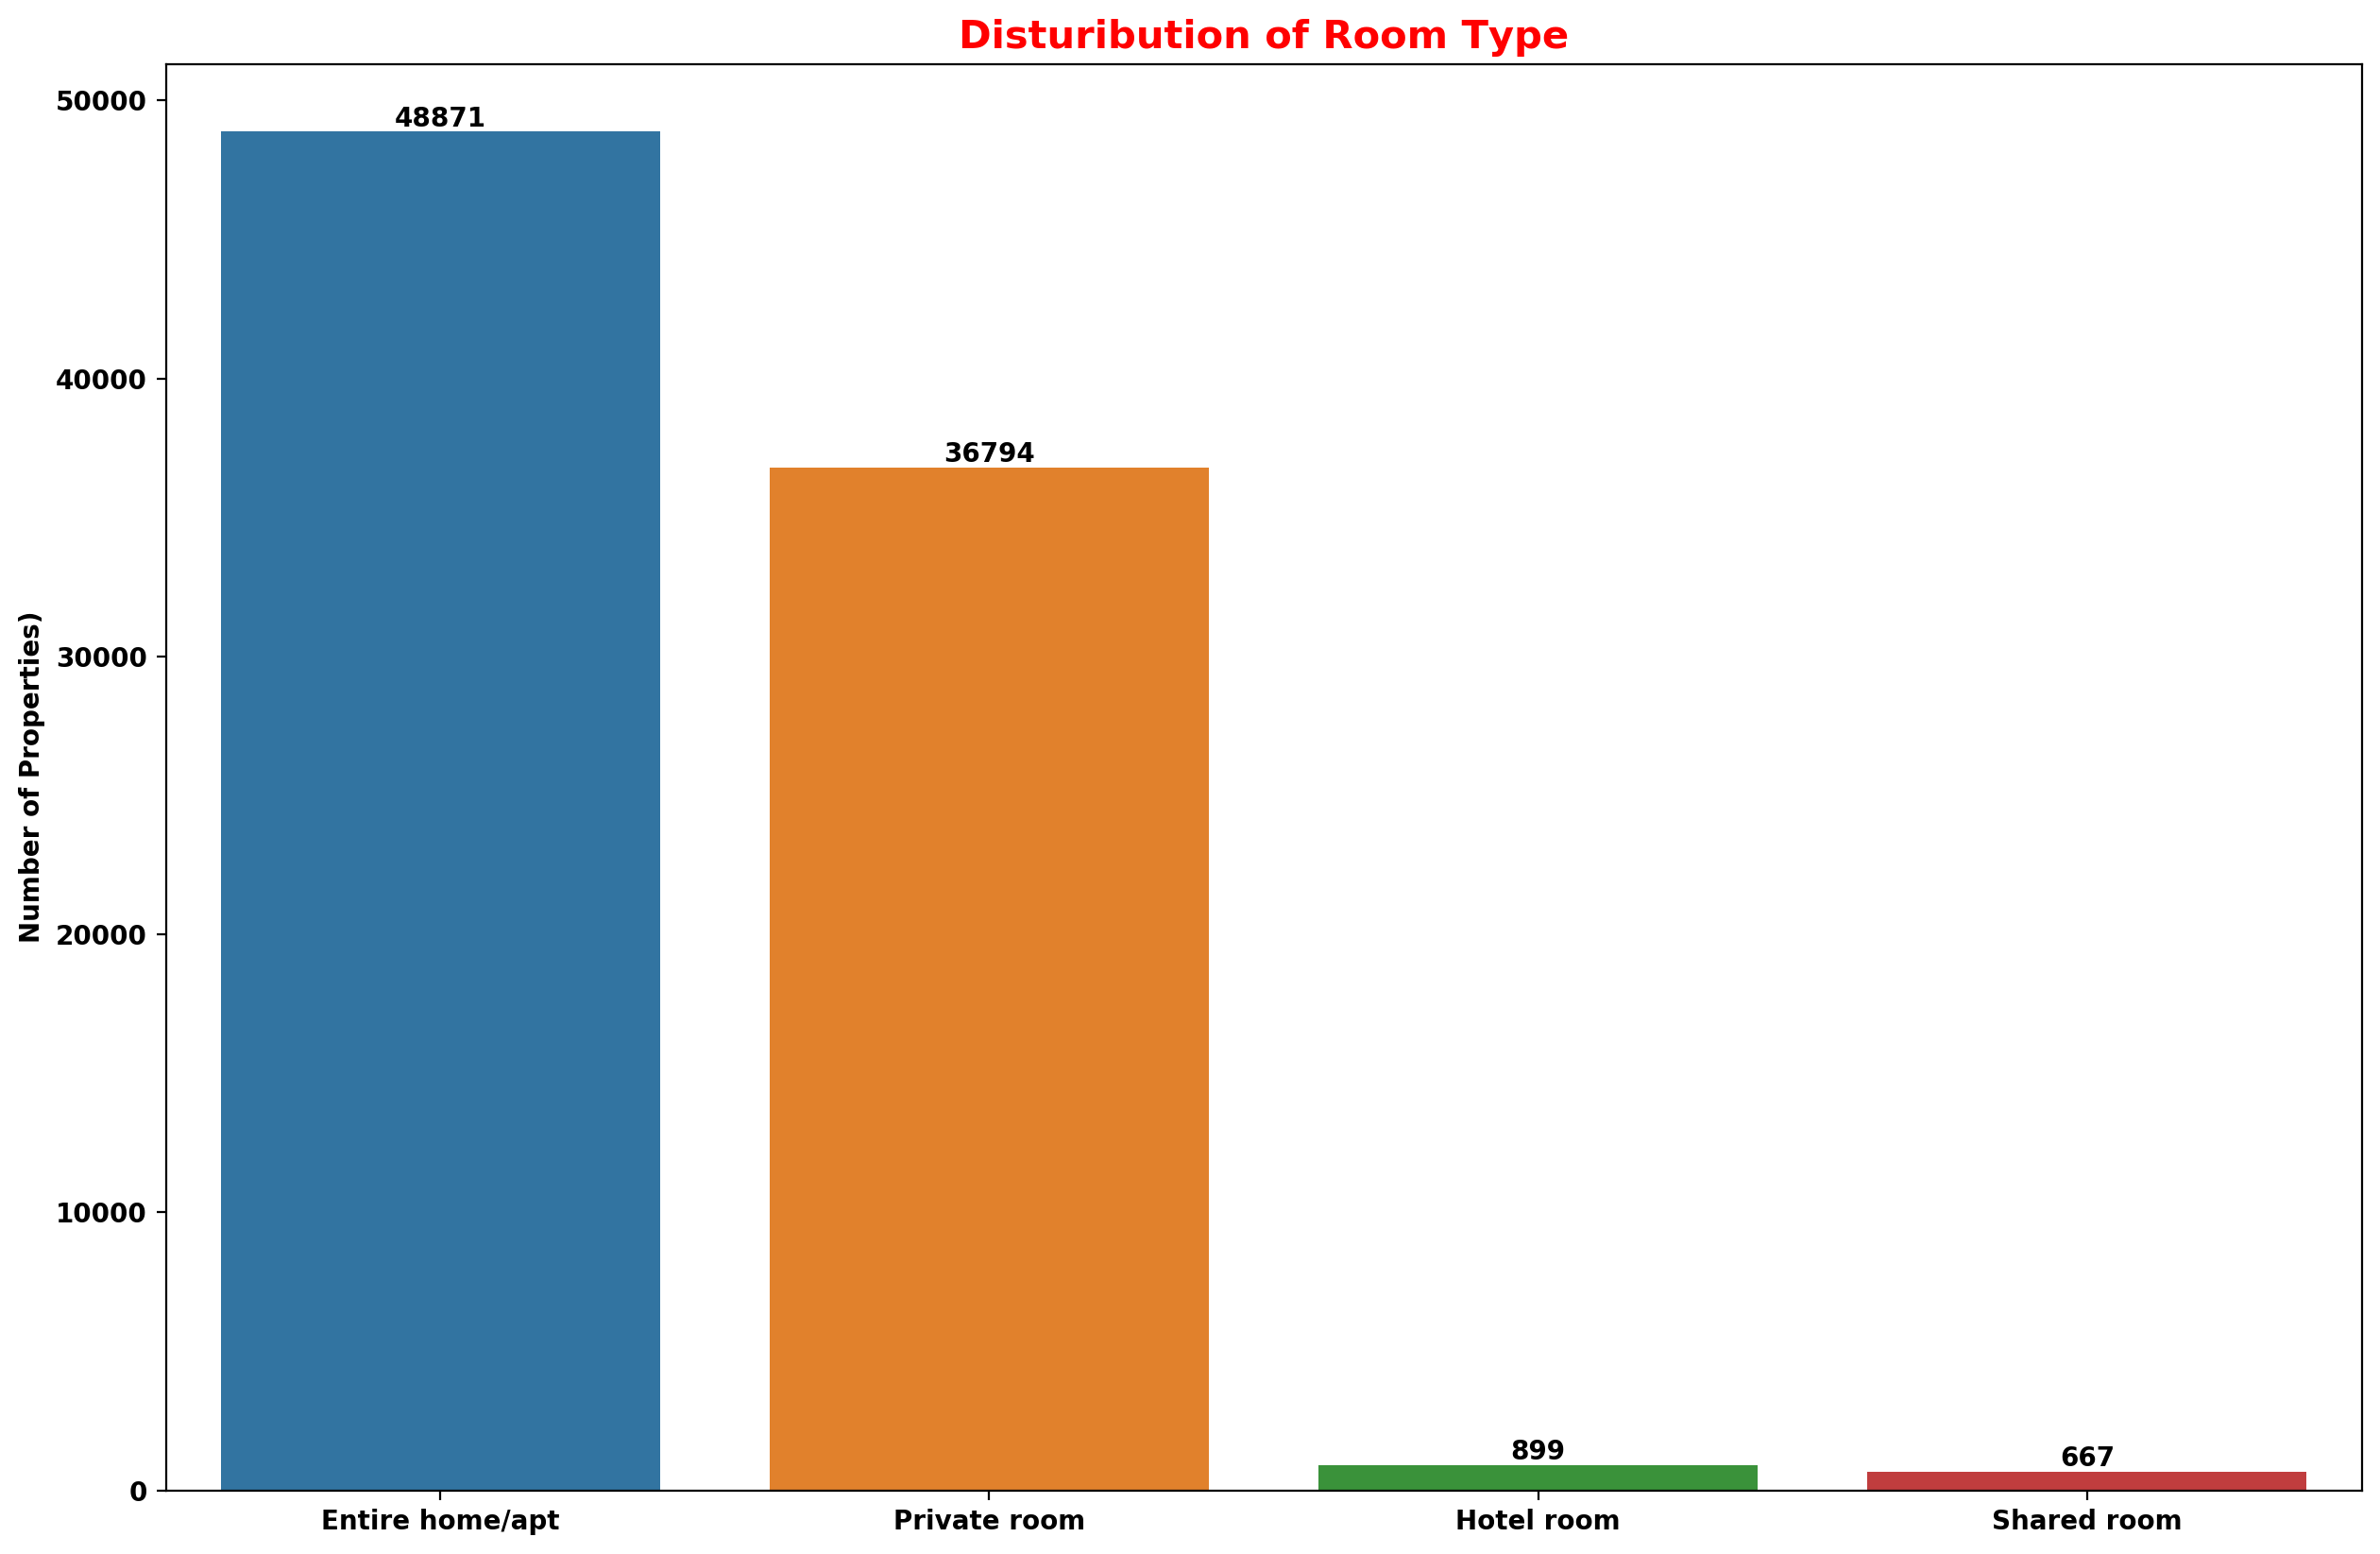

In [15]:
#Barplot of Room Type 

plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x="room_type", y="count", data=room_type_group_count)
plt.title("Disturibution of Room Type", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("Number of Properties)",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',weight="bold",
                    color= 'black')
plt.savefig('images/01_DistuributionofRoomType.png', dpi=200)

plt.show()

In [16]:
# Group by Borough for count

borough_group_count = listing.groupby("neighbourhood").id.count().sort_values(ascending=False)
borough_group_count = borough_group_count.reset_index()
borough_group_count.rename(columns={"id":"count"}, inplace=True)
borough_group_count["percentage"]=round(borough_group_count["count"]/borough_group_count["count"].sum()*100,2)
borough_group_count.head(10)

neighbourhood  count  percentage
0             Westminster   9925       11.38
1           Tower Hamlets   8544        9.79
2                 Hackney   6391        7.33
3                  Camden   6219        7.13
4  Kensington and Chelsea   6129        7.03
5               Islington   5179        5.94
6               Southwark   4972        5.70
7                 Lambeth   4963        5.69
8              Wandsworth   4373        5.01
9  Hammersmith and Fulham   4281        4.91

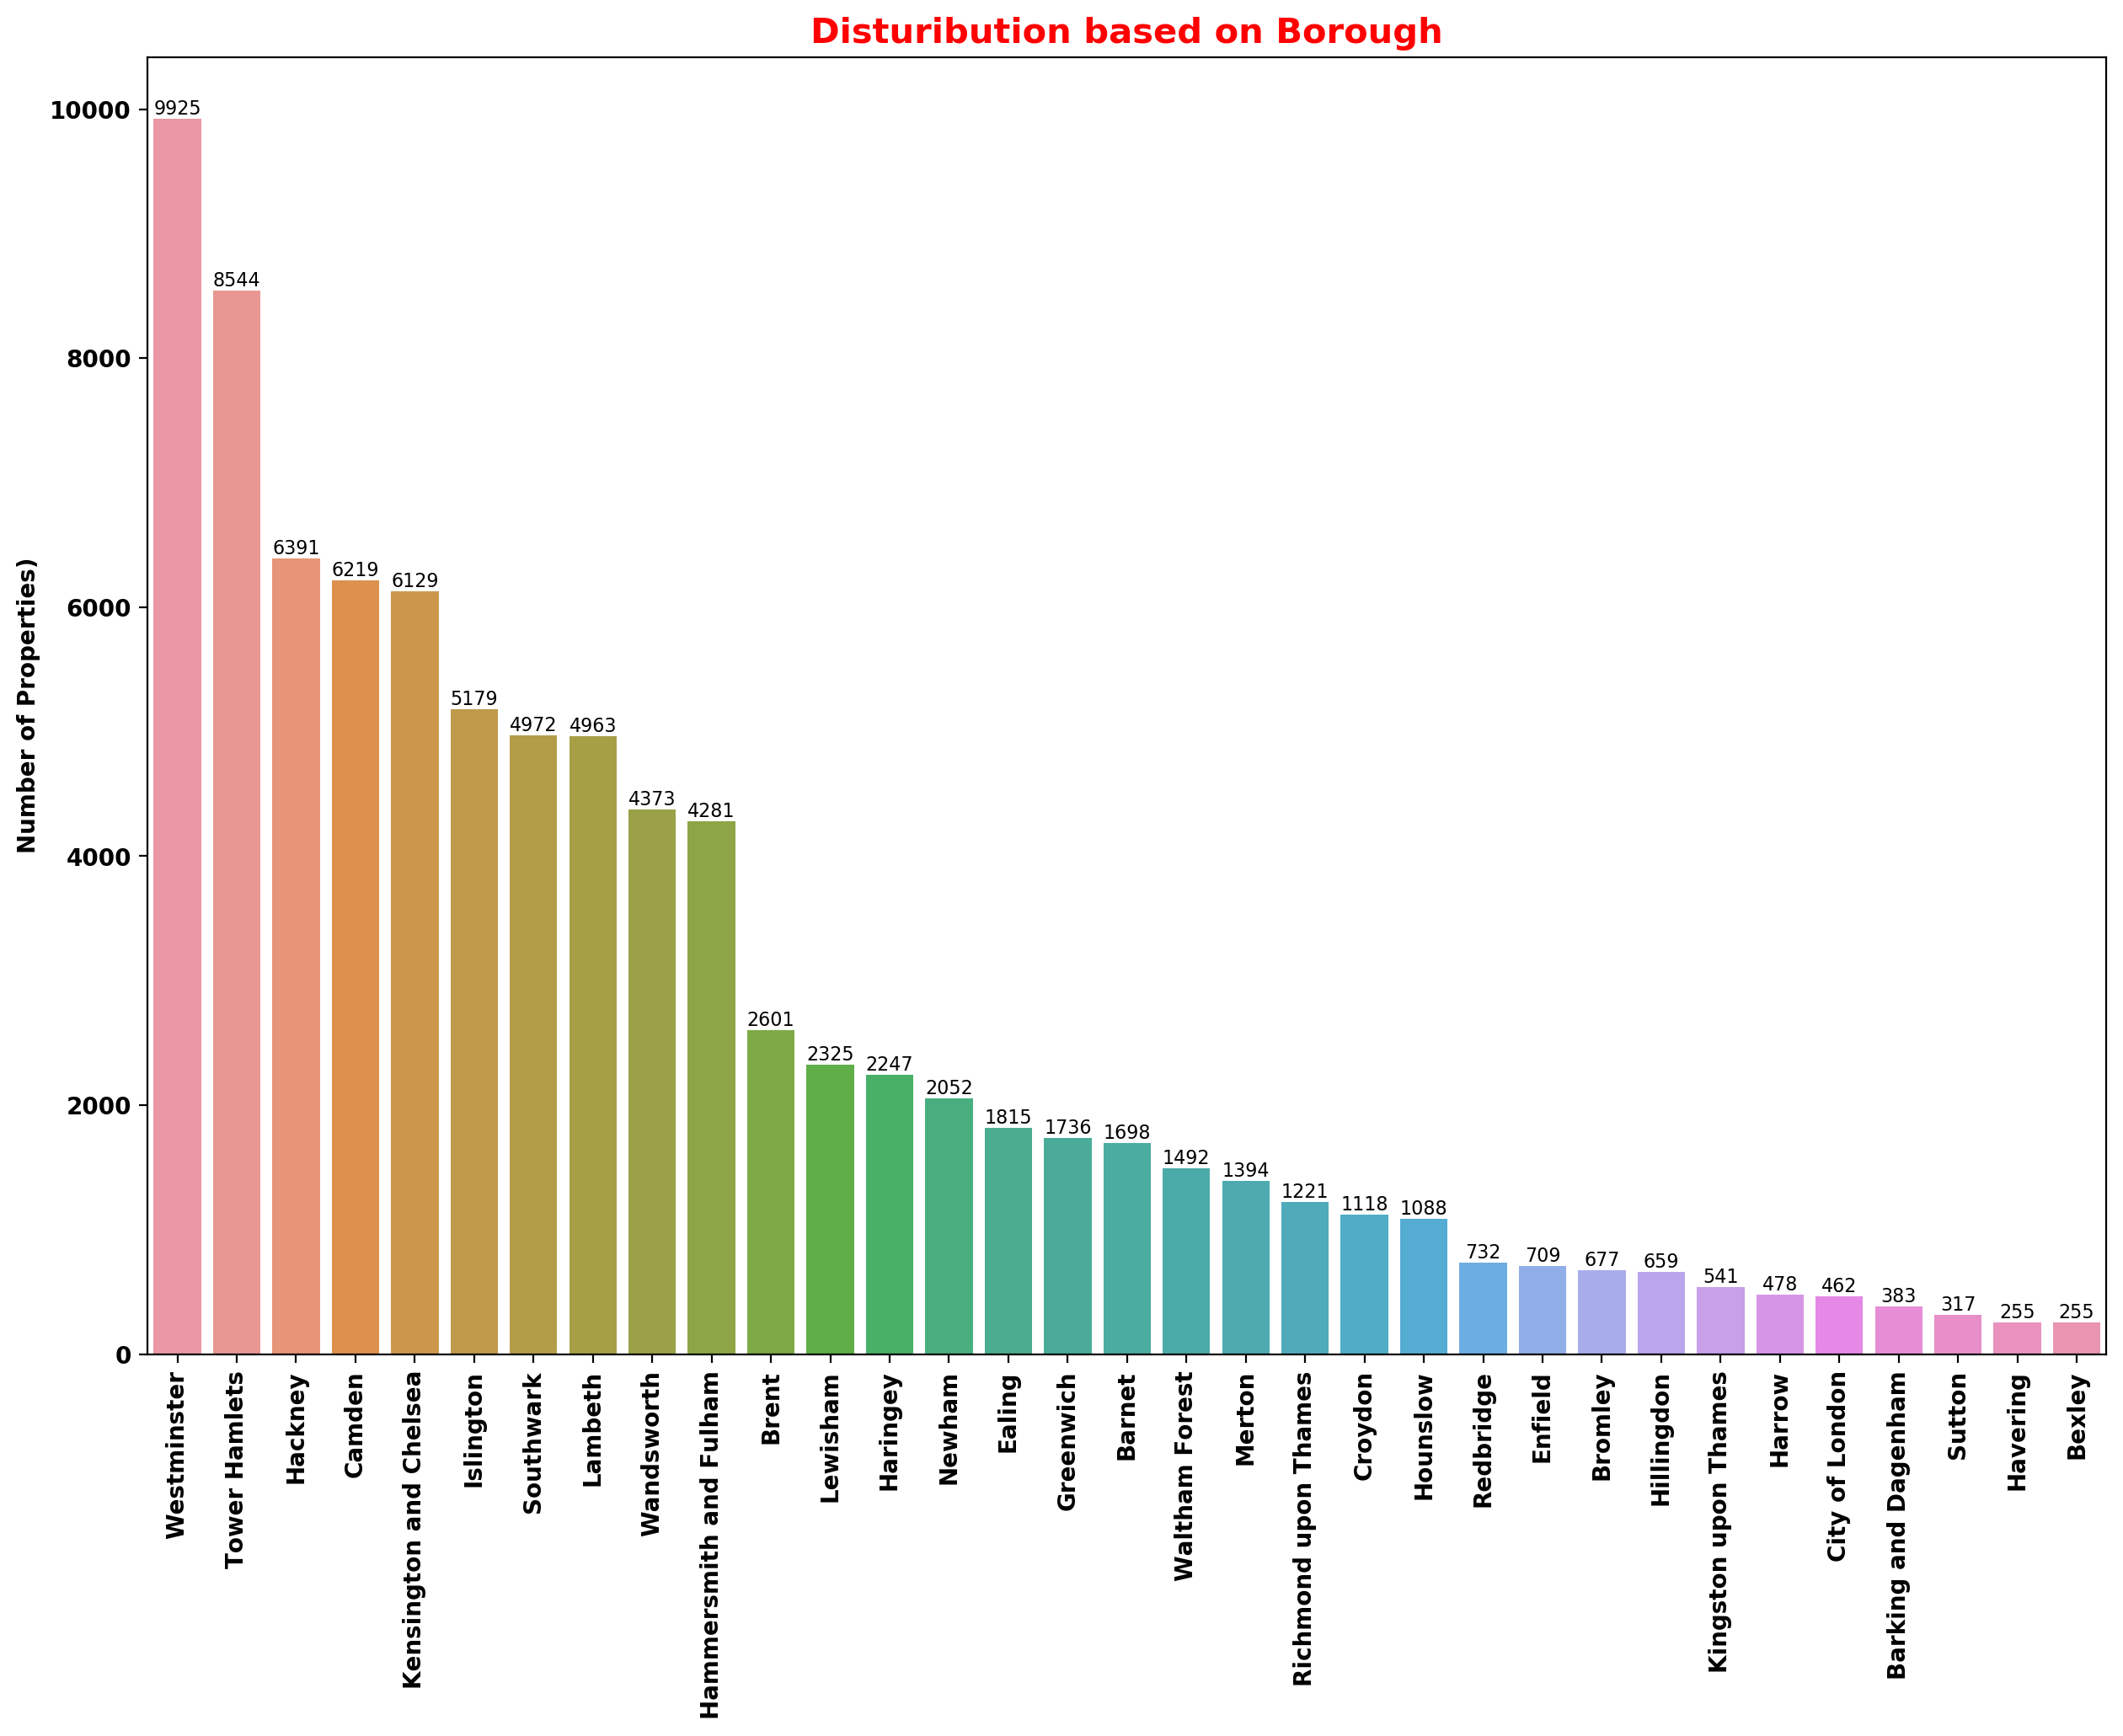

In [17]:
#Barplot of Borough 

plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x="neighbourhood", y="count", data=borough_group_count)
plt.title("Disturibution based on Borough", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Number of Properties)",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', size=8)
plt.savefig('images/02_DistuributionofBorough.png', dpi=200)

plt.show()

In [18]:
# Group by Borough for price

borough_group_price = listing.groupby("neighbourhood").price.mean().sort_values(ascending=False)
borough_group_price = borough_group_price.reset_index()
borough_group_price.head()

neighbourhood       price
0  Kensington and Chelsea  220.917279
1             Westminster  218.893300
2          City of London  187.413420
3                  Camden  151.768130
4  Hammersmith and Fulham  141.850736

In [19]:
avg_price = round(listing.price.mean(),2)
avg_price

126.2

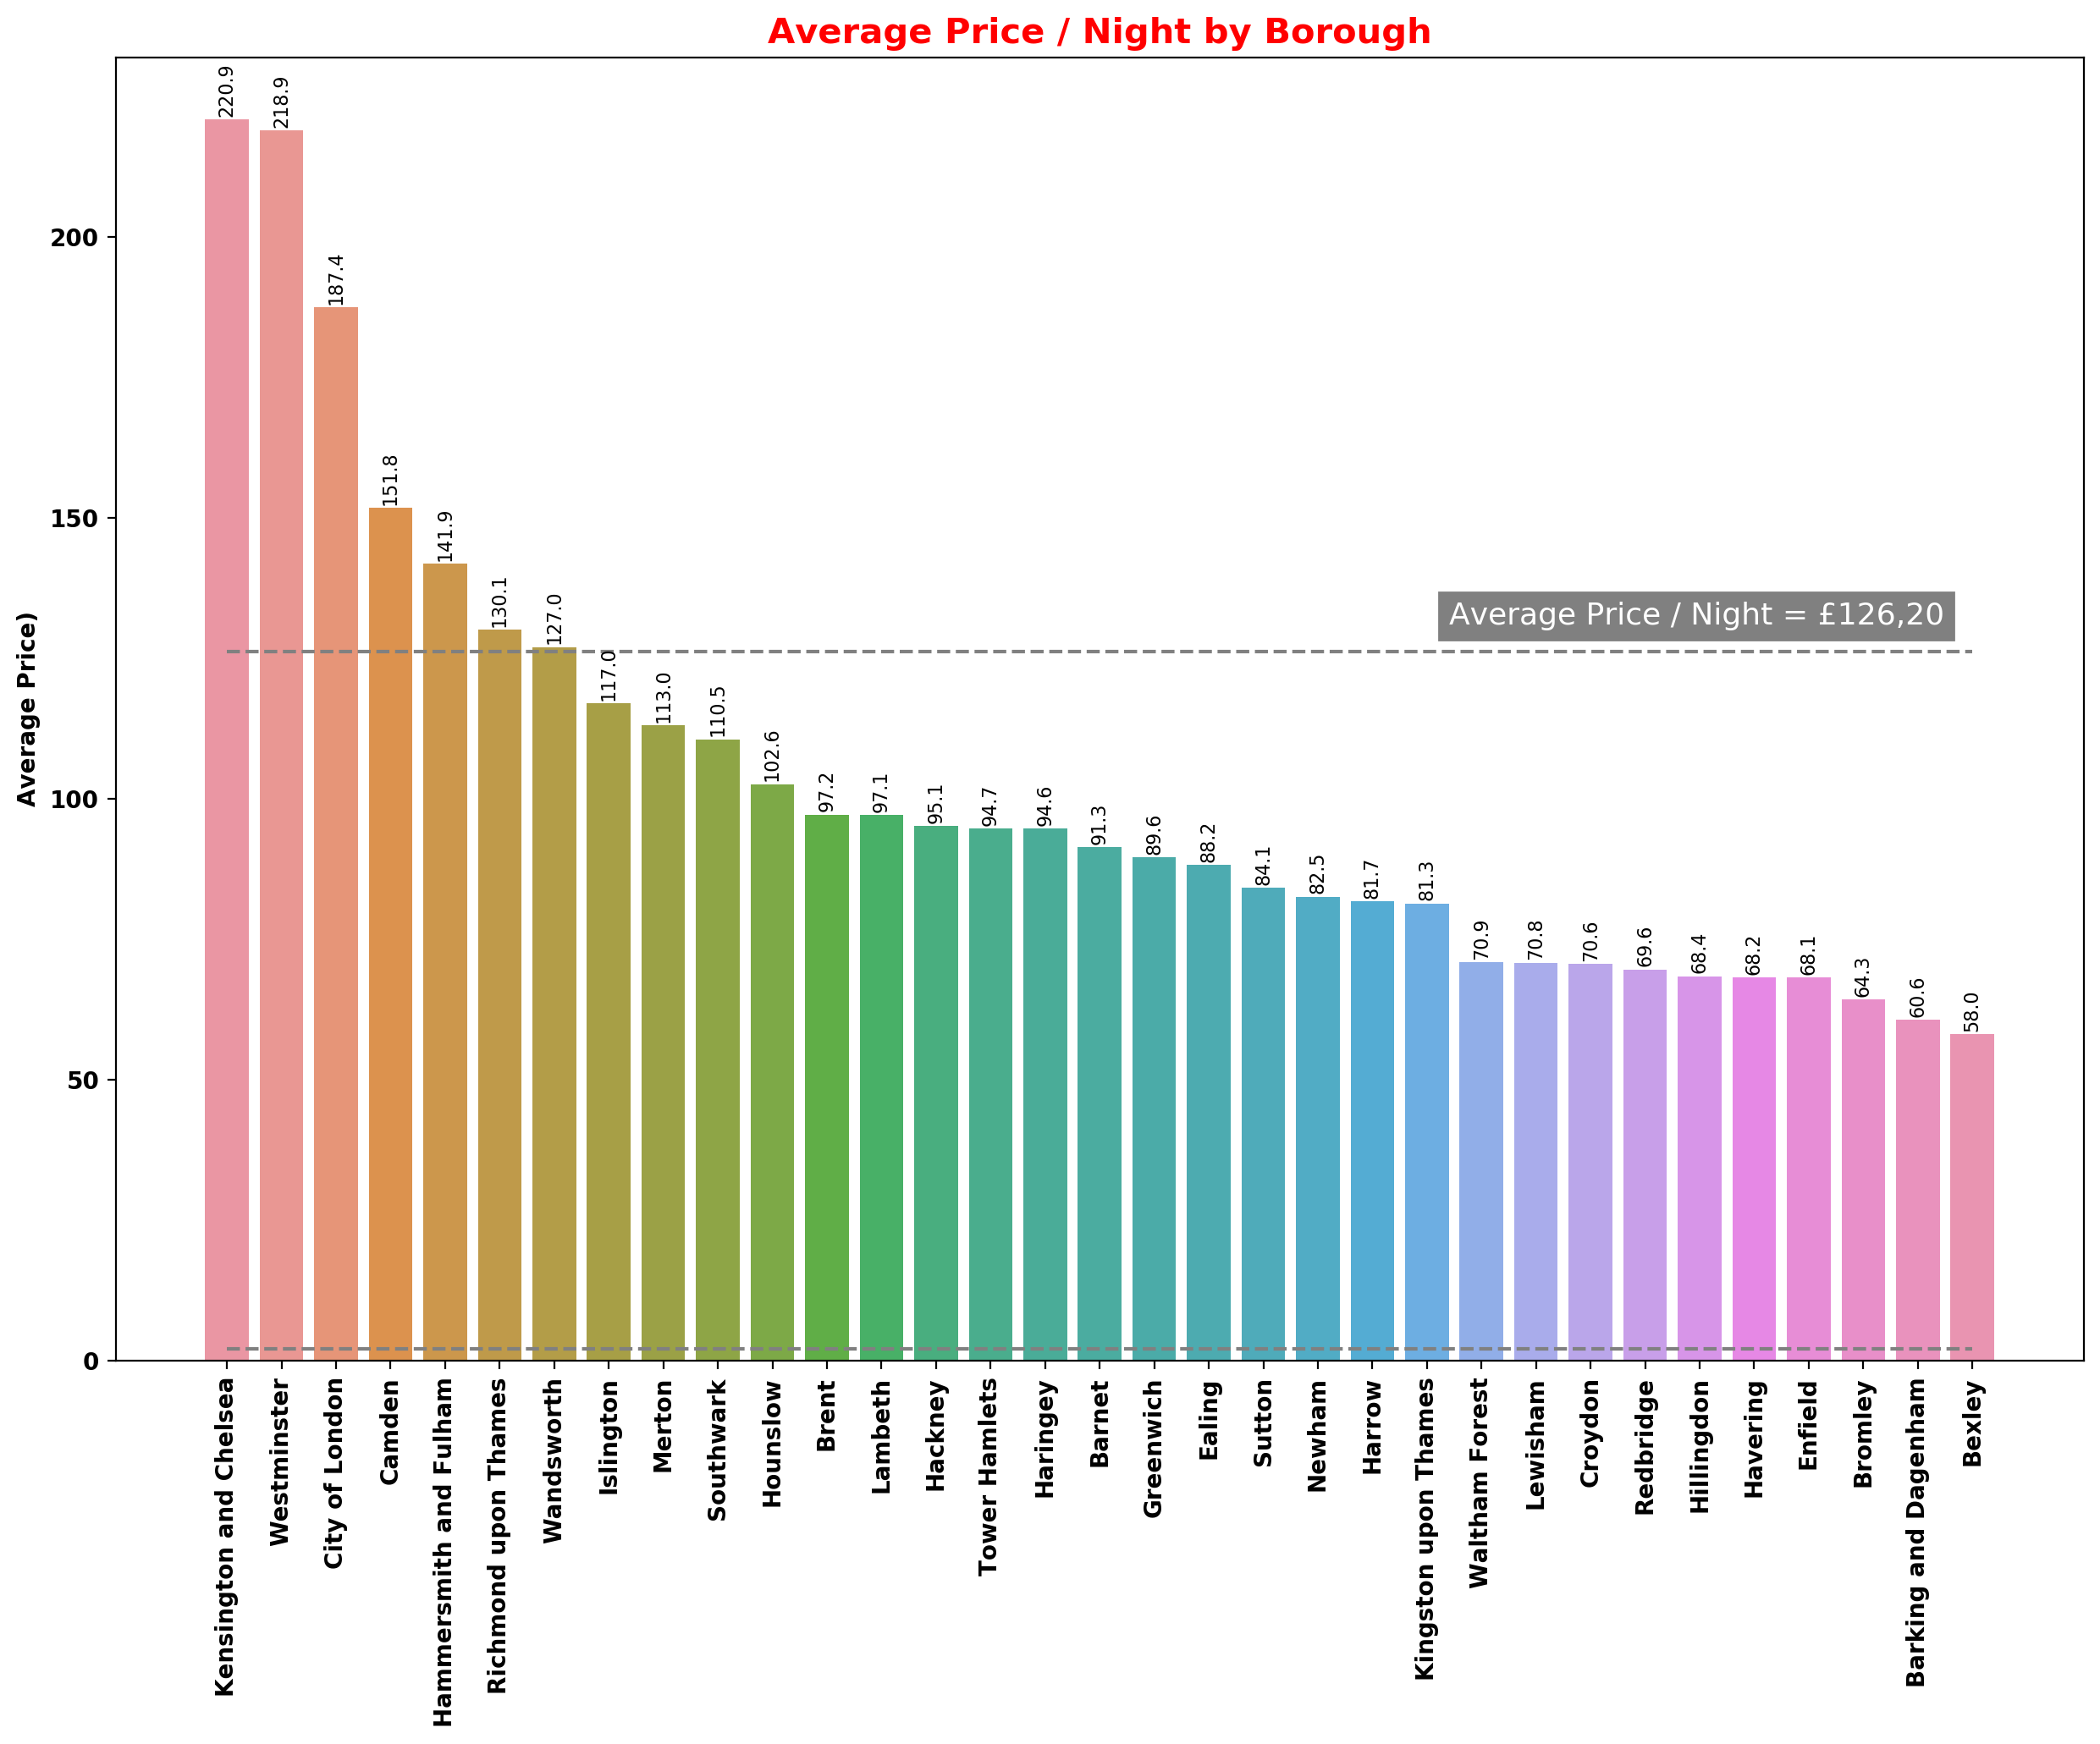

In [20]:
# Barplot of Borough's Price/Night

plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x="neighbourhood", y="price", data=borough_group_price)
plt.title("Average Price / Night by Borough", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Average Price)",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+0.5),
                    ha='center', va='bottom',
                    color= 'black', size=8, rotation=90)

x_coordinates = [0, 32]
y_median = [(listing.price.mean(),2), (listing.price.mean(),2)]

plt.plot(x_coordinates, y_median,linestyle = '--', c="gray")
plt.text(22.4,131,'Average Price / Night = £126,20',fontsize = 13,backgroundcolor = 'gray',color = 'white')

plt.savefig('images/03_AveragePriceNightBorough.png', dpi=200)


plt.show()


In [21]:
# Group by Borough for total number of reviews

borough_group_reviews = listing.groupby("neighbourhood").number_of_reviews.sum().sort_values(ascending=False)
borough_group_reviews = borough_group_reviews.reset_index()
borough_group_reviews["percentage"] = round(borough_group_reviews["number_of_reviews"] / borough_group_reviews["number_of_reviews"].sum()*100,2)
borough_group_reviews.head()


neighbourhood  number_of_reviews  percentage
0    Westminster             197217       12.73
1  Tower Hamlets             160054       10.33
2         Camden             138890        8.96
3        Lambeth             116063        7.49
4      Southwark             109024        7.03

In [22]:
# Number of properties based on Borough that over 100 reviews

over_100_reviews = listing.sort_values("number_of_reviews",ascending=False)
over_100_reviews = over_100_reviews[over_100_reviews["number_of_reviews"]>=100]
over_100_reviews = over_100_reviews.groupby("neighbourhood").count().sort_values("number_of_reviews",ascending=False).head(10)
over_100_reviews

id  name  host_id  host_name  latitude  longitude  \
neighbourhood                                                                
Westminster             416   416      416        415       416        416   
Tower Hamlets           323   323      323        323       323        323   
Lambeth                 293   293      293        292       293        293   
Camden                  270   270      270        270       270        270   
Southwark               260   260      260        260       260        260   
Islington               205   205      205        205       205        205   
Kensington and Chelsea  186   186      186        184       186        186   
Hammersmith and Fulham  171   171      171        171       171        171   
Hackney                 151   151      151        151       151        151   
Wandsworth              118   118      118        118       118        118   

                        room_type  price  minimum_nights  number_of_reviews  \
neighbourhood                                                                 
Westminster                   416    416             416                416   
Tower Hamlets                 323    323             323                323   
Lambeth                       293    293             293                293   
Camden                        270    270             270                270   
Southwark                     260    260             260                260   
Islington                     205    205             205                205   
Kensington and Chelsea        186    186             186                186   
Hammersmith and Fulham        171    171             171                171   
Hackney                       151    151             151                151   
Wandsworth                    118    118             118                118   

                        last_review  reviews_per_month  \
neighbourhood                                            
Westminster                     416                416   
Tower Hamlets                   323                323   
Lambeth                         293                293   
Camden                          270                270   
Southwark                       260                260   
Islington                       205                205   
Kensington and Chelsea          186                186   
Hammersmith and Fulham          171                171   
Hackney                         151                151   
Wandsworth                      118                118   

                        calculated_host_listings_count  availability_365  
neighbourhood                                                             
Westminster                                        416               416  
Tower Hamlets                                      323               323  
Lambeth                                            293               293  
Camden                                             270               270  
Southwark                                          260               260  
Islington                                          205               205  
Kensington and Chelsea                             186               186  
Hammersmith and Fulham                             171               171  
Hackney                                            151               151  
Wandsworth                                         118               118

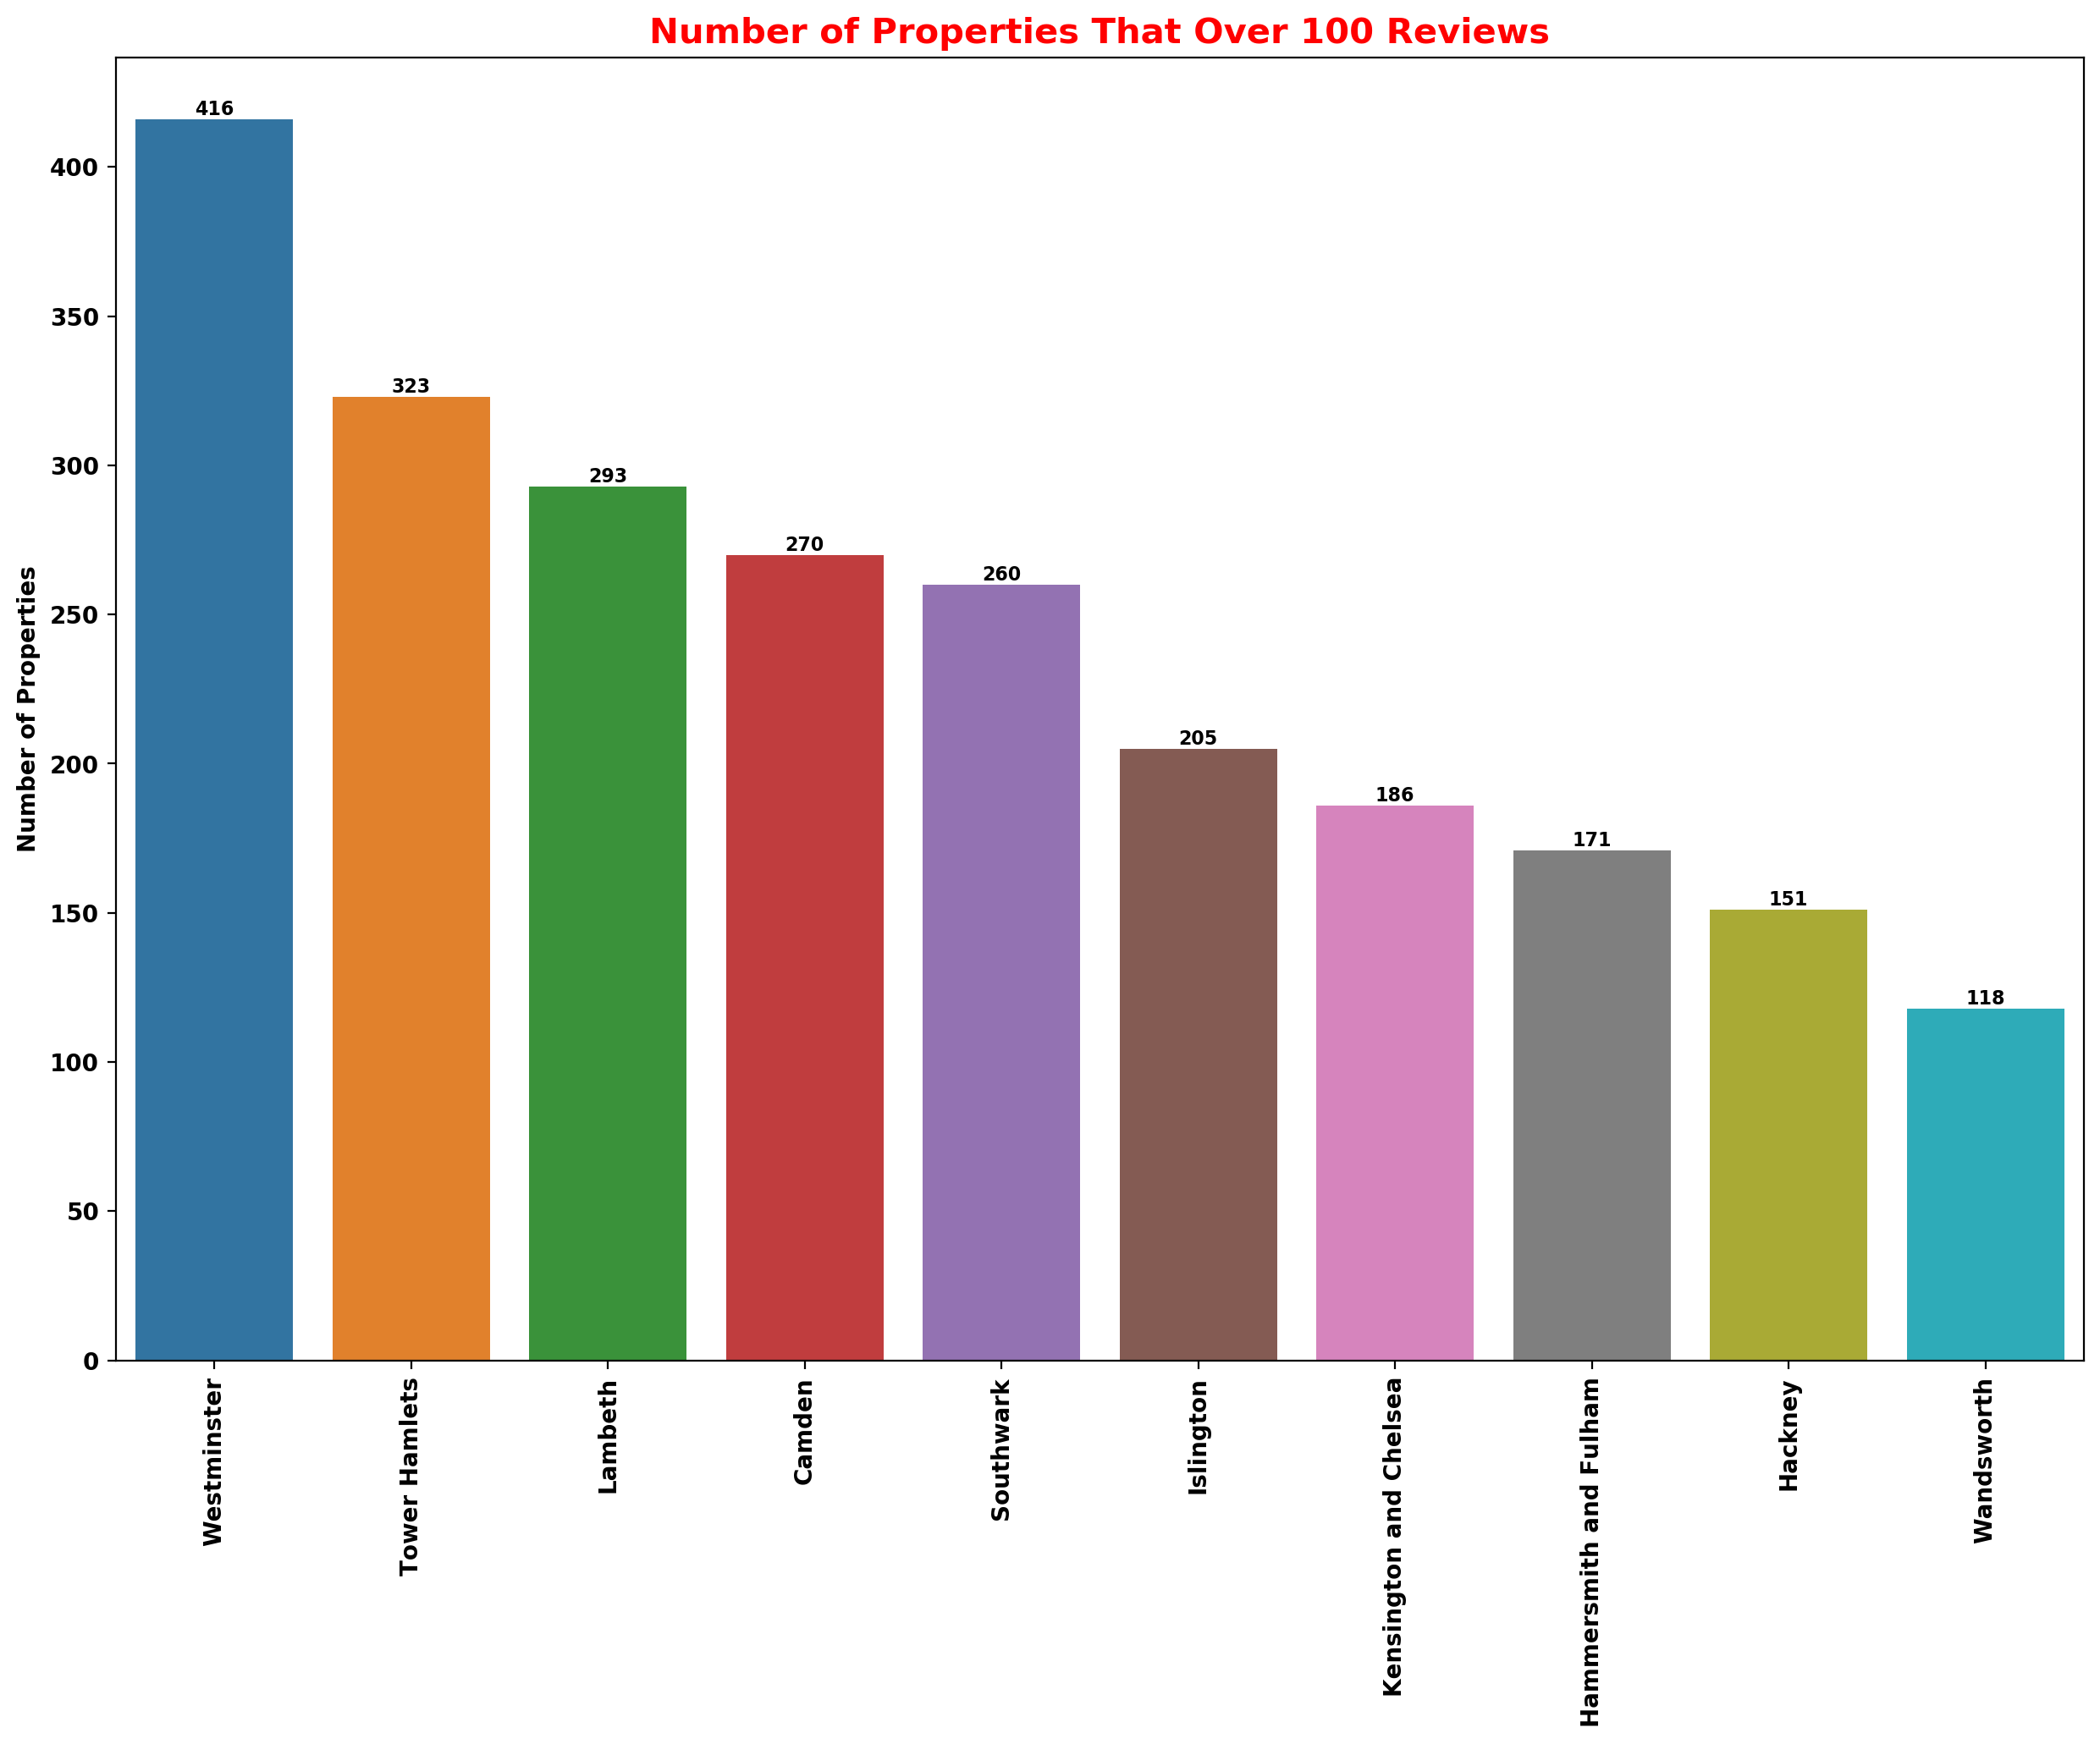

In [23]:
# Barplot of properties based on Borough that over 100 reviews

plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x=over_100_reviews.index, y="number_of_reviews", data=over_100_reviews)
plt.title("Number of Properties That Over 100 Reviews", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Number of Properties",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', size=8, weight="bold")
plt.savefig('images/04_NumberOfPropertiesOver100PerBorough.png', dpi=200)

plt.show()

In [24]:
# Property Type and Borough

property_type_borough = listing.groupby(["neighbourhood","room_type"]).count().reset_index()
property_type_borough = property_type_borough.pivot("room_type","neighbourhood","id")
property_type_borough

neighbourhood    Barking and Dagenham  Barnet  Bexley   Brent  Bromley  \
room_type                                                                
Entire home/apt                 111.0   729.0    75.0  1212.0    241.0   
Hotel room                        5.0    29.0     2.0    22.0     27.0   
Private room                    262.0   927.0   174.0  1324.0    403.0   
Shared room                       5.0    13.0     4.0    43.0      6.0   

neighbourhood    Camden  City of London  Croydon  Ealing  Enfield  ...  \
room_type                                                          ...   
Entire home/apt  4069.0           392.0    420.0   720.0    244.0  ...   
Hotel room         99.0            14.0     17.0    28.0     27.0  ...   
Private room     2010.0            54.0    671.0  1053.0    431.0  ...   
Shared room        41.0             2.0     10.0    14.0      7.0  ...   

neighbourhood    Merton  Newham  Redbridge  Richmond upon Thames  Southwark  \
room_type                                                                     
Entire home/apt   616.0   799.0      217.0                 679.0     2690.0   
Hotel room          1.0     9.0        2.0                   9.0       25.0   
Private room      767.0  1214.0      505.0                 529.0     2220.0   
Shared room        10.0    30.0        8.0                   4.0       37.0   

neighbourhood    Sutton  Tower Hamlets  Waltham Forest  Wandsworth  \
room_type                                                            
Entire home/apt    99.0         4108.0           674.0      2485.0   
Hotel room          NaN           87.0             4.0        34.0   
Private room      216.0         4274.0           792.0      1841.0   
Shared room         2.0           75.0            22.0        13.0   

neighbourhood    Westminster  
room_type                     
Entire home/apt       7426.0  
Hotel room             127.0  
Private room          2314.0  
Shared room             58.0  

[4 rows x 33 columns]

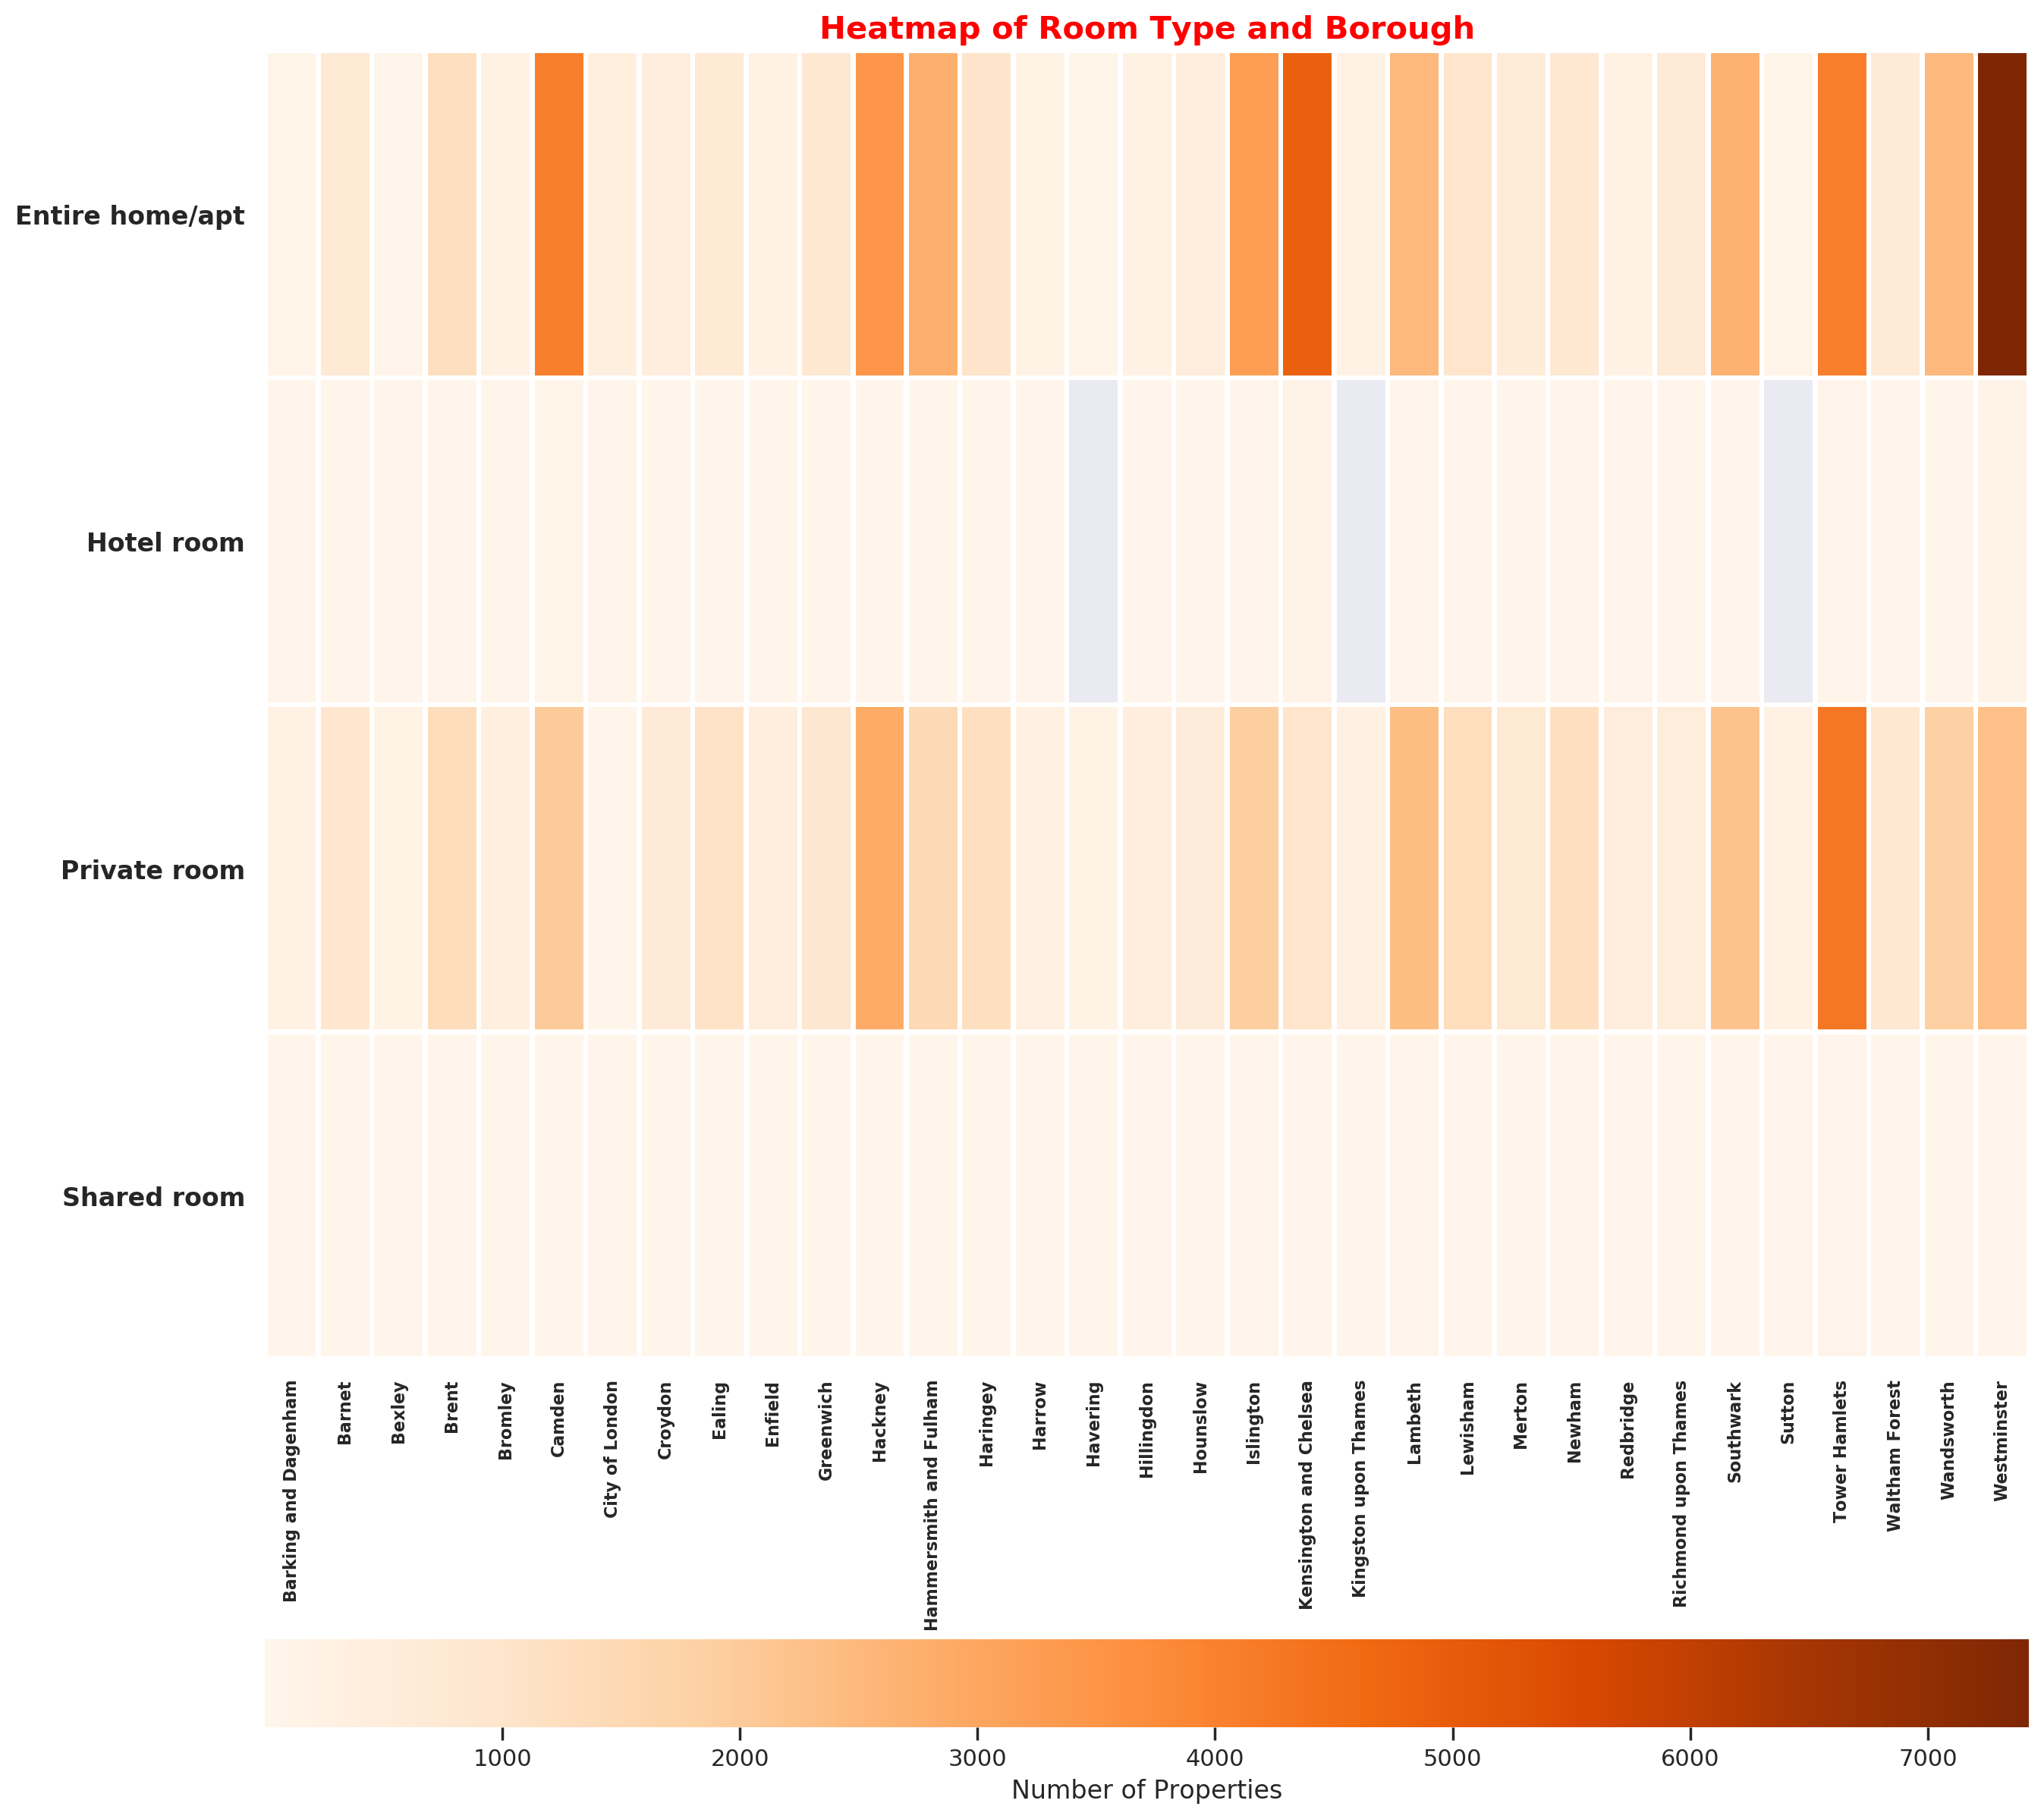

In [25]:
#Heatmap of Property Type and Borough

plt.figure(figsize=(15,16),dpi=200),
sns.set(font_scale=1)
sns.heatmap(property_type_borough,annot=False,fmt="d", linewidths=2, cmap="Oranges",cbar_kws={'label': 'Number of Properties','orientation':'horizontal'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=12)
plt.xticks(weight="bold",rotation=90,size=8)
plt.title("Heatmap of Room Type and Borough",weight="bold",c="red", fontsize=15)
plt.savefig('images/05_PropertyTypeBoroughCountHeatmap.png', dpi=200)
plt.show()

In [26]:
# Listing Per Host
listing_host = listing.host_id.value_counts().head(10).reset_index()
listing_host

index  host_id
0   33889201     1044
1   28820321      238
2  137094377      236
3   13557337      208
4   48165024      205
5  156158778      187
6    1432477      177
7   27572615      167
8  224866971      140
9   50291093      114

In [27]:
#Distribution by host (most have)
listing_host_borough = listing[listing["host_id"]==33889201]
listing_host_borough.groupby(["neighbourhood"]).id.count().reset_index().sort_values("id",ascending=False).head()

neighbourhood   id
20              Wandsworth  147
7   Hammersmith and Fulham  128
11  Kensington and Chelsea  115
2                   Camden  110
10               Islington  105

In [28]:
#Availability Per Borough of 365 day

occupancy_borough = listing.groupby("neighbourhood").availability_365.mean().sort_values().reset_index()
occupancy_borough.head(10)

neighbourhood  availability_365
0                 Hackney         76.371616
1               Islington         91.352578
2                 Lambeth         91.471288
3                Haringey         94.094348
4              Wandsworth         94.810885
5               Southwark         98.209372
6                Lewisham         99.974624
7                  Merton        109.451937
8          Waltham Forest        110.453753
9  Hammersmith and Fulham        116.827844

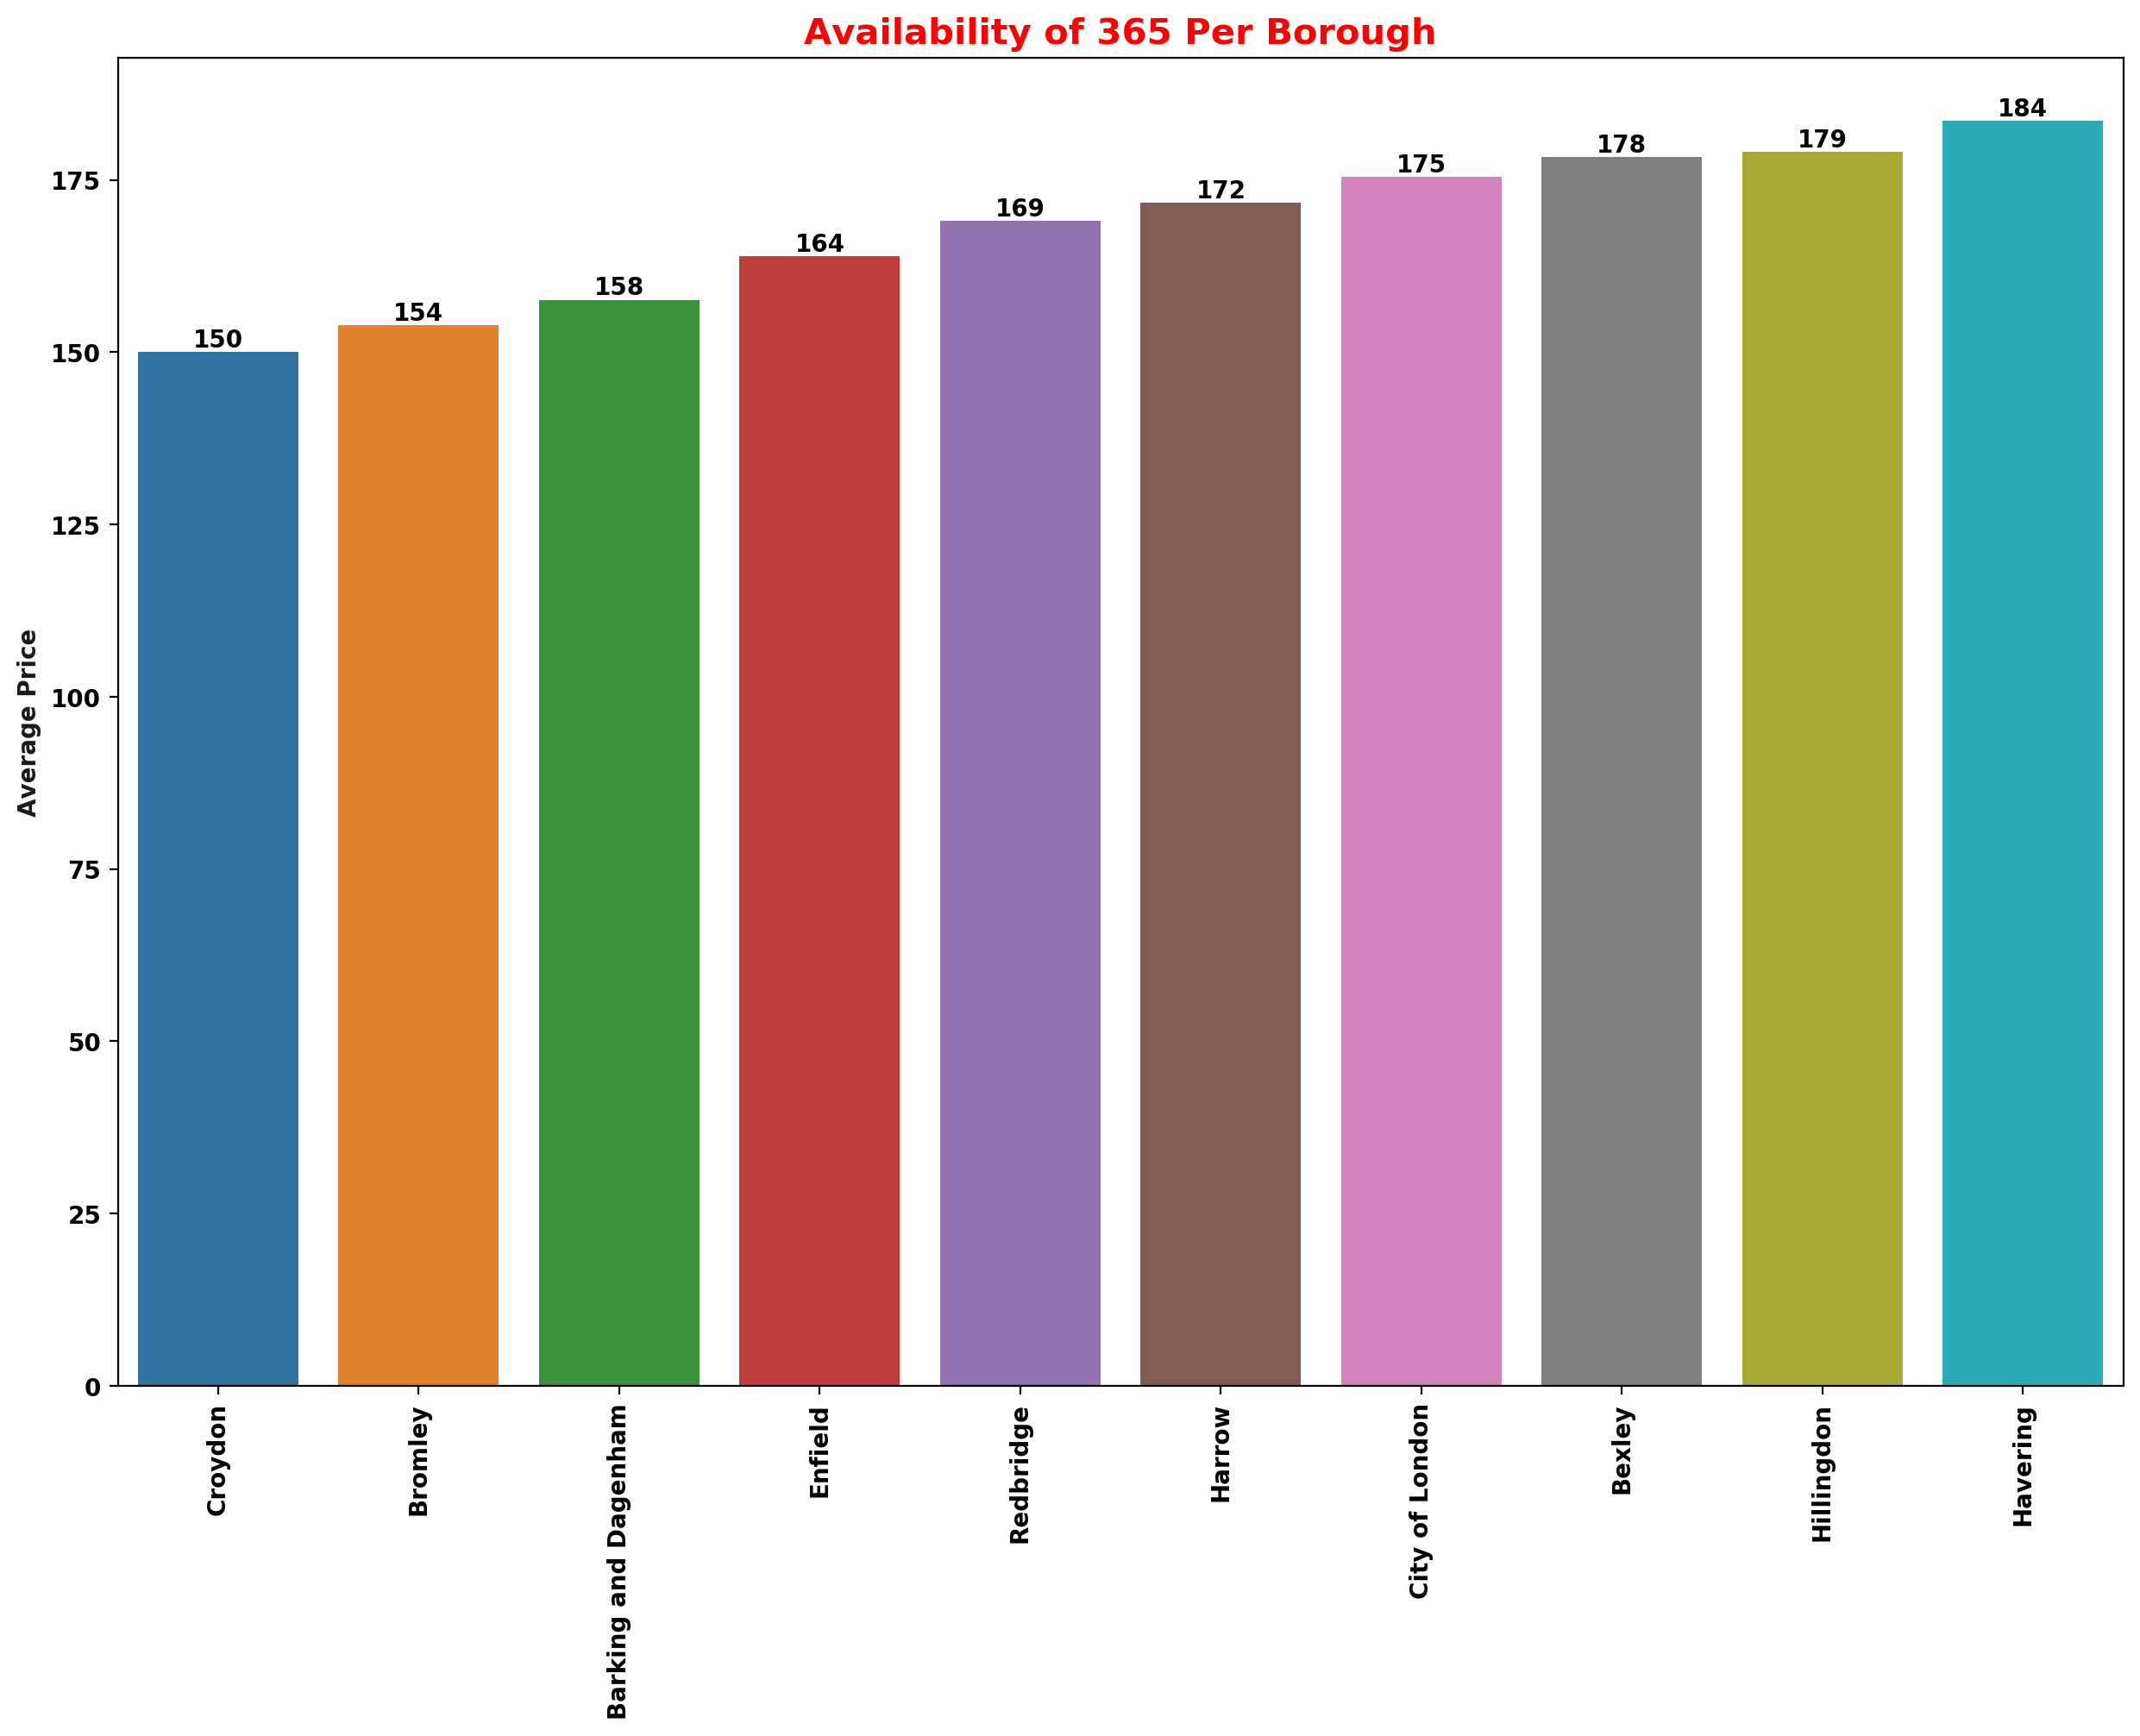

In [29]:
# Barplot of #Availability Per Borough
occupancy_borough = occupancy_borough.tail(10)
plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x="neighbourhood", y="availability_365", data=occupancy_borough)
plt.title("Availability of 365 Per Borough", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Average Price",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', size=10, weight="bold")
plt.savefig('images/06_Availabilityof365PerBorough.png', dpi=200)

plt.show()

In [30]:
inner_london = ['Kensington and Chelsea', 'Westminster','Hammersmith and Fulham', 'Wandsworth','Hackney', 
                'Southwark','Tower Hamlets', 'Camden','Lambeth', 'Greenwich', 'City of London','Islington']

inner_london_filter=listing[listing["neighbourhood"].isin(inner_london)]
outer_london_filter=listing[~listing["neighbourhood"].isin(inner_london)]
print(len(inner_london_filter))
print(len(outer_london_filter))

63174
24057


In [31]:
# Group by Borough (Inner) for price

borough_group_price_inner = inner_london_filter.groupby("neighbourhood").price.mean().sort_values(ascending=False)
borough_group_price_inner = borough_group_price_inner.reset_index()
borough_group_price_inner.price.mean()

137.64198160349096

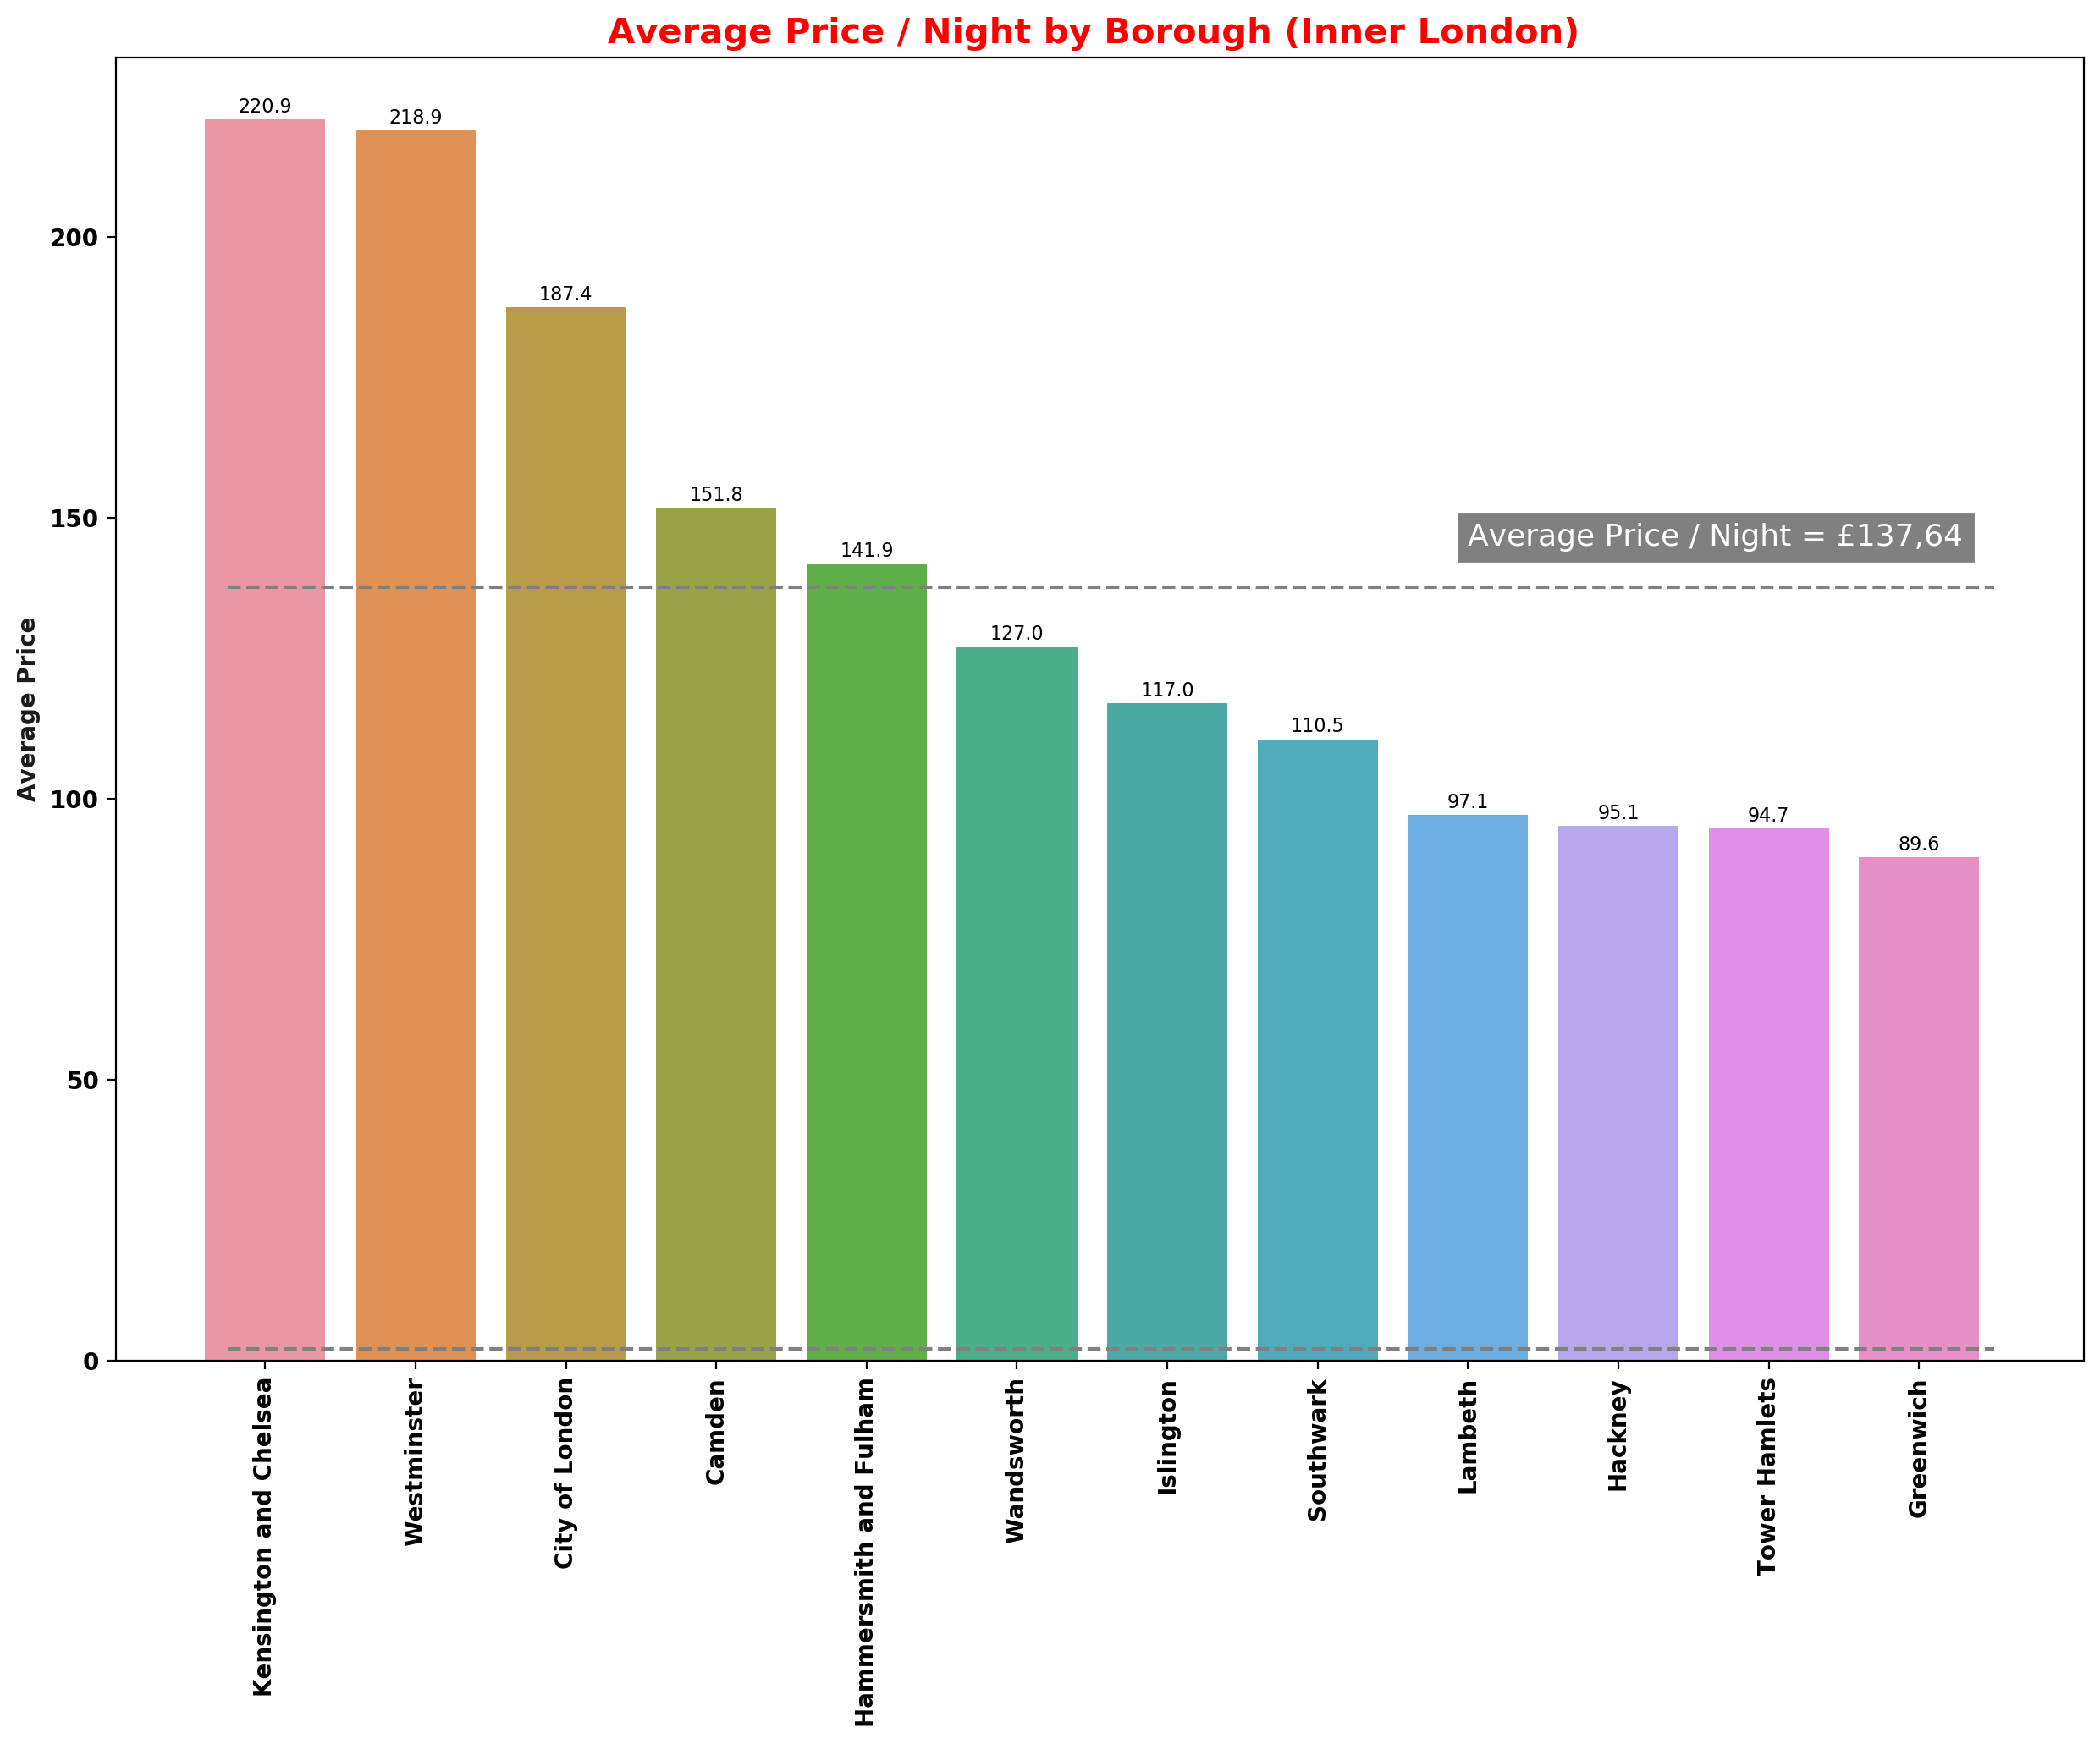

In [32]:
# Barplot of Inner Borough's Price/Night

plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x="neighbourhood", y="price", data=borough_group_price_inner)
plt.title("Average Price / Night by Borough (Inner London) ", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Average Price",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+0.5),
                    ha='center', va='bottom',
                    color= 'black', size=8, rotation=0)

x_coordinates_ = [-0.25, 11.5]
y_median_ = [(borough_group_price_inner.price.mean(),2), (borough_group_price_inner.price.mean(),2)]

plt.plot(x_coordinates_ , y_median_ ,linestyle = '--', c="gray")
plt.text(8,145,'Average Price / Night = £137,64',fontsize = 13,backgroundcolor = 'gray',color = 'white')
plt.savefig('images/07_AveragePriceNightBoroughInner.png', dpi=200)

plt.show()


In [33]:
house_price = house_price[["Borough","Average"]]
house_price.sort_values("Average").head()
house_price["Average"] = house_price["Average"].str.replace(",","")
house_price["Average"] = house_price["Average"].astype("float")
house_price

Borough    Average
0           City of London   796181.0
1     Barking and Dagenham   298620.0
2                   Barnet   519611.0
3                   Bexley   336858.0
4                    Brent   474513.0
5                  Bromley   436460.0
6                   Camden   841744.0
7                  Croydon   365441.0
8                   Ealing   472913.0
9                  Enfield   392835.0
10               Greenwich   393062.0
11                 Hackney   555655.0
12  Hammersmith and Fulham   721459.0
13                Haringey   547222.0
14                  Harrow   449261.0
15                Havering   364778.0
16              Hillingdon   404537.0
17                Hounslow   400906.0
18               Islington   634610.0
19  Kensington and Chelsea  1243722.0
20    Kingston upon Thames   487195.0
21                 Lambeth   508419.0
22                Lewisham   409239.0
23                  Merton   506193.0
24                  Newham   363957.0
25               Redbridge   412566.0
26    Richmond upon Thames   650028.0
27               Southwark   499247.0
28                  Sutton   371875.0
29           Tower Hamlets   438461.0
30          Waltham Forest   430502.0
31              Wandsworth   588613.0
32             Westminster   955353.0

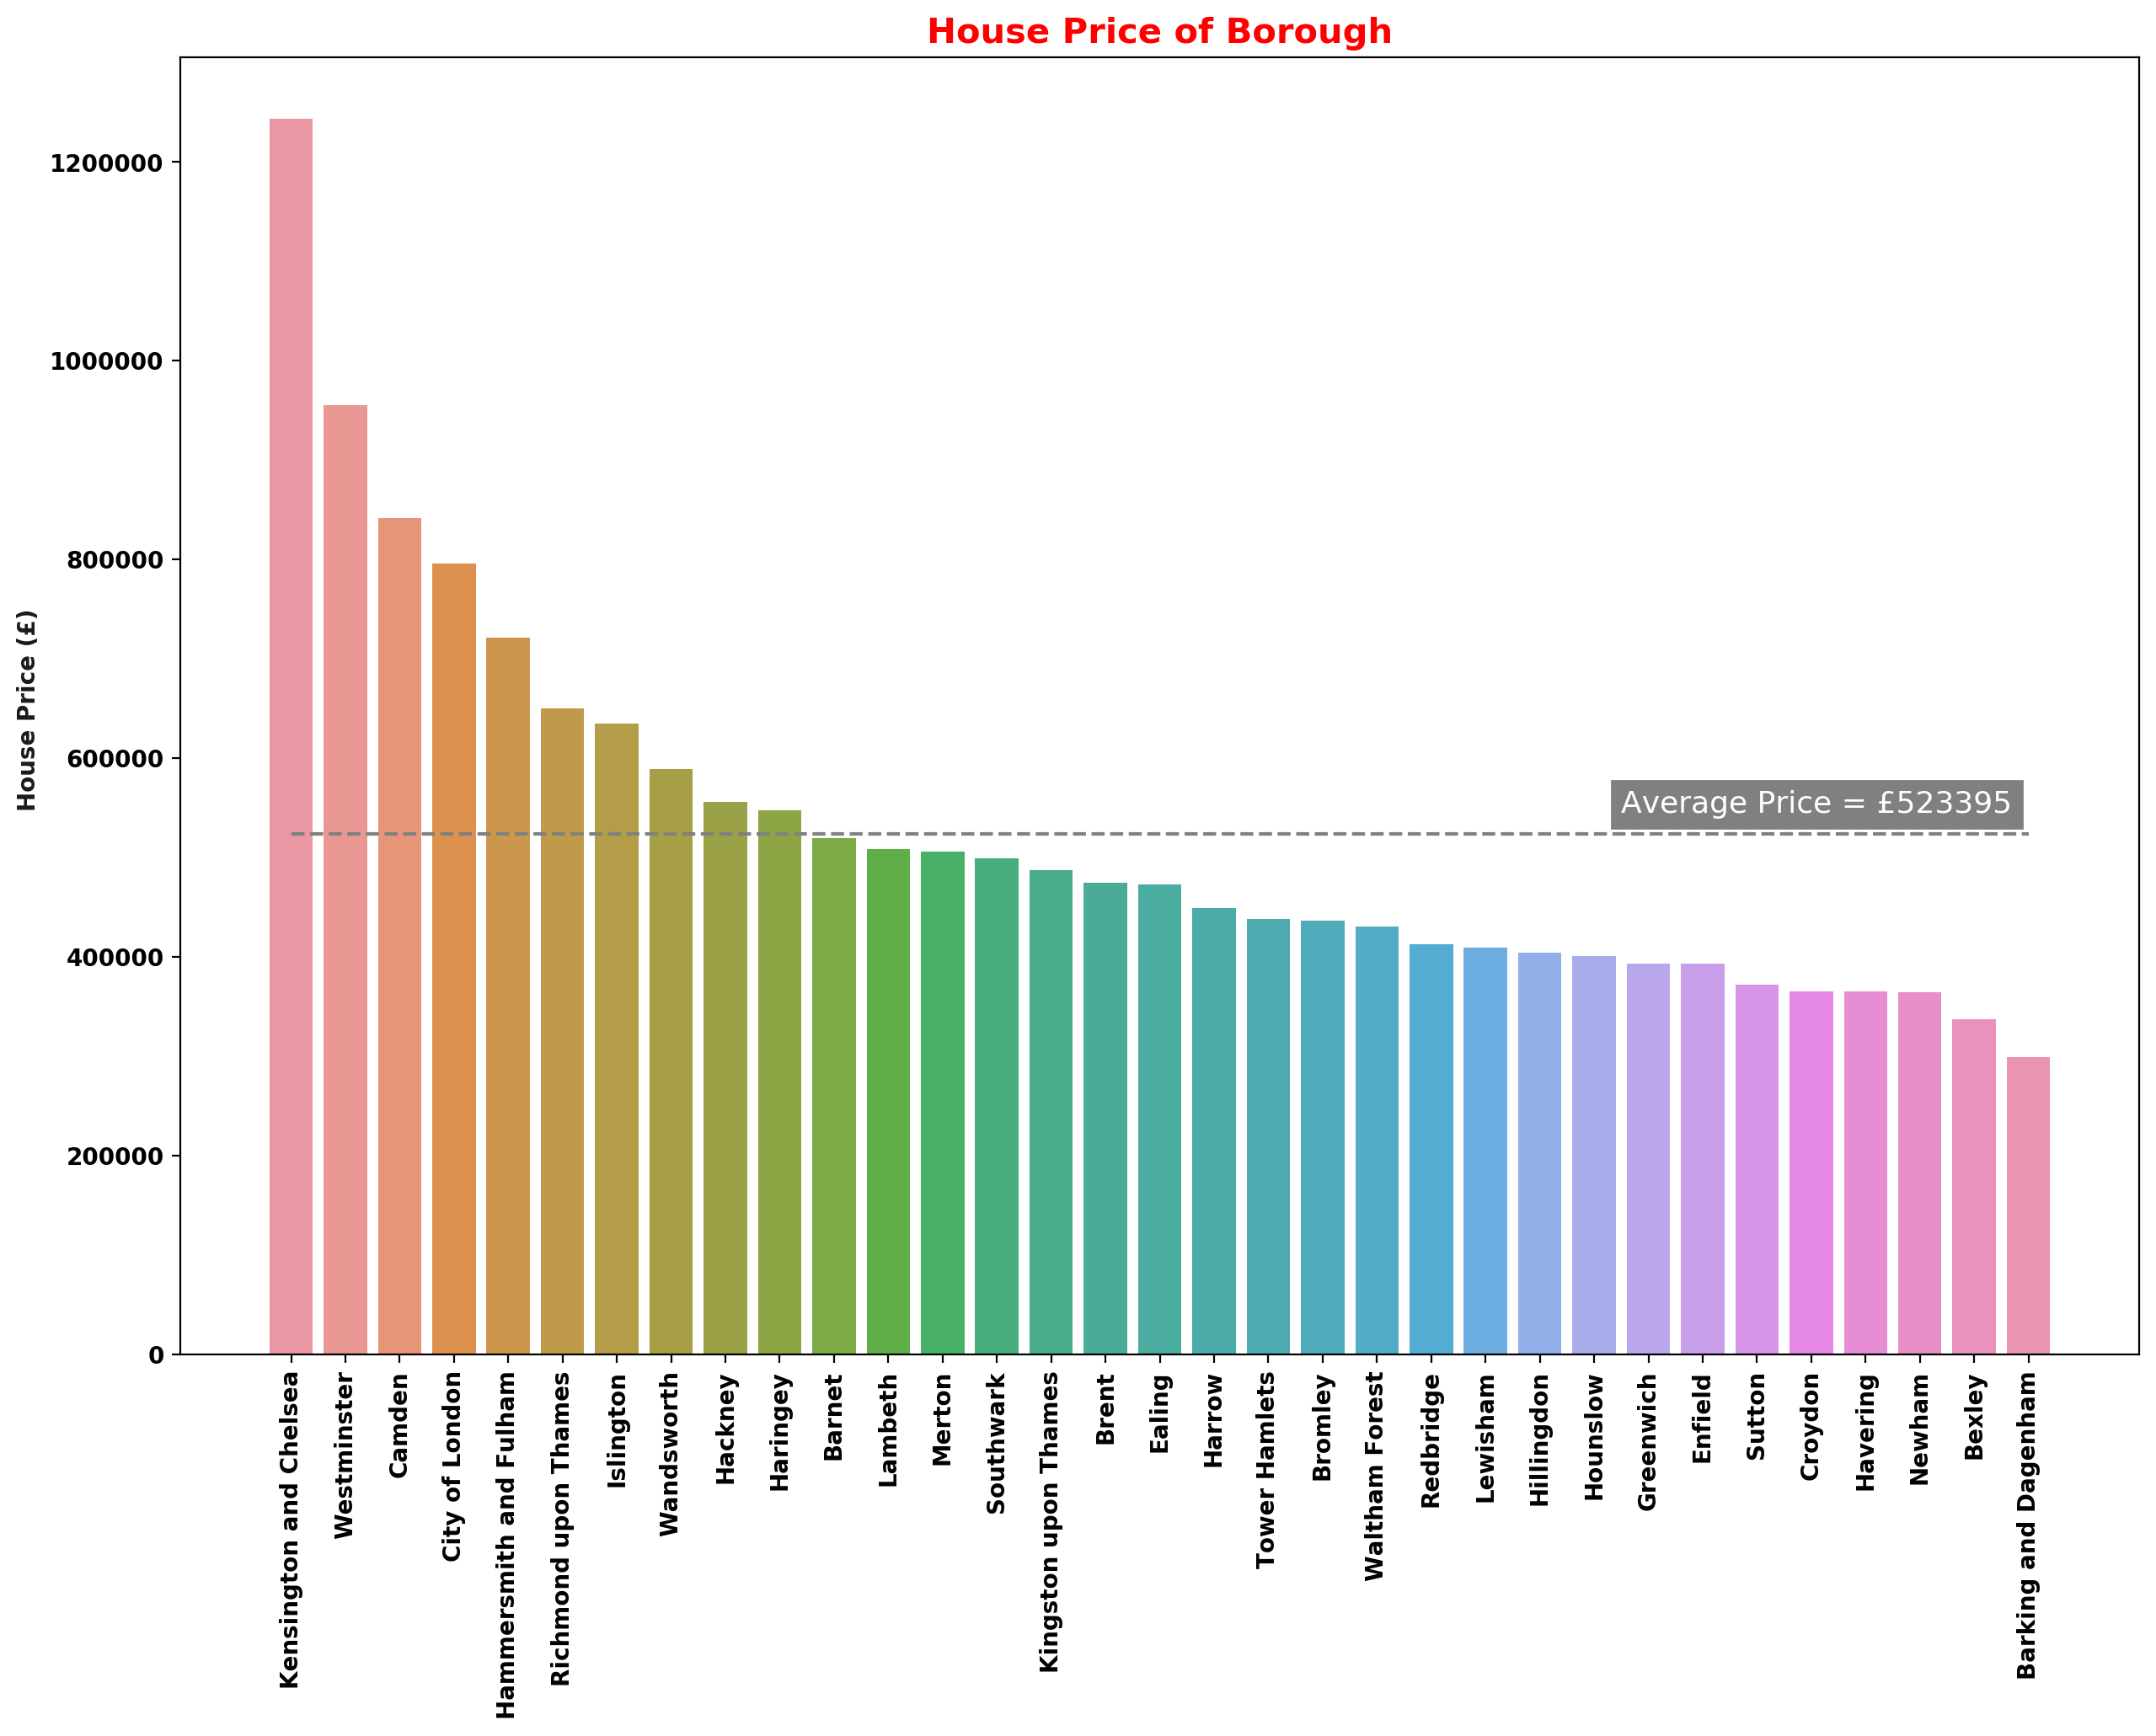

In [34]:
# Barplot of Average House Price Rate
house_price_graph = house_price.sort_values("Average",ascending=False)
plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x="Borough", y="Average", data=house_price_graph)
plt.title("House Price of Borough", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("House Price (£) ",weight= "bold",c="k")
plt.yticks(weight="bold")
x_coordinates = [0, 32]
y_median = [523395, 523395]

plt.plot(x_coordinates, y_median,linestyle = '--', c="gray")
plt.text(24.5,545000,'Average Price = £523395',fontsize = 13,backgroundcolor = 'gray',color = 'white')
plt.savefig('images/08_HousePricePerBorough.png', dpi=200)
plt.show()

In [35]:
#Getting borough list
listing["neighbourhood"].unique()

array(['Lambeth', 'Islington', 'Kensington and Chelsea', 'Westminster',
       'Hammersmith and Fulham', 'Wandsworth', 'Barnet', 'Hounslow',
       'Camden', 'Richmond upon Thames', 'Haringey', 'Hackney',
       'Southwark', 'Croydon', 'Waltham Forest', 'Brent', 'Newham',
       'Tower Hamlets', 'Merton', 'Lewisham', 'Bromley', 'Havering',
       'Greenwich', 'Ealing', 'Enfield', 'City of London',
       'Barking and Dagenham', 'Hillingdon', 'Harrow', 'Redbridge',
       'Kingston upon Thames', 'Bexley', 'Sutton'], dtype=object)

In [36]:
inner_london = ['Kensington and Chelsea', 'Westminster','Hammersmith and Fulham', 'Wandsworth','Hackney', 
                'Southwark','Tower Hamlets', 'Camden','Lambeth', 'Greenwich', 'City of London','Islington']

inner_london_filter=listing[listing["neighbourhood"].isin(inner_london)]
outer_london_filter=listing[~listing["neighbourhood"].isin(inner_london)]
print(len(inner_london_filter))
print(len(outer_london_filter))

63174
24057


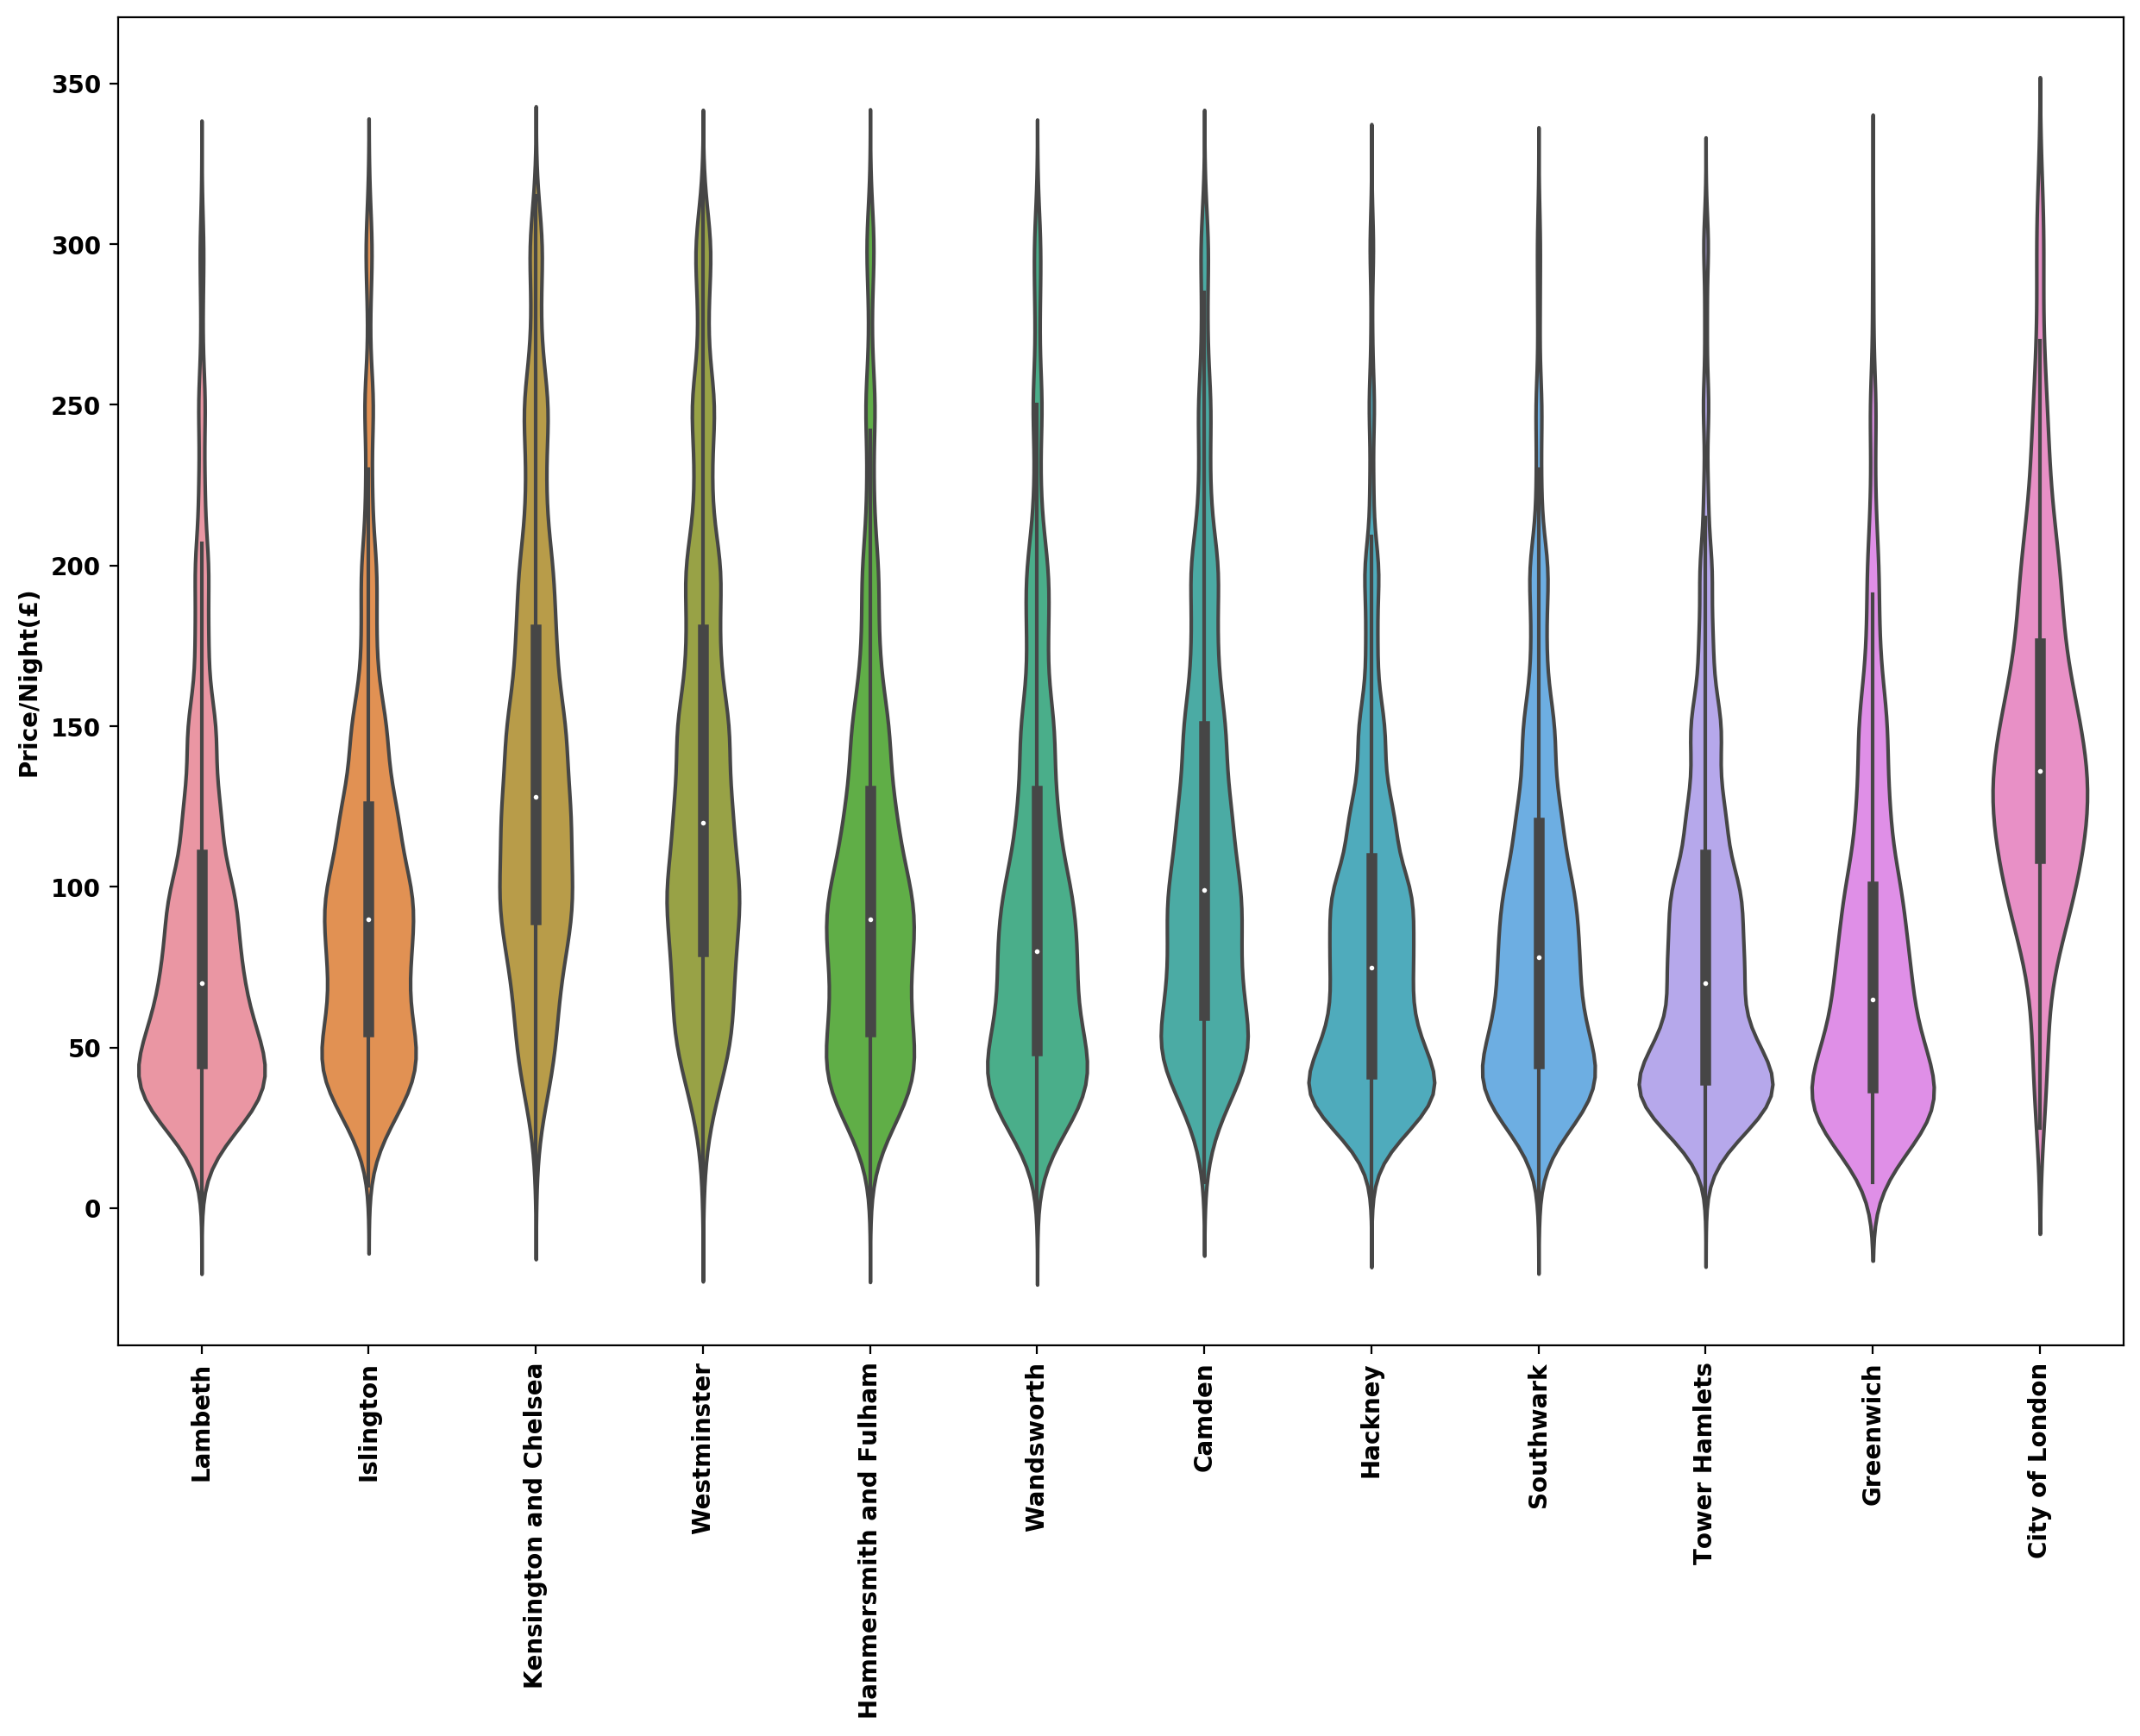

In [37]:
#Violinplot for Inner London Borough's Average Price
plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
listing_price_filter = inner_london_filter[inner_london_filter["price"]<inner_london_filter.price.quantile(0.93)]
sns.violinplot(data=listing_price_filter, x='neighbourhood', y='price')
plt.xlabel("")
plt.ylabel("Price/Night(£)",weight="bold")
plt.yticks( weight="bold")
plt.xticks(rotation=90, weight="bold")
plt.savefig('images/09_ViolinAveragePriceNightBoroughInner.png', dpi=200)

plt.show()


<Figure size 3000x2000 with 0 Axes>

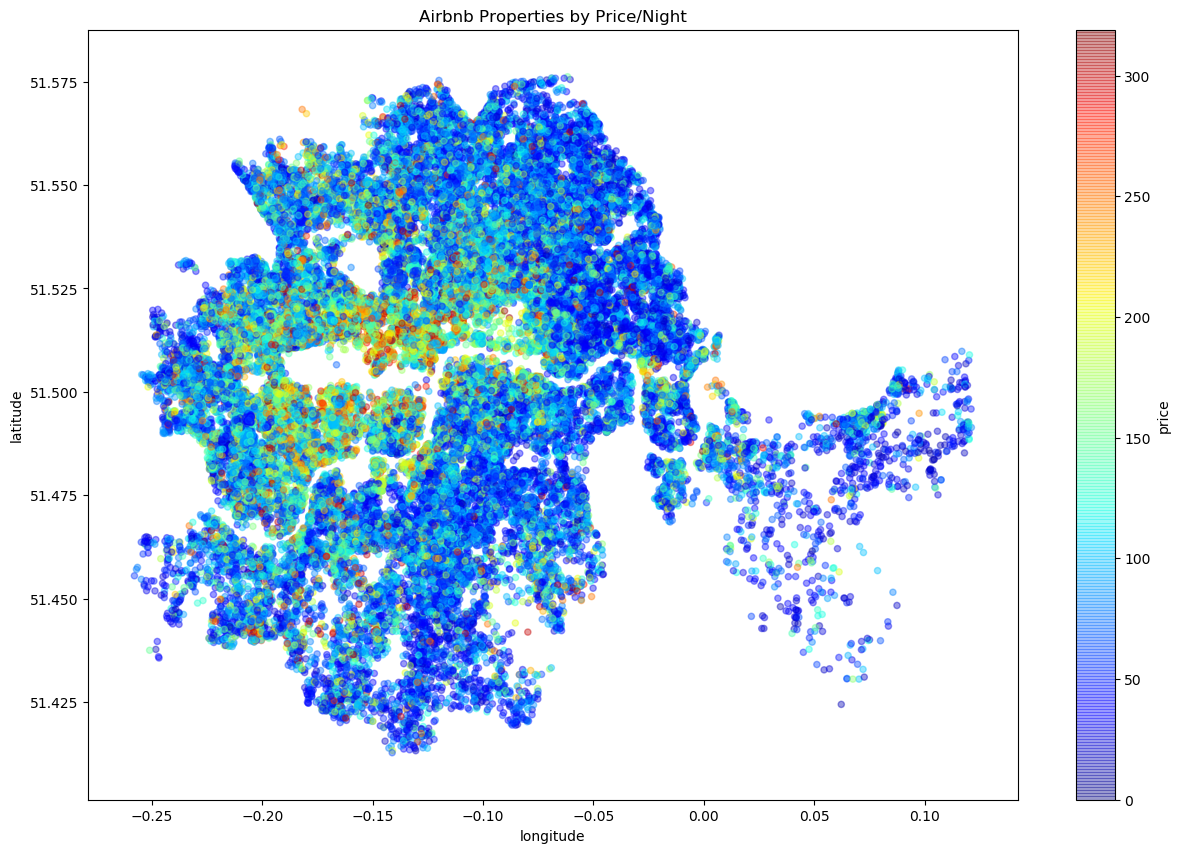

In [38]:
#Map for list Average Price

plt.figure(figsize=(15,10),dpi=200),

listing_map=listing_price_filter.plot(kind='scatter', x='longitude', y='latitude', c='price', 
                                      cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4,figsize=(15,10))
plt.title("Airbnb Properties by Price/Night")
plt.savefig('images/10_MapAveragePriceNightList.png', dpi=200)

plt.show()

In [62]:
#Setting Factor for Estimating of Occupancy to Inner and Outer London's Borough
clean_list = listing.groupby("neighbourhood").mean()
clean_list = clean_list[["price","minimum_nights","reviews_per_month"]].reset_index()
clean_list["factor"] = clean_list["neighbourhood"].apply(lambda x:1.50 if x in(inner_london) else 1.25)
clean_list["est_night/year"] = round(clean_list["reviews_per_month"]*clean_list["minimum_nights"]*12*clean_list["factor"],2)
clean_list["annual_income"] = clean_list["price"]*clean_list["est_night/year"]
clean_list.sample(5)

neighbourhood       price  minimum_nights  reviews_per_month  \
24                  Newham   82.523879        4.147173           1.216904   
32             Westminster  218.893300        4.733300           1.416695   
22                Lewisham   70.775054        3.935914           0.884683   
15                Havering   68.168627        2.352941           1.039834   
12  Hammersmith and Fulham  141.850736        3.501752           1.166112   

    factor  est_night/year  annual_income  
24    1.25           75.70    6247.057651  
32    1.50          120.70   26420.421280  
22    1.25           52.23    3696.581058  
15    1.25           36.70    2501.788627  
12    1.50           73.50   10426.029082

In [40]:
#House Price and Increment Analysis

uk_house_price = uk_house_price.iloc[1:,:34]

uk_house_price.rename(columns={'Unnamed: 0':'date'}, inplace=True)

uk_house_price["year"] = pd.DatetimeIndex(uk_house_price["date"]).year

columns_to_change = list(uk_house_price)

columns_to_change = [
 'City of London',
 'Barking & Dagenham',
 'Barnet',
 'Bexley',
 'Brent',
 'Bromley',
 'Camden',
 'Croydon',
 'Ealing',
 'Enfield',
 'Greenwich',
 'Hackney',
 'Hammersmith & Fulham',
 'Haringey',
 'Harrow',
 'Havering',
 'Hillingdon',
 'Hounslow',
 'Islington',
 'Kensington & Chelsea',
 'Kingston upon Thames',
 'Lambeth',
 'Lewisham',
 'Merton',
 'Newham',
 'Redbridge',
 'Richmond upon Thames',
 'Southwark',
 'Sutton',
 'Tower Hamlets',
 'Waltham Forest',
 'Wandsworth',
 'Westminster']

uk_house_price[columns_to_change] = uk_house_price[columns_to_change].astype(float)

uk_house_price.columns=['date', 'City of London', 'Barking and Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'year']

uk_house_price_yearly = uk_house_price.groupby("year").mean().reset_index()

uk_house_price_yearly.drop([0,25], inplace=True)

uk_house_price_yearly["City of London_inc"] = uk_house_price_yearly["City of London"].pct_change()*100
uk_house_price_yearly["Barking and Dagenham_inc"] = uk_house_price_yearly["Barking and Dagenham"].pct_change()*100
uk_house_price_yearly["Barnet_inc"] = uk_house_price_yearly["Barnet"].pct_change()*100
uk_house_price_yearly["Bexley_inc"] = uk_house_price_yearly["Bexley"].pct_change()*100
uk_house_price_yearly["Brent_inc"] = uk_house_price_yearly["Brent"].pct_change()*100
uk_house_price_yearly["Bromley_inc"] = uk_house_price_yearly["Bromley"].pct_change()*100
uk_house_price_yearly["Camden_inc"] = uk_house_price_yearly["Camden"].pct_change()*100
uk_house_price_yearly["Croydon_inc"] = uk_house_price_yearly["Croydon"].pct_change()*100
uk_house_price_yearly["Ealing_inc"] = uk_house_price_yearly["Ealing"].pct_change()*100
uk_house_price_yearly["Enfield_inc"] = uk_house_price_yearly["Enfield"].pct_change()*100
uk_house_price_yearly["Greenwich_inc"] = uk_house_price_yearly["Greenwich"].pct_change()*100
uk_house_price_yearly["Hackney_inc"] = uk_house_price_yearly["Hackney"].pct_change()*100
uk_house_price_yearly["Hammersmith and Fulham_inc"] = uk_house_price_yearly["Hammersmith and Fulham"].pct_change()*100
uk_house_price_yearly["Haringey_inc"] = uk_house_price_yearly["Haringey"].pct_change()*100
uk_house_price_yearly["Harrow_inc"] = uk_house_price_yearly["Harrow"].pct_change()*100
uk_house_price_yearly["Havering_inc"] = uk_house_price_yearly["Havering"].pct_change()*100
uk_house_price_yearly["Hillingdon_inc"] = uk_house_price_yearly["Hillingdon"].pct_change()*100
uk_house_price_yearly["Hounslow_inc"] = uk_house_price_yearly["Hounslow"].pct_change()*100
uk_house_price_yearly["Islington_inc"] = uk_house_price_yearly["Islington"].pct_change()*100
uk_house_price_yearly["Kensington and Chelsea_inc"] = uk_house_price_yearly["Kensington and Chelsea"].pct_change()*100
uk_house_price_yearly["Kingston upon Thames_inc"] = uk_house_price_yearly["Kingston upon Thames"].pct_change()*100
uk_house_price_yearly["Lambeth_inc"] = uk_house_price_yearly["Lambeth"].pct_change()*100
uk_house_price_yearly["Lewisham_inc"] = uk_house_price_yearly["Lewisham"].pct_change()*100
uk_house_price_yearly["Merton_inc"] = uk_house_price_yearly["Merton"].pct_change()*100
uk_house_price_yearly["Newham_inc"] = uk_house_price_yearly["Newham"].pct_change()*100
uk_house_price_yearly["Redbridge_inc"] = uk_house_price_yearly["Redbridge"].pct_change()*100
uk_house_price_yearly["Richmond upon Thames_inc"] = uk_house_price_yearly["Richmond upon Thames"].pct_change()*100
uk_house_price_yearly["Southwark_inc"] = uk_house_price_yearly["Southwark"].pct_change()*100
uk_house_price_yearly["Sutton_inc"] = uk_house_price_yearly["Sutton"].pct_change()*100
uk_house_price_yearly["Tower Hamlets_inc"] = uk_house_price_yearly["Tower Hamlets"].pct_change()*100
uk_house_price_yearly["Waltham Forest_inc"] = uk_house_price_yearly["Waltham Forest"].pct_change()*100
uk_house_price_yearly["Wandsworth_inc"] = uk_house_price_yearly["Wandsworth"].pct_change()*100
uk_house_price_yearly["Westminster_inc"] = uk_house_price_yearly["Westminster"].pct_change()*100


uk_house_price_yearly_borough = uk_house_price_yearly.mean()
uk_house_price_yearly_borough = pd.DataFrame(uk_house_price_yearly_borough).tail(33).reset_index()


uk_house_price_yearly_borough["index"] = uk_house_price_yearly_borough["index"].str.replace("_inc","")
uk_house_price_yearly_borough

index         0
0           City of London  9.659781
1     Barking and Dagenham  8.334417
2                   Barnet  7.971727
3                   Bexley  7.635077
4                    Brent  8.625588
5                  Bromley  7.698820
6                   Camden  8.578542
7                  Croydon  7.780833
8                   Ealing  8.096197
9                  Enfield  7.769884
10               Greenwich  8.352165
11                 Hackney  9.760752
12  Hammersmith and Fulham  7.942295
13                Haringey  8.698491
14                  Harrow  7.729065
15                Havering  7.762934
16              Hillingdon  7.817524
17                Hounslow  7.853353
18               Islington  8.835649
19  Kensington and Chelsea  8.476322
20    Kingston upon Thames  8.086654
21                 Lambeth  9.166098
22                Lewisham  9.007641
23                  Merton  8.395846
24                  Newham  8.907331
25               Redbridge  7.951072
26    Richmond upon Thames  8.013783
27               Southwark  9.238035
28                  Sutton  7.714057
29           Tower Hamlets  8.694577
30          Waltham Forest  9.139506
31              Wandsworth  8.689102
32             Westminster  8.979471

In [41]:
#Merge with related data frame about borough
uk_borough_detail = clean_list.merge(uk_house_price_yearly_borough, left_on='neighbourhood', right_on='index')
uk_borough_detail = uk_borough_detail.drop(["index"],axis=1)
uk_borough_detail.columns = ['borough','price/night', 'min_nights','reviews','factor','est_night/year','annual_income','avg_increment']
uk_borough_detail = uk_borough_detail.round(2)
uk_borough_detail["inner_outer"] =uk_borough_detail["borough"].apply(lambda x:"inner" if x in (inner_london) else "outer")
uk_borough_detail = uk_borough_detail.merge(house_price,left_on="borough",right_on="Borough")
uk_borough_detail = uk_borough_detail.drop(["Borough"],axis=1)
uk_borough_detail

borough  price/night  min_nights  reviews  factor  \
0     Barking and Dagenham        60.60        4.42     1.02    1.25   
1                   Barnet        91.30        5.58     0.97    1.25   
2                   Bexley        58.05        3.15     0.72    1.25   
3                    Brent        97.16        4.03     1.18    1.25   
4                  Bromley        64.28        3.52     0.87    1.25   
5                   Camden       151.77        4.46     1.44    1.50   
6           City of London       187.41        5.75     1.22    1.50   
7                  Croydon        70.56        3.67     1.04    1.25   
8                   Ealing        88.21        4.24     1.03    1.25   
9                  Enfield        68.15        3.18     0.87    1.25   
10               Greenwich        89.58        3.23     1.12    1.50   
11                 Hackney        95.09        4.35     0.85    1.50   
12  Hammersmith and Fulham       141.85        3.50     1.17    1.50   
13                Haringey        94.63        4.37     1.00    1.25   
14                  Harrow        81.71        3.93     0.93    1.25   
15                Havering        68.17        2.35     1.04    1.25   
16              Hillingdon        68.37        7.52     1.53    1.25   
17                Hounslow       102.58        3.61     1.32    1.25   
18               Islington       116.97        3.53     1.11    1.50   
19  Kensington and Chelsea       220.92        4.52     1.14    1.50   
20    Kingston upon Thames        81.33        3.41     1.07    1.25   
21                 Lambeth        97.06        3.63     1.23    1.50   
22                Lewisham        70.78        3.94     0.88    1.25   
23                  Merton       113.04        4.18     0.81    1.25   
24                  Newham        82.52        4.15     1.22    1.25   
25               Redbridge        69.58        3.61     1.03    1.25   
26    Richmond upon Thames       130.11        4.06     1.03    1.25   
27               Southwark       110.54        3.90     1.26    1.50   
28                  Sutton        84.14        3.68     1.00    1.25   
29           Tower Hamlets        94.65        4.34     1.28    1.50   
30          Waltham Forest        70.88        4.04     0.94    1.25   
31              Wandsworth       126.97        3.92     0.96    1.50   
32             Westminster       218.89        4.73     1.42    1.50   

    est_night/year  annual_income  avg_increment inner_outer    Average  
0            67.82        4109.75           8.33       outer   298620.0  
1            81.40        7431.47           7.97       outer   519611.0  
2            33.77        1960.25           7.64       outer   336858.0  
3            71.22        6919.70           8.63       outer   474513.0  
4            45.93        2952.41           7.70       outer   436460.0  
5           115.66       17553.50           8.58       inner   841744.0  
6           126.34       23677.81           9.66       inner   796181.0  
7            57.43        4052.51           7.78       outer   365441.0  
8            65.65        5791.05           8.10       outer   472913.0  
9            41.69        2841.15           7.77       outer   392835.0  
10           65.13        5834.31           8.35       inner   393062.0  
11           66.42        6315.56           9.76       inner   555655.0  
12           73.50       10426.03           7.94       inner   721459.0  
13           65.61        6208.98           8.70       outer   547222.0  
14           54.89        4485.13           7.73       outer   449261.0  
15           36.70        2501.79           7.76       outer   364778.0  
16          172.15       11769.16           7.82       outer   404537.0  
17           71.52        7336.26           7.85       outer   400906.0  
18           70.71        8271.25           8.84       inner   634610.0  
19           93.15       20578.44           8.48       inner  1243722.0  
20           54.

In [42]:
# Council Tax Analyis

council_tax = council_tax.iloc[1:,]
council_tax.drop(["Code"], axis=1, inplace=True)

list(council_tax["Local authority"])

council_tax_avg = council_tax.T

council_tax_avg.columns = list(council_tax["Local authority"])

council_tax_avg = council_tax_avg.iloc[1:,]

council_tax_avg = council_tax_avg.mean().reset_index()

council_tax_avg.columns=["borough","avg_council_tax"]

list(council_tax_avg["borough"])

council_tax_avg["borough"] = ['City of London',
 'Barking and Dagenham',
 'Barnet',
 'Bexley',
 'Brent',
 'Bromley',
 'Camden',
 'Croydon',
 'Ealing',
 'Enfield',
 'Greenwich',
 'Hackney',
 'Hammersmith and Fulham',
 'Haringey',
 'Harrow',
 'Havering',
 'Hillingdon',
 'Hounslow',
 'Islington',
 'Kensington and Chelsea',
 'Kingston upon Thames',
 'Lambeth',
 'Lewisham',
 'Merton',
 'Newham',
 'Redbridge',
 'Richmond upon Thames',
 'Southwark',
 'Sutton',
 'Tower Hamlets',
 'Waltham Forest',
 'Wandsworth',
 'Westminster']

council_tax_avg

borough  avg_council_tax
0           City of London      1217.021250
1     Barking and Dagenham      1953.717917
2                   Barnet      1940.390000
3                   Bexley      2108.106667
4                    Brent      1987.478750
5                  Bromley      1929.515000
6                   Camden      1962.007083
7                  Croydon      2155.787500
8                   Ealing      1898.557500
9                  Enfield      2049.140000
10               Greenwich      1870.367083
11                 Hackney      1826.613333
12  Hammersmith and Fulham      1358.758750
13                Haringey      2059.761250
14                  Harrow      2241.204583
15                Havering      2169.973333
16              Hillingdon      1830.637083
17                Hounslow      1941.815833
18               Islington      1870.632917
19  Kensington and Chelsea      1515.262083
20    Kingston upon Thames      2350.389583
21                 Lambeth      1814.481667
22                Lewisham      1989.448333
23                  Merton      1949.802917
24                  Newham      1671.463333
25               Redbridge      2042.131667
26    Richmond upon Thames      2261.565000
27               Southwark      1741.063333
28                  Sutton      2127.500417
29           Tower Hamlets      1682.507500
30          Waltham Forest      2127.041250
31              Wandsworth       966.449167
32             Westminster       944.904583

In [43]:
uk_borough_detail_brief = uk_borough_detail.merge(council_tax_avg, left_on="borough", right_on="borough")

uk_borough_detail_brief= uk_borough_detail_brief.round(2)

uk_borough_detail_brief

borough  price/night  min_nights  reviews  factor  \
0     Barking and Dagenham        60.60        4.42     1.02    1.25   
1                   Barnet        91.30        5.58     0.97    1.25   
2                   Bexley        58.05        3.15     0.72    1.25   
3                    Brent        97.16        4.03     1.18    1.25   
4                  Bromley        64.28        3.52     0.87    1.25   
5                   Camden       151.77        4.46     1.44    1.50   
6           City of London       187.41        5.75     1.22    1.50   
7                  Croydon        70.56        3.67     1.04    1.25   
8                   Ealing        88.21        4.24     1.03    1.25   
9                  Enfield        68.15        3.18     0.87    1.25   
10               Greenwich        89.58        3.23     1.12    1.50   
11                 Hackney        95.09        4.35     0.85    1.50   
12  Hammersmith and Fulham       141.85        3.50     1.17    1.50   
13                Haringey        94.63        4.37     1.00    1.25   
14                  Harrow        81.71        3.93     0.93    1.25   
15                Havering        68.17        2.35     1.04    1.25   
16              Hillingdon        68.37        7.52     1.53    1.25   
17                Hounslow       102.58        3.61     1.32    1.25   
18               Islington       116.97        3.53     1.11    1.50   
19  Kensington and Chelsea       220.92        4.52     1.14    1.50   
20    Kingston upon Thames        81.33        3.41     1.07    1.25   
21                 Lambeth        97.06        3.63     1.23    1.50   
22                Lewisham        70.78        3.94     0.88    1.25   
23                  Merton       113.04        4.18     0.81    1.25   
24                  Newham        82.52        4.15     1.22    1.25   
25               Redbridge        69.58        3.61     1.03    1.25   
26    Richmond upon Thames       130.11        4.06     1.03    1.25   
27               Southwark       110.54        3.90     1.26    1.50   
28                  Sutton        84.14        3.68     1.00    1.25   
29           Tower Hamlets        94.65        4.34     1.28    1.50   
30          Waltham Forest        70.88        4.04     0.94    1.25   
31              Wandsworth       126.97        3.92     0.96    1.50   
32             Westminster       218.89        4.73     1.42    1.50   

    est_night/year  annual_income  avg_increment inner_outer    Average  \
0            67.82        4109.75           8.33       outer   298620.0   
1            81.40        7431.47           7.97       outer   519611.0   
2            33.77        1960.25           7.64       outer   336858.0   
3            71.22        6919.70           8.63       outer   474513.0   
4            45.93        2952.41           7.70       outer   436460.0   
5           115.66       17553.50           8.58       inner   841744.0   
6           126.34       23677.81           9.66       inner   796181.0   
7            57.43        4052.51           7.78       outer   365441.0   
8            65.65        5791.05           8.10       outer   472913.0   
9            41.69        2841.15           7.77       outer   392835.0   
10           65.13        5834.31           8.35       inner   393062.0   
11           66.42        6315.56           9.76       inner   555655.0   
12           73.50       10426.03           7.94       inner   721459.0   
13           65.61        6208.98           8.70       outer   547222.0   
14           54.89        4485.13           7.73       outer   449261.0   
15           36.70        2501.79           7.76       outer   364778.0   
16          172.15       11769.16           7.82       outer   404537.0   
17           71.52        7336.26           7.85       outer   400906.0   
18           70.71        8271.25           8.84       inner   634610.0   
19           93.15       20578.44           8.48       inner  1243722.

In [63]:
montly_fixed_cost = pd.DataFrame(columns=["insurance","electric","gas","water","internet","maintenance","other"], 
                                 data=[[50,45,40,30,35,200,50]])

montly_fixed_cost.index.names = ['index']
montly_fixed_cost.index.value="fixed_cost"

#montly_fixed_cost.sum().sum()
montly_fixed_cost

insurance  electric  gas  water  internet  maintenance  other
index                                                               
0             50        45   40     30        35          200     50

In [45]:
#uk_borough_brief=uk_borough_detail_brief.drop(["ROI","after1yr","avg_council_tax"],axis=1)
#uk_borough_brief

In [46]:
uk_borough_detail_brief["sd_cost"]=uk_borough_detail_brief["Average"].apply(lambda x: (125000*2/100)+((925000-250000)*5/100)+((x-925000)*10/100)

 if x>925000 else (125000*2/100)+((x-250000)*5/100))

uk_borough_detail_brief["other_initial_cost"]=10000

uk_borough_detail_brief["total_initial"]= uk_borough_detail_brief["sd_cost"]+uk_borough_detail_brief["other_initial_cost"]

uk_borough_detail_brief["total_budget"] = uk_borough_detail_brief["Average"]+uk_borough_detail_brief["total_initial"]

uk_borough_brief_result = uk_borough_detail_brief.drop(["sd_cost","other_initial_cost"],axis=1)
uk_borough_brief_result

borough  price/night  min_nights  reviews  factor  \
0     Barking and Dagenham        60.60        4.42     1.02    1.25   
1                   Barnet        91.30        5.58     0.97    1.25   
2                   Bexley        58.05        3.15     0.72    1.25   
3                    Brent        97.16        4.03     1.18    1.25   
4                  Bromley        64.28        3.52     0.87    1.25   
5                   Camden       151.77        4.46     1.44    1.50   
6           City of London       187.41        5.75     1.22    1.50   
7                  Croydon        70.56        3.67     1.04    1.25   
8                   Ealing        88.21        4.24     1.03    1.25   
9                  Enfield        68.15        3.18     0.87    1.25   
10               Greenwich        89.58        3.23     1.12    1.50   
11                 Hackney        95.09        4.35     0.85    1.50   
12  Hammersmith and Fulham       141.85        3.50     1.17    1.50   
13                Haringey        94.63        4.37     1.00    1.25   
14                  Harrow        81.71        3.93     0.93    1.25   
15                Havering        68.17        2.35     1.04    1.25   
16              Hillingdon        68.37        7.52     1.53    1.25   
17                Hounslow       102.58        3.61     1.32    1.25   
18               Islington       116.97        3.53     1.11    1.50   
19  Kensington and Chelsea       220.92        4.52     1.14    1.50   
20    Kingston upon Thames        81.33        3.41     1.07    1.25   
21                 Lambeth        97.06        3.63     1.23    1.50   
22                Lewisham        70.78        3.94     0.88    1.25   
23                  Merton       113.04        4.18     0.81    1.25   
24                  Newham        82.52        4.15     1.22    1.25   
25               Redbridge        69.58        3.61     1.03    1.25   
26    Richmond upon Thames       130.11        4.06     1.03    1.25   
27               Southwark       110.54        3.90     1.26    1.50   
28                  Sutton        84.14        3.68     1.00    1.25   
29           Tower Hamlets        94.65        4.34     1.28    1.50   
30          Waltham Forest        70.88        4.04     0.94    1.25   
31              Wandsworth       126.97        3.92     0.96    1.50   
32             Westminster       218.89        4.73     1.42    1.50   

    est_night/year  annual_income  avg_increment inner_outer    Average  \
0            67.82        4109.75           8.33       outer   298620.0   
1            81.40        7431.47           7.97       outer   519611.0   
2            33.77        1960.25           7.64       outer   336858.0   
3            71.22        6919.70           8.63       outer   474513.0   
4            45.93        2952.41           7.70       outer   436460.0   
5           115.66       17553.50           8.58       inner   841744.0   
6           126.34       23677.81           9.66       inner   796181.0   
7            57.43        4052.51           7.78       outer   365441.0   
8            65.65        5791.05           8.10       outer   472913.0   
9            41.69        2841.15           7.77       outer   392835.0   
10           65.13        5834.31           8.35       inner   393062.0   
11           66.42        6315.56           9.76       inner   555655.0   
12           73.50       10426.03           7.94       inner   721459.0   
13           65.61        6208.98           8.70       outer   547222.0   
14           54.89        4485.13           7.73       outer   449261.0   
15           36.70        2501.79           7.76       outer   364778.0   
16          172.15       11769.16           7.82       outer   404537.0   
17           71.52        7336.26           7.85       outer   400906.0   
18           70.71        8271.25           8.84       inner   634610.0   
19           93.15       20578.44           8.48       inner  1243722.

In [47]:
uk_borough_brief_result[(uk_borough_brief_result["total_budget"]<750000)&(uk_borough_brief_result["inner_outer"]=="inner")]

borough  price/night  min_nights  reviews  factor  est_night/year  \
10      Greenwich        89.58        3.23     1.12     1.5           65.13   
11        Hackney        95.09        4.35     0.85     1.5           66.42   
18      Islington       116.97        3.53     1.11     1.5           70.71   
21        Lambeth        97.06        3.63     1.23     1.5           80.26   
27      Southwark       110.54        3.90     1.26     1.5           88.61   
29  Tower Hamlets        94.65        4.34     1.28     1.5           99.58   
31     Wandsworth       126.97        3.92     0.96     1.5           67.94   

    annual_income  avg_increment inner_outer   Average  avg_council_tax  \
10        5834.31           8.35       inner  393062.0          1870.37   
11        6315.56           9.76       inner  555655.0          1826.61   
18        8271.25           8.84       inner  634610.0          1870.63   
21        7790.15           9.17       inner  508419.0          1814.48   
27        9795.13           9.24       inner  499247.0          1741.06   
29        9425.58           8.69       inner  438461.0          1682.51   
31        8626.00           8.69       inner  588613.0           966.45   

    total_initial  total_budget  
10       19653.10     412715.10  
11       27782.75     583437.75  
18       31730.50     666340.50  
21       25420.95     533839.95  
27       24962.35     524209.35  
29       21923.05     460384.05  
31       29430.65     618043.65

In [48]:
uk_borough_brief_result["occ_rate"] = uk_borough_brief_result["est_night/year"]/365

uk_borough_brief_result["annual_expense"] = (montly_fixed_cost.sum().sum() * uk_borough_brief_result["occ_rate"] * 12) +(uk_borough_detail_brief["avg_council_tax"])

uk_borough_brief_result["annual_return"] = (uk_borough_brief_result["annual_income"]-uk_borough_brief_result["annual_expense"])

uk_borough_brief_result["avg_h_pri_aft1"] = (uk_borough_brief_result["Average"])*((1+(uk_borough_brief_result["avg_increment"]/100)))

uk_borough_brief_result["ROI"] = uk_borough_brief_result["annual_return"] / uk_borough_brief_result["total_budget"] * 100

uk_borough_brief_result["profit_aft1"] = uk_borough_brief_result["avg_h_pri_aft1"] + uk_borough_brief_result["annual_income"] - uk_borough_brief_result["total_budget"] - uk_borough_brief_result["annual_expense"] - (uk_borough_brief_result["avg_h_pri_aft1"]*1.75/100)


uk_borough_brief_result_profit = uk_borough_brief_result[["borough","price/night","est_night/year","occ_rate","annual_income","annual_expense","annual_return","Average","avg_increment","total_initial","total_budget","avg_h_pri_aft1","profit_aft1","ROI"]]

uk_borough_brief_result_profit[(uk_borough_brief_result["total_budget"]<750000)&(uk_borough_brief_result["inner_outer"]=="inner")].sort_values("ROI",ascending=False)

uk_borough_brief_result = round(uk_borough_brief_result,2)

uk_borough_brief_result_profit.sort_values("ROI",ascending=False)

#uk_borough_brief_result_profit

borough  price/night  est_night/year  occ_rate  \
6           City of London       187.41          126.34  0.346137   
32             Westminster       218.89          120.70  0.330685   
16              Hillingdon        68.37          172.15  0.471644   
5                   Camden       151.77          115.66  0.316877   
29           Tower Hamlets        94.65           99.58  0.272822   
19  Kensington and Chelsea       220.92           93.15  0.255205   
27               Southwark       110.54           88.61  0.242767   
31              Wandsworth       126.97           67.94  0.186137   
12  Hammersmith and Fulham       141.85           73.50  0.201370   
17                Hounslow       102.58           71.52  0.195945   
24                  Newham        82.52           75.70  0.207397   
21                 Lambeth        97.06           80.26  0.219890   
18               Islington       116.97           70.71  0.193726   
1                   Barnet        91.30           81.40  0.223014   
3                    Brent        97.16           71.22  0.195123   
10               Greenwich        89.58           65.13  0.178438   
26    Richmond upon Thames       130.11           62.42  0.171014   
11                 Hackney        95.09           66.42  0.181973   
8                   Ealing        88.21           65.65  0.179863   
23                  Merton       113.04           50.73  0.138986   
13                Haringey        94.63           65.61  0.179753   
28                  Sutton        84.14           55.04  0.150795   
0     Barking and Dagenham        60.60           67.82  0.185808   
14                  Harrow        81.71           54.89  0.150384   
7                  Croydon        70.56           57.43  0.157342   
20    Kingston upon Thames        81.33           54.90  0.150411   
30          Waltham Forest        70.88           56.96  0.156055   
25               Redbridge        69.58           55.72  0.152658   
22                Lewisham        70.78           52.23  0.143096   
4                  Bromley        64.28           45.93  0.125836   
9                  Enfield        68.15           41.69  0.114219   
15                Havering        68.17           36.70  0.100548   
2                   Bexley        58.05           33.77  0.092521   

    annual_income  annual_expense  annual_return    Average  avg_increment  \
6        23677.81     3086.159726   20591.650274   796181.0           9.66   
32       26420.42     2730.598630   23689.821370   955353.0           8.98   
16       11769.16     4377.516712    7391.643288   404537.0           7.82   
5        17553.50     3673.144247   13880.355753   841744.0           8.58   
29        9425.58     3155.748356    6269.831644   438461.0           8.69   
19       20578.44     2893.369589   17685.070411  1243722.0           8.48   
27        9795.13     3052.002466    6743.127534   499247.0           9.24   
31        8626.00     1971.589726    6654.410274   588613.0           8.69   
12       10426.03     2446.157260    7979.872740   721459.0           7.94   
17        7336.26     2999.924110    4336.335890   400906.0           7.85   
24        6247.06     2791.405205    3455.654795   363957.0           8.91   
21        7790.15     3001.888219    4788.261781   508419.0           9.17   
18        8271.25     2916.750548    5354.499452   634610.0           8.84   
1         7431.47     3144.663973    4286.806027   519611.0           7.97   
3         6919.70     3041.145753    3878.554247   474513.0           8.63   
10        5834.31     2833.937123    3000.372877   393062.0           8.35   
26        8121.76     3185.033973    4936.726027   650028.0           8.01   
11        6315.56     2809.262055    3506.297945   555655.0           9.76   
8         5791.05     2869.820274    2921.229726   472913.0           8.10   
23        5734.67     2700.326027    3034.343973   506193.0           8.40   
13        6208.98     3030.428493 

In [49]:
# Sales Volume Analyis

sales_volume = sales_volume.iloc[1:,:34]

sales_volume.rename(columns={'Unnamed: 0':'date'}, inplace=True)

sales_volume["year"] = pd.DatetimeIndex(sales_volume["date"]).year
sales_volume["month"] = pd.DatetimeIndex(sales_volume["date"]).month

columns_to_change_sales = list(sales_volume.columns)

columns_to_change_sales

columns_to_change = [
 'City of London',
 'Barking & Dagenham',
 'Barnet',
 'Bexley',
 'Brent',
 'Bromley',
 'Camden',
 'Croydon',
 'Ealing',
 'Enfield',
 'Greenwich',
 'Hackney',
 'Hammersmith & Fulham',
 'Haringey',
 'Harrow',
 'Havering',
 'Hillingdon',
 'Hounslow',
 'Islington',
 'Kensington & Chelsea',
 'Kingston upon Thames',
 'Lambeth',
 'Lewisham',
 'Merton',
 'Newham',
 'Redbridge',
 'Richmond upon Thames',
 'Southwark',
 'Sutton',
 'Tower Hamlets',
 'Waltham Forest',
 'Wandsworth',
 'Westminster',
]

sales_volume[columns_to_change] = sales_volume[columns_to_change].astype(float)

sales_volume.columns=['date', 'City of London', 'Barking and Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'year','month']

sales_volume_yearly = sales_volume.groupby("year").sum().reset_index()

sales_volume_yearly.drop([0,25], inplace=True)

sales_volume_borough = pd.DataFrame(sales_volume_yearly.mean()).iloc[1:34]

sales_volume_borough.columns=["avg_volume/year"]

sales_volume_borough = round(sales_volume_borough,2)

sales_volume_borough["avg_volume/year_scale"] = MinMaxScaler().fit_transform(sales_volume_borough.iloc[:,0].values.reshape(-1,1))

sales_volume_borough

avg_volume/year  avg_volume/year_scale
City of London                   309.50               0.000000
Barking and Dagenham            2426.25               0.335269
Barnet                          5399.83               0.806251
Bexley                          3925.62               0.572753
Brent                           3265.58               0.468210
Bromley                         6013.71               0.903483
Camden                          2992.62               0.424976
Croydon                         5884.17               0.882965
Ealing                          4431.67               0.652905
Enfield                         4616.83               0.682233
Greenwich                       3838.92               0.559020
Hackney                         2673.79               0.374477
Hammersmith and Fulham          3033.92               0.431517
Haringey                        3253.83               0.466349
Harrow                          3189.92               0.456226
Havering                        3845.21               0.560017
Hillingdon                      4233.88               0.621578
Hounslow                        3427.21               0.493810
Islington                       2782.42               0.391683
Kensington and Chelsea          3077.12               0.438360
Kingston upon Thames            3040.46               0.432553
Lambeth                         4789.29               0.709548
Lewisham                        4381.04               0.644886
Merton                          3511.04               0.507088
Newham                          3484.12               0.502824
Redbridge                       4116.29               0.602953
Richmond upon Thames            3913.38               0.570814
Southwark                       4073.54               0.596182
Sutton                          3678.75               0.533651
Tower Hamlets                   4203.88               0.616826
Waltham Forest                  3751.50               0.545174
Wandsworth                      6623.08               1.000000
Westminster                     4292.75               0.630902

In [50]:
uk_borough_final_result = uk_borough_brief_result_profit.merge(sales_volume_borough, left_on="borough", right_on=sales_volume_borough.index)

uk_borough_final_result.columns=['borough', 'price/night', 'est_night/year', 'occ_rate', 'annual_income',
       'annual_expense', 'annual_return', 'avg_house_price', 'avg_increment',
       'initial_expense', 'total_budget', 'avg_h_pri_aft1', 'profit_aft1', 'ROI',
       'avg_volume/year','avg_volume/year_scale']

uk_borough_final_result["avg_h_pri_aft1"] = (uk_borough_final_result["avg_house_price"])* (1+ ((uk_borough_final_result["avg_increment"] * uk_borough_final_result["avg_volume/year_scale"])/100))

uk_borough_final_result["profit_aft1"] = (uk_borough_final_result["avg_h_pri_aft1"]*0.99) - uk_borough_final_result["total_budget"] + uk_borough_final_result["annual_return"]

uk_borough_final_result = round(uk_borough_final_result,2)
uk_borough_final_result=uk_borough_final_result[['borough', 'price/night', 'est_night/year', 'annual_income',
       'annual_expense', 'annual_return', 'avg_house_price', 'avg_increment',
       'initial_expense', 'total_budget', 'avg_h_pri_aft1', 'profit_aft1', 'ROI',
       'avg_volume/year','avg_volume/year_scale']]

uk_borough_final_result.sort_values("profit_aft1")

borough  price/night  est_night/year  annual_income  \
6           City of London       187.41          126.34       23677.81   
19  Kensington and Chelsea       220.92           93.15       20578.44   
20    Kingston upon Thames        81.33           54.90        4465.06   
18               Islington       116.97           70.71        8271.25   
12  Hammersmith and Fulham       141.85           73.50       10426.03   
14                  Harrow        81.71           54.89        4485.13   
11                 Hackney        95.09           66.42        6315.56   
0     Barking and Dagenham        60.60           67.82        4109.75   
13                Haringey        94.63           65.61        6208.98   
15                Havering        68.17           36.70        2501.79   
2                   Bexley        58.05           33.77        1960.25   
5                   Camden       151.77          115.66       17553.50   
23                  Merton       113.04           50.73        5734.67   
3                    Brent        97.16           71.22        6919.70   
28                  Sutton        84.14           55.04        4631.00   
26    Richmond upon Thames       130.11           62.42        8121.76   
17                Hounslow       102.58           71.52        7336.26   
25               Redbridge        69.58           55.72        3877.03   
30          Waltham Forest        70.88           56.96        4037.33   
9                  Enfield        68.15           41.69        2841.15   
10               Greenwich        89.58           65.13        5834.31   
24                  Newham        82.52           75.70        6247.06   
8                   Ealing        88.21           65.65        5791.05   
22                Lewisham        70.78           52.23        3696.58   
16              Hillingdon        68.37          172.15       11769.16   
29           Tower Hamlets        94.65           99.58        9425.58   
7                  Croydon        70.56           57.43        4052.51   
27               Southwark       110.54           88.61        9795.13   
4                  Bromley        64.28           45.93        2952.41   
1                   Barnet        91.30           81.40        7431.47   
21                 Lambeth        97.06           80.26        7790.15   
32             Westminster       218.89          120.70       26420.42   
31              Wandsworth       126.97           67.94        8626.00   

    annual_expense  annual_return  avg_house_price  avg_increment  \
6          3086.16       20591.65         796181.0           9.66   
19         2893.37       17685.07        1243722.0           8.48   
20         3162.61        1302.45         487195.0           8.09   
18         2916.75        5354.50         634610.0           8.84   
12         2446.16        7979.87         721459.0           7.94   
14         3053.27        1431.86         449261.0           7.73   
11         2809.26        3506.30         555655.0           9.76   
0          2957.08        1152.67         298620.0           8.33   
13         3030.43        3178.55         547222.0           8.70   
15         2712.93        -211.14         364778.0           7.76   
2          2607.72        -647.47         336858.0           7.64   
5          3673.14       13880.36         841744.0           8.58   
23         2700.33        3034.34         506193.0           8.40   
3          3041.15        3878.55         474513.0           8.63   
28         2941.79        1689.21         371875.0           7.71   
26         3185.03        4936.73         650028.0           8.01   
17         2999.92        4336.34         400906.0           7.85   
25         2866.48        1010.55         412566.0           7.95   
30         2969.74        1067.59         430502.0           9.14   
9          2665.92         175.23         392835.0           7.77   
10         2833.94        3000.37         393062.0   

In [51]:
client_cont = uk_borough_final_result[(uk_borough_final_result["borough"].isin(inner_london))&(uk_borough_final_result["total_budget"]<=750000)]

client_cont[['borough','annual_return', 'avg_house_price', 'avg_increment','avg_volume/year',
       'initial_expense', 'total_budget', 'profit_aft1',
       'ROI']]

borough  annual_return  avg_house_price  avg_increment  \
10      Greenwich        3000.37         393062.0           8.35   
11        Hackney        3506.30         555655.0           9.76   
18      Islington        5354.50         634610.0           8.84   
21        Lambeth        4788.26         508419.0           9.17   
27      Southwark        6743.13         499247.0           9.24   
29  Tower Hamlets        6269.83         438461.0           8.69   
31     Wandsworth        6654.41         588613.0           8.69   

    avg_volume/year  initial_expense  total_budget  profit_aft1   ROI  
10          3838.92         19653.10     412715.10     -2419.39  0.73  
11          2673.79         27782.75     583437.75     -9727.48  0.60  
18          2782.42         31730.50     666340.50    -10968.62  0.80  
21          4789.29         25420.95     533839.95      7032.89  0.90  
27          4073.54         24962.35     524209.35      4015.39  1.29  
29          4203.88         21923.05     460384.05      3229.61  1.36  
31          6623.08         29430.65     618043.65     21976.60  1.08

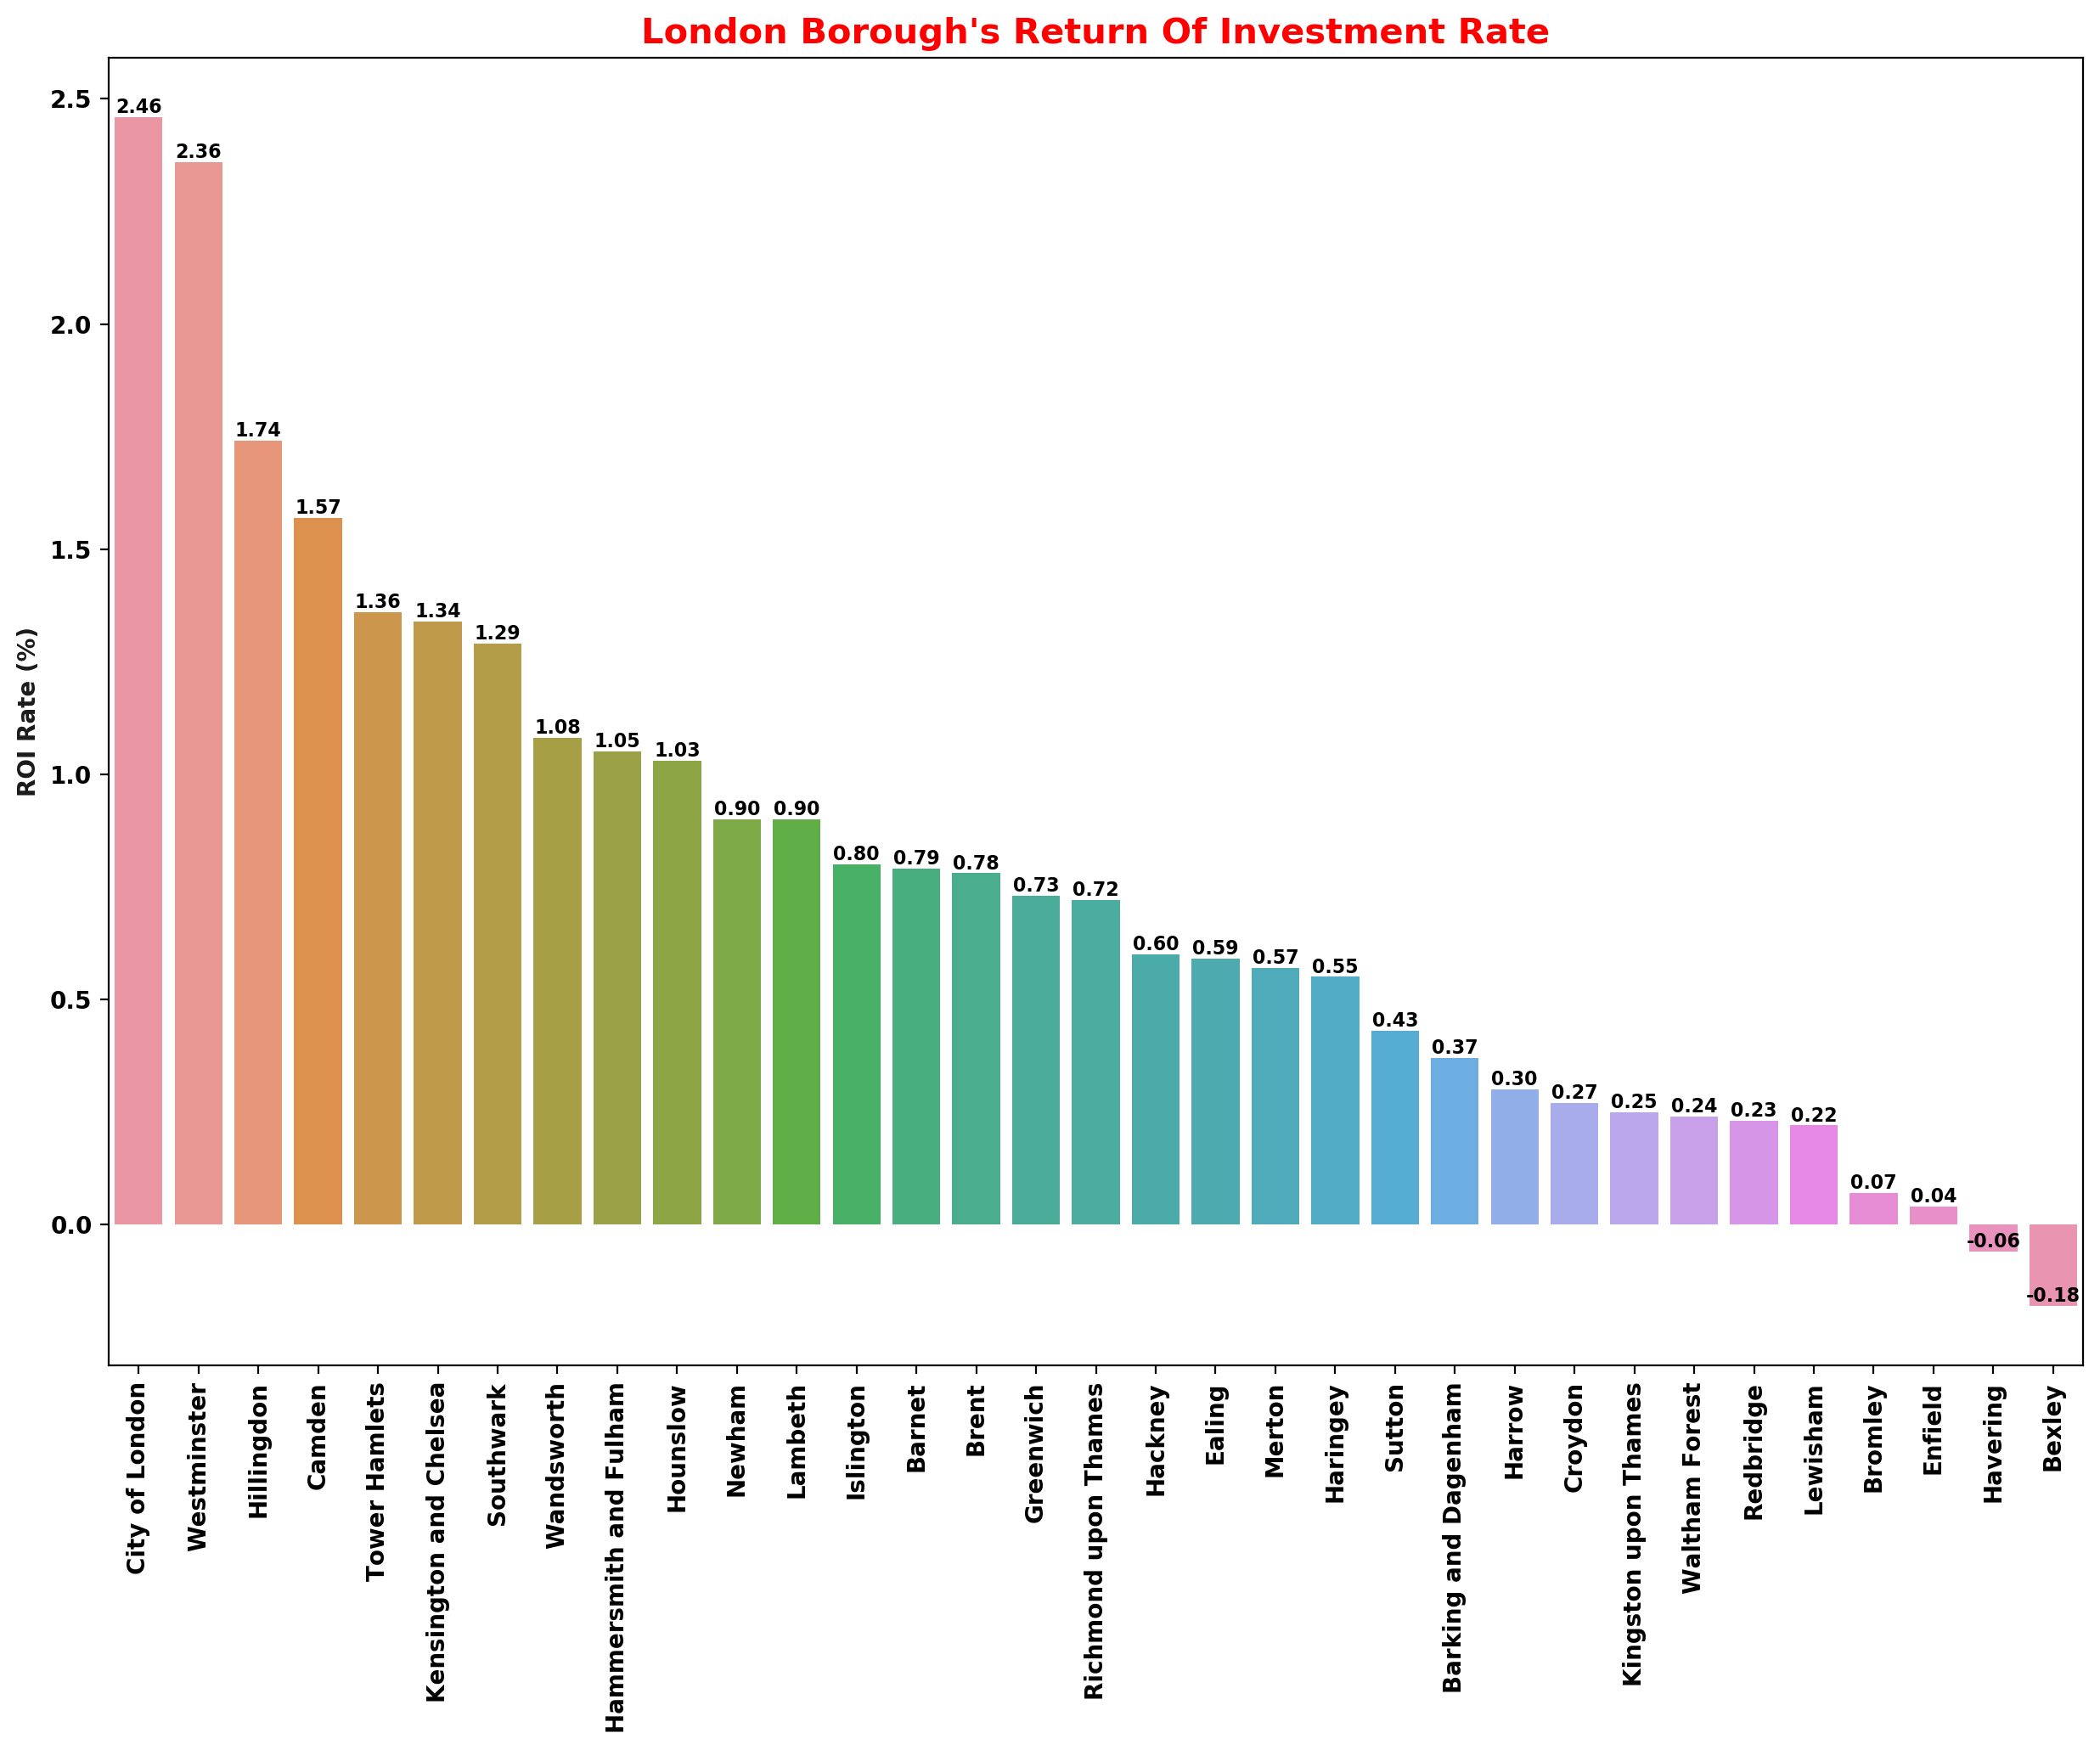

In [52]:
#Barplot for ROI 
uk_borough_final_result = uk_borough_final_result.sort_values("ROI", ascending=False)
plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x="borough", y="ROI", data=uk_borough_final_result)
plt.title("London Borough's Return Of Investment Rate", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("ROI Rate (%)",weight= "bold",c="k")
plt.yticks(weight="bold")
for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', size=8, weight="bold")
plt.savefig('images/11_LondonBoroughsROIBarPlot.png', dpi=200)

plt.show()

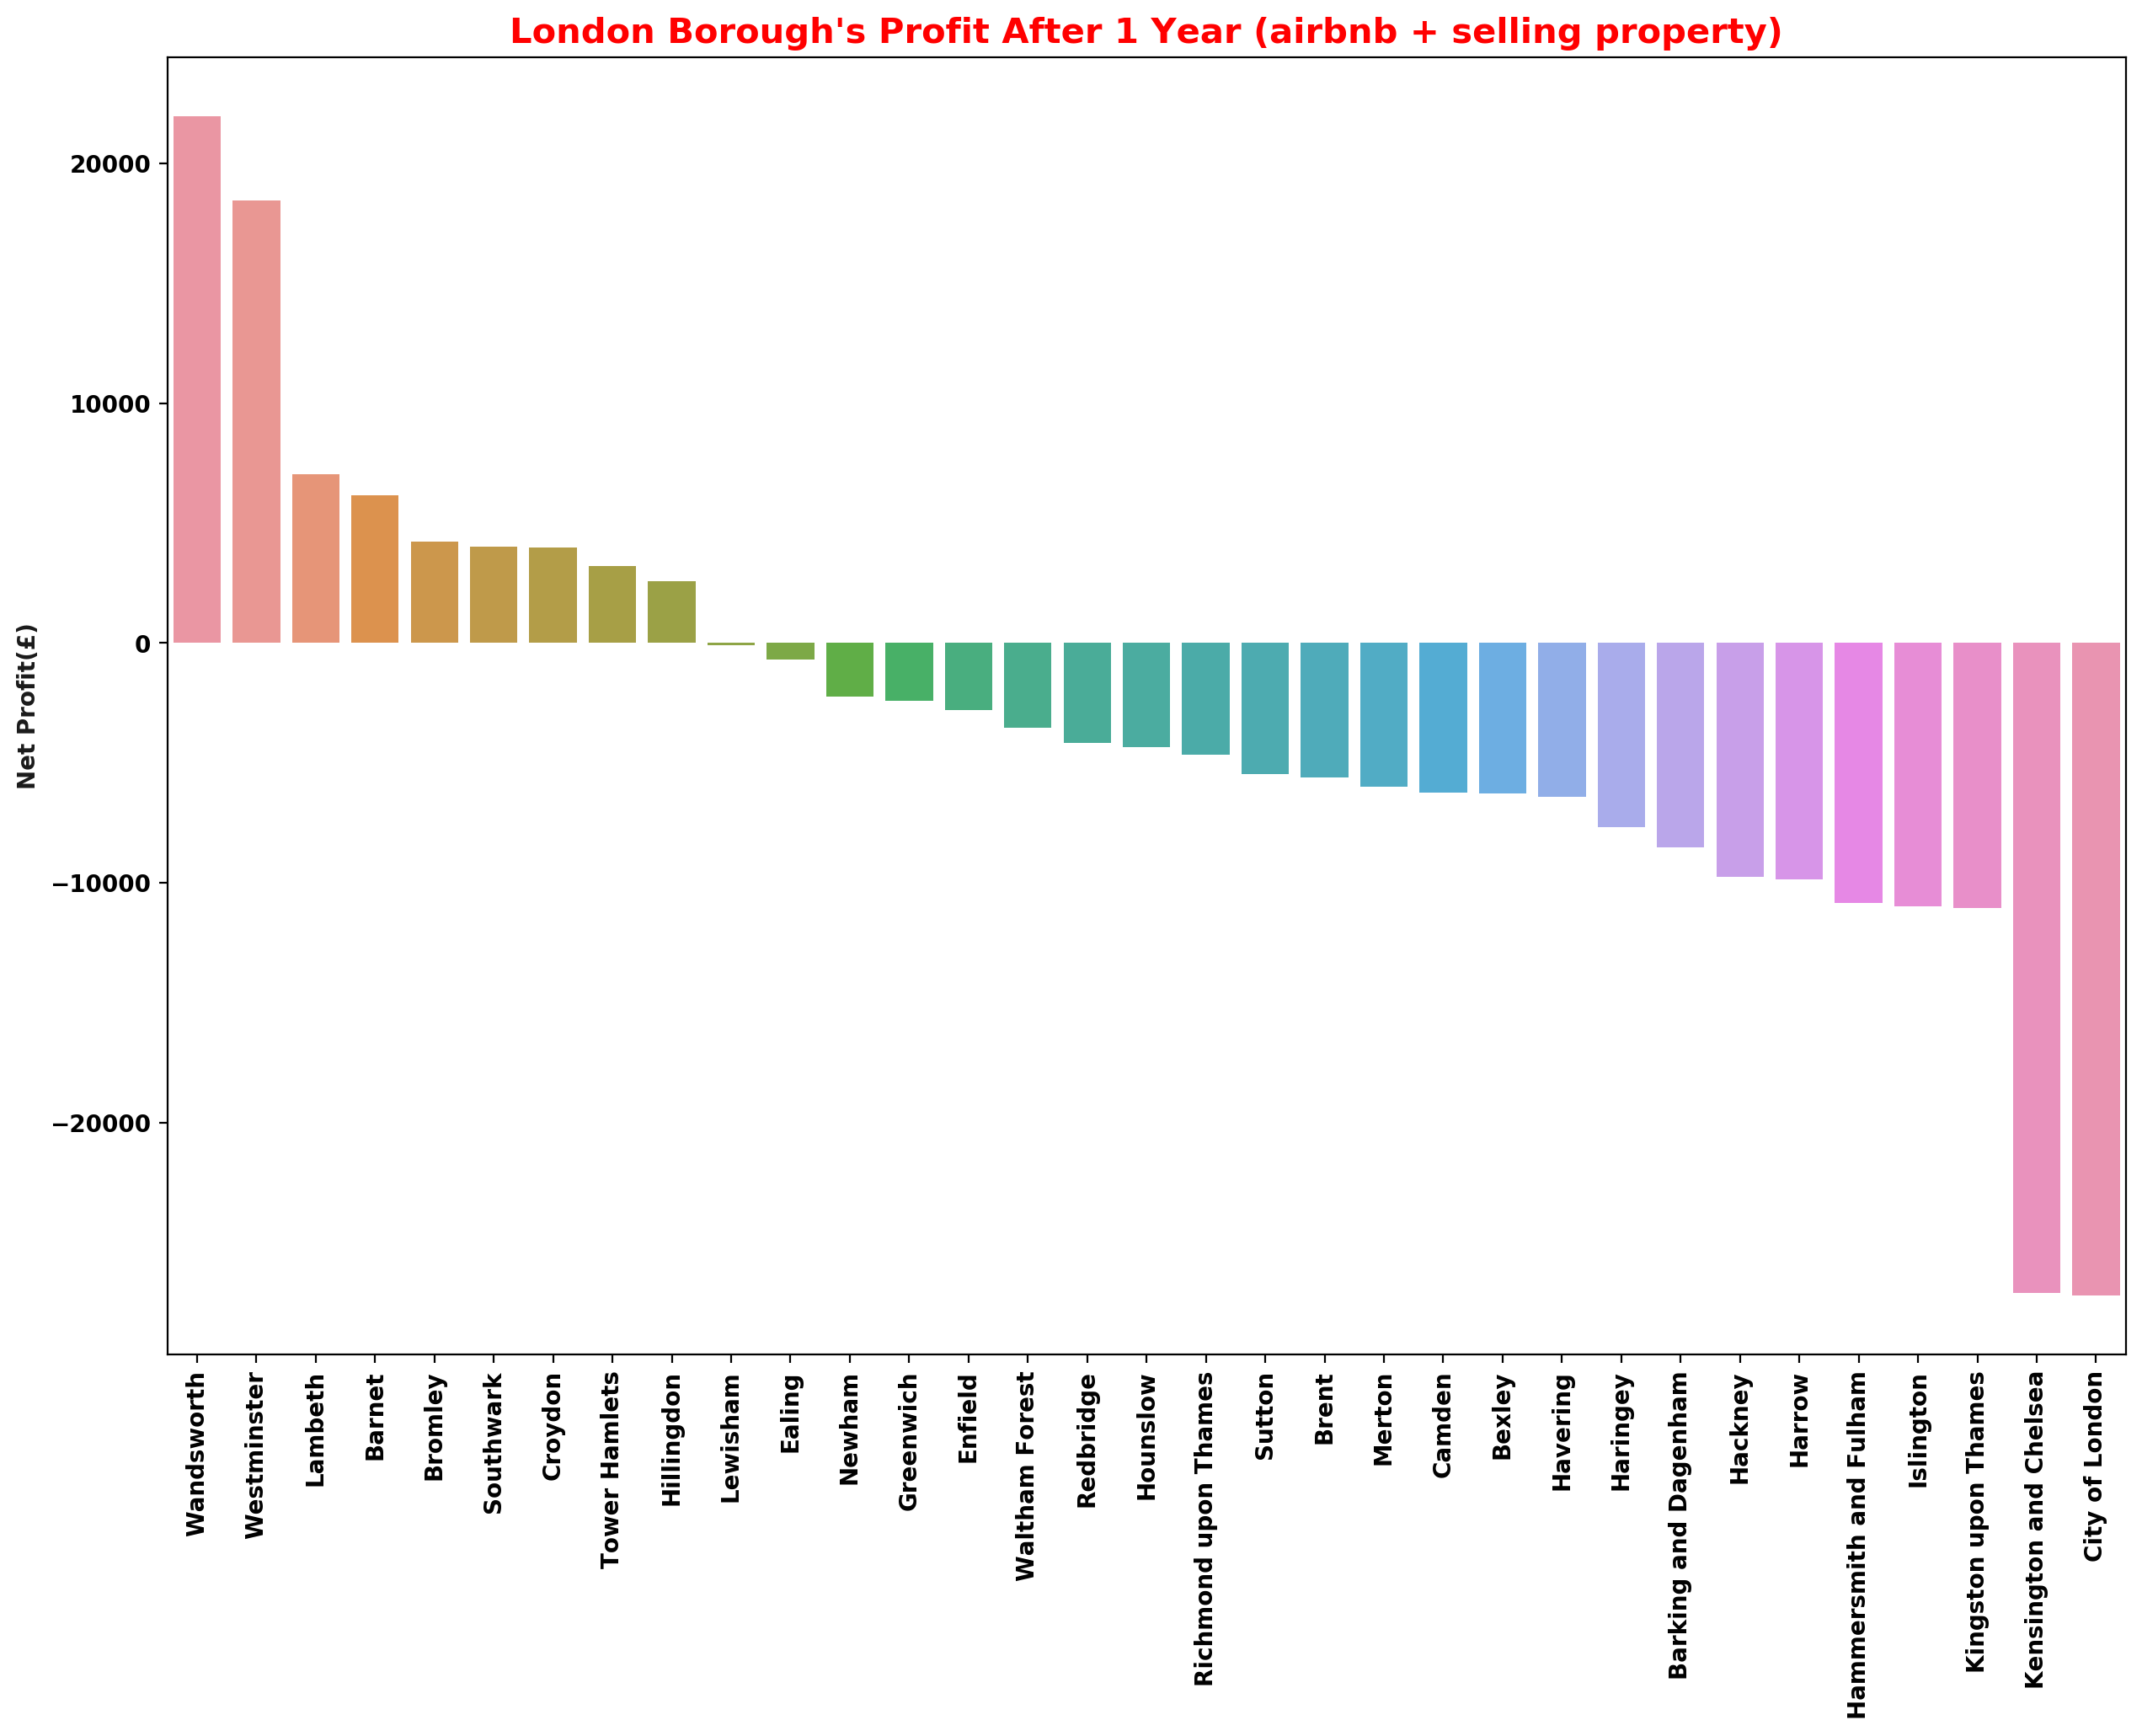

In [53]:
#Barplot for Profit After 1 year 
uk_borough_final_result = uk_borough_final_result.sort_values("profit_aft1", ascending=False)
plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x="borough", y="profit_aft1", data=uk_borough_final_result)
plt.title("London Borough's Profit After 1 Year (airbnb + selling property)", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Net Profit(£)",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.savefig('images/12_LondonBoroughsProfitFeatureBarPlot.png', dpi=200)
plt.show()

In [54]:
uk_borough_final_result.tail(35)

borough  price/night  est_night/year  annual_income  \
31              Wandsworth       126.97           67.94        8626.00   
32             Westminster       218.89          120.70       26420.42   
21                 Lambeth        97.06           80.26        7790.15   
1                   Barnet        91.30           81.40        7431.47   
4                  Bromley        64.28           45.93        2952.41   
27               Southwark       110.54           88.61        9795.13   
7                  Croydon        70.56           57.43        4052.51   
29           Tower Hamlets        94.65           99.58        9425.58   
16              Hillingdon        68.37          172.15       11769.16   
22                Lewisham        70.78           52.23        3696.58   
8                   Ealing        88.21           65.65        5791.05   
24                  Newham        82.52           75.70        6247.06   
10               Greenwich        89.58           65.13        5834.31   
9                  Enfield        68.15           41.69        2841.15   
30          Waltham Forest        70.88           56.96        4037.33   
25               Redbridge        69.58           55.72        3877.03   
17                Hounslow       102.58           71.52        7336.26   
26    Richmond upon Thames       130.11           62.42        8121.76   
28                  Sutton        84.14           55.04        4631.00   
3                    Brent        97.16           71.22        6919.70   
23                  Merton       113.04           50.73        5734.67   
5                   Camden       151.77          115.66       17553.50   
2                   Bexley        58.05           33.77        1960.25   
15                Havering        68.17           36.70        2501.79   
13                Haringey        94.63           65.61        6208.98   
0     Barking and Dagenham        60.60           67.82        4109.75   
11                 Hackney        95.09           66.42        6315.56   
14                  Harrow        81.71           54.89        4485.13   
12  Hammersmith and Fulham       141.85           73.50       10426.03   
18               Islington       116.97           70.71        8271.25   
20    Kingston upon Thames        81.33           54.90        4465.06   
19  Kensington and Chelsea       220.92           93.15       20578.44   
6           City of London       187.41          126.34       23677.81   

    annual_expense  annual_return  avg_house_price  avg_increment  \
31         1971.59        6654.41         588613.0           8.69   
32         2730.60       23689.82         955353.0           8.98   
21         3001.89        4788.26         508419.0           9.17   
1          3144.66        4286.81         519611.0           7.97   
4          2609.03         343.38         436460.0           7.70   
27         3052.00        6743.13         499247.0           9.24   
7          3005.44        1047.07         365441.0           7.78   
29         3155.75        6269.83         438461.0           8.69   
16         4377.52        7391.64         404537.0           7.82   
22         2762.17         934.41         409239.0           9.01   
8          2869.82        2921.23         472913.0           8.10   
24         2791.41        3455.65         363957.0           8.91   
10         2833.94        3000.37         393062.0           8.35   
9          2665.92         175.23         392835.0           7.77   
30         2969.74        1067.59         430502.0           9.14   
25         2866.48        1010.55         412566.0           7.95   
17         2999.92        4336.34         400906.0           7.85   
26         3185.03        4936.73         650028.0           8.01   
28         2941.79        1689.21         371875.0           7.71   
3          3041.15        3878.55         474513.0           8.63   
23         2700.33        3034.34         506193.0   

In [55]:
#Scale values
scaler_final = MinMaxScaler()
uk_borough_final_result[['price/night', 'est_night/year','annual_return','avg_house_price','avg_increment','profit_aft1','ROI']] = scaler_final.fit_transform(uk_borough_final_result[['price/night', 'est_night/year','annual_return','avg_house_price','avg_increment','profit_aft1','ROI']])
uk_borough_final_result["avg_house_price"] = 1-(uk_borough_final_result["avg_house_price"])
uk_borough_final_result_scale=uk_borough_final_result[['borough','price/night', 'est_night/year','annual_return','avg_house_price','avg_increment','avg_volume/year_scale','profit_aft1','ROI']]
uk_borough_final_result_scale=round(uk_borough_final_result_scale,2)
uk_borough_final_result_scale

borough  price/night  est_night/year  annual_return  \
31              Wandsworth         0.42            0.25           0.30   
32             Westminster         0.99            0.63           1.00   
21                 Lambeth         0.24            0.34           0.22   
1                   Barnet         0.20            0.34           0.20   
4                  Bromley         0.04            0.09           0.04   
27               Southwark         0.32            0.40           0.30   
7                  Croydon         0.08            0.17           0.07   
29           Tower Hamlets         0.22            0.48           0.28   
16              Hillingdon         0.06            1.00           0.33   
22                Lewisham         0.08            0.13           0.06   
8                   Ealing         0.19            0.23           0.15   
24                  Newham         0.15            0.30           0.17   
10               Greenwich         0.19            0.23           0.15   
9                  Enfield         0.06            0.06           0.03   
30          Waltham Forest         0.08            0.17           0.07   
25               Redbridge         0.07            0.16           0.07   
17                Hounslow         0.27            0.27           0.20   
26    Richmond upon Thames         0.44            0.21           0.23   
28                  Sutton         0.16            0.15           0.10   
3                    Brent         0.24            0.27           0.19   
23                  Merton         0.34            0.12           0.15   
5                   Camden         0.58            0.59           0.60   
2                   Bexley         0.00            0.00           0.00   
15                Havering         0.06            0.02           0.02   
13                Haringey         0.22            0.23           0.16   
0     Barking and Dagenham         0.02            0.25           0.07   
11                 Hackney         0.23            0.24           0.17   
14                  Harrow         0.15            0.15           0.09   
12  Hammersmith and Fulham         0.51            0.29           0.35   
18               Islington         0.36            0.27           0.25   
20    Kingston upon Thames         0.14            0.15           0.08   
19  Kensington and Chelsea         1.00            0.43           0.75   
6           City of London         0.79            0.67           0.87   

    avg_house_price  avg_increment  avg_volume/year_scale  profit_aft1   ROI  
31             0.69           0.50                   1.00         1.00  0.48  
32             0.31           0.63                   0.63         0.93  0.96  
21             0.78           0.72                   0.71         0.70  0.41  
1              0.77           0.16                   0.81         0.68  0.37  
4              0.85           0.03                   0.90         0.64  0.09  
27             0.79           0.75                   0.60         0.63  0.56  
7              0.93           0.07                   0.88         0.63  0.17  
29             0.85           0.50                   0.62         0.62  0.58  
16             0.89           0.08                   0.62         0.61  0.73  
22             0.88           0.65                   0.64         0.55  0.15  
8              0.82           0.22                   0.65         0.54  0.29  
24             0.93           0.60                   0.50         0.51  0.41  
10             0.90           0.33                   0.56         0.50  0.34  
9              0.90           0.06                   0.68         0.50  0.08  
30             0.86           0.71                   0.55         0.48  0.16  
25             0.88           0.15                   0.60         0.47  0.16  
17             0.89           0.10                   0.49         0.46  0.46  
26             0.63           0.17                   0.57         0.46  0.34  
2

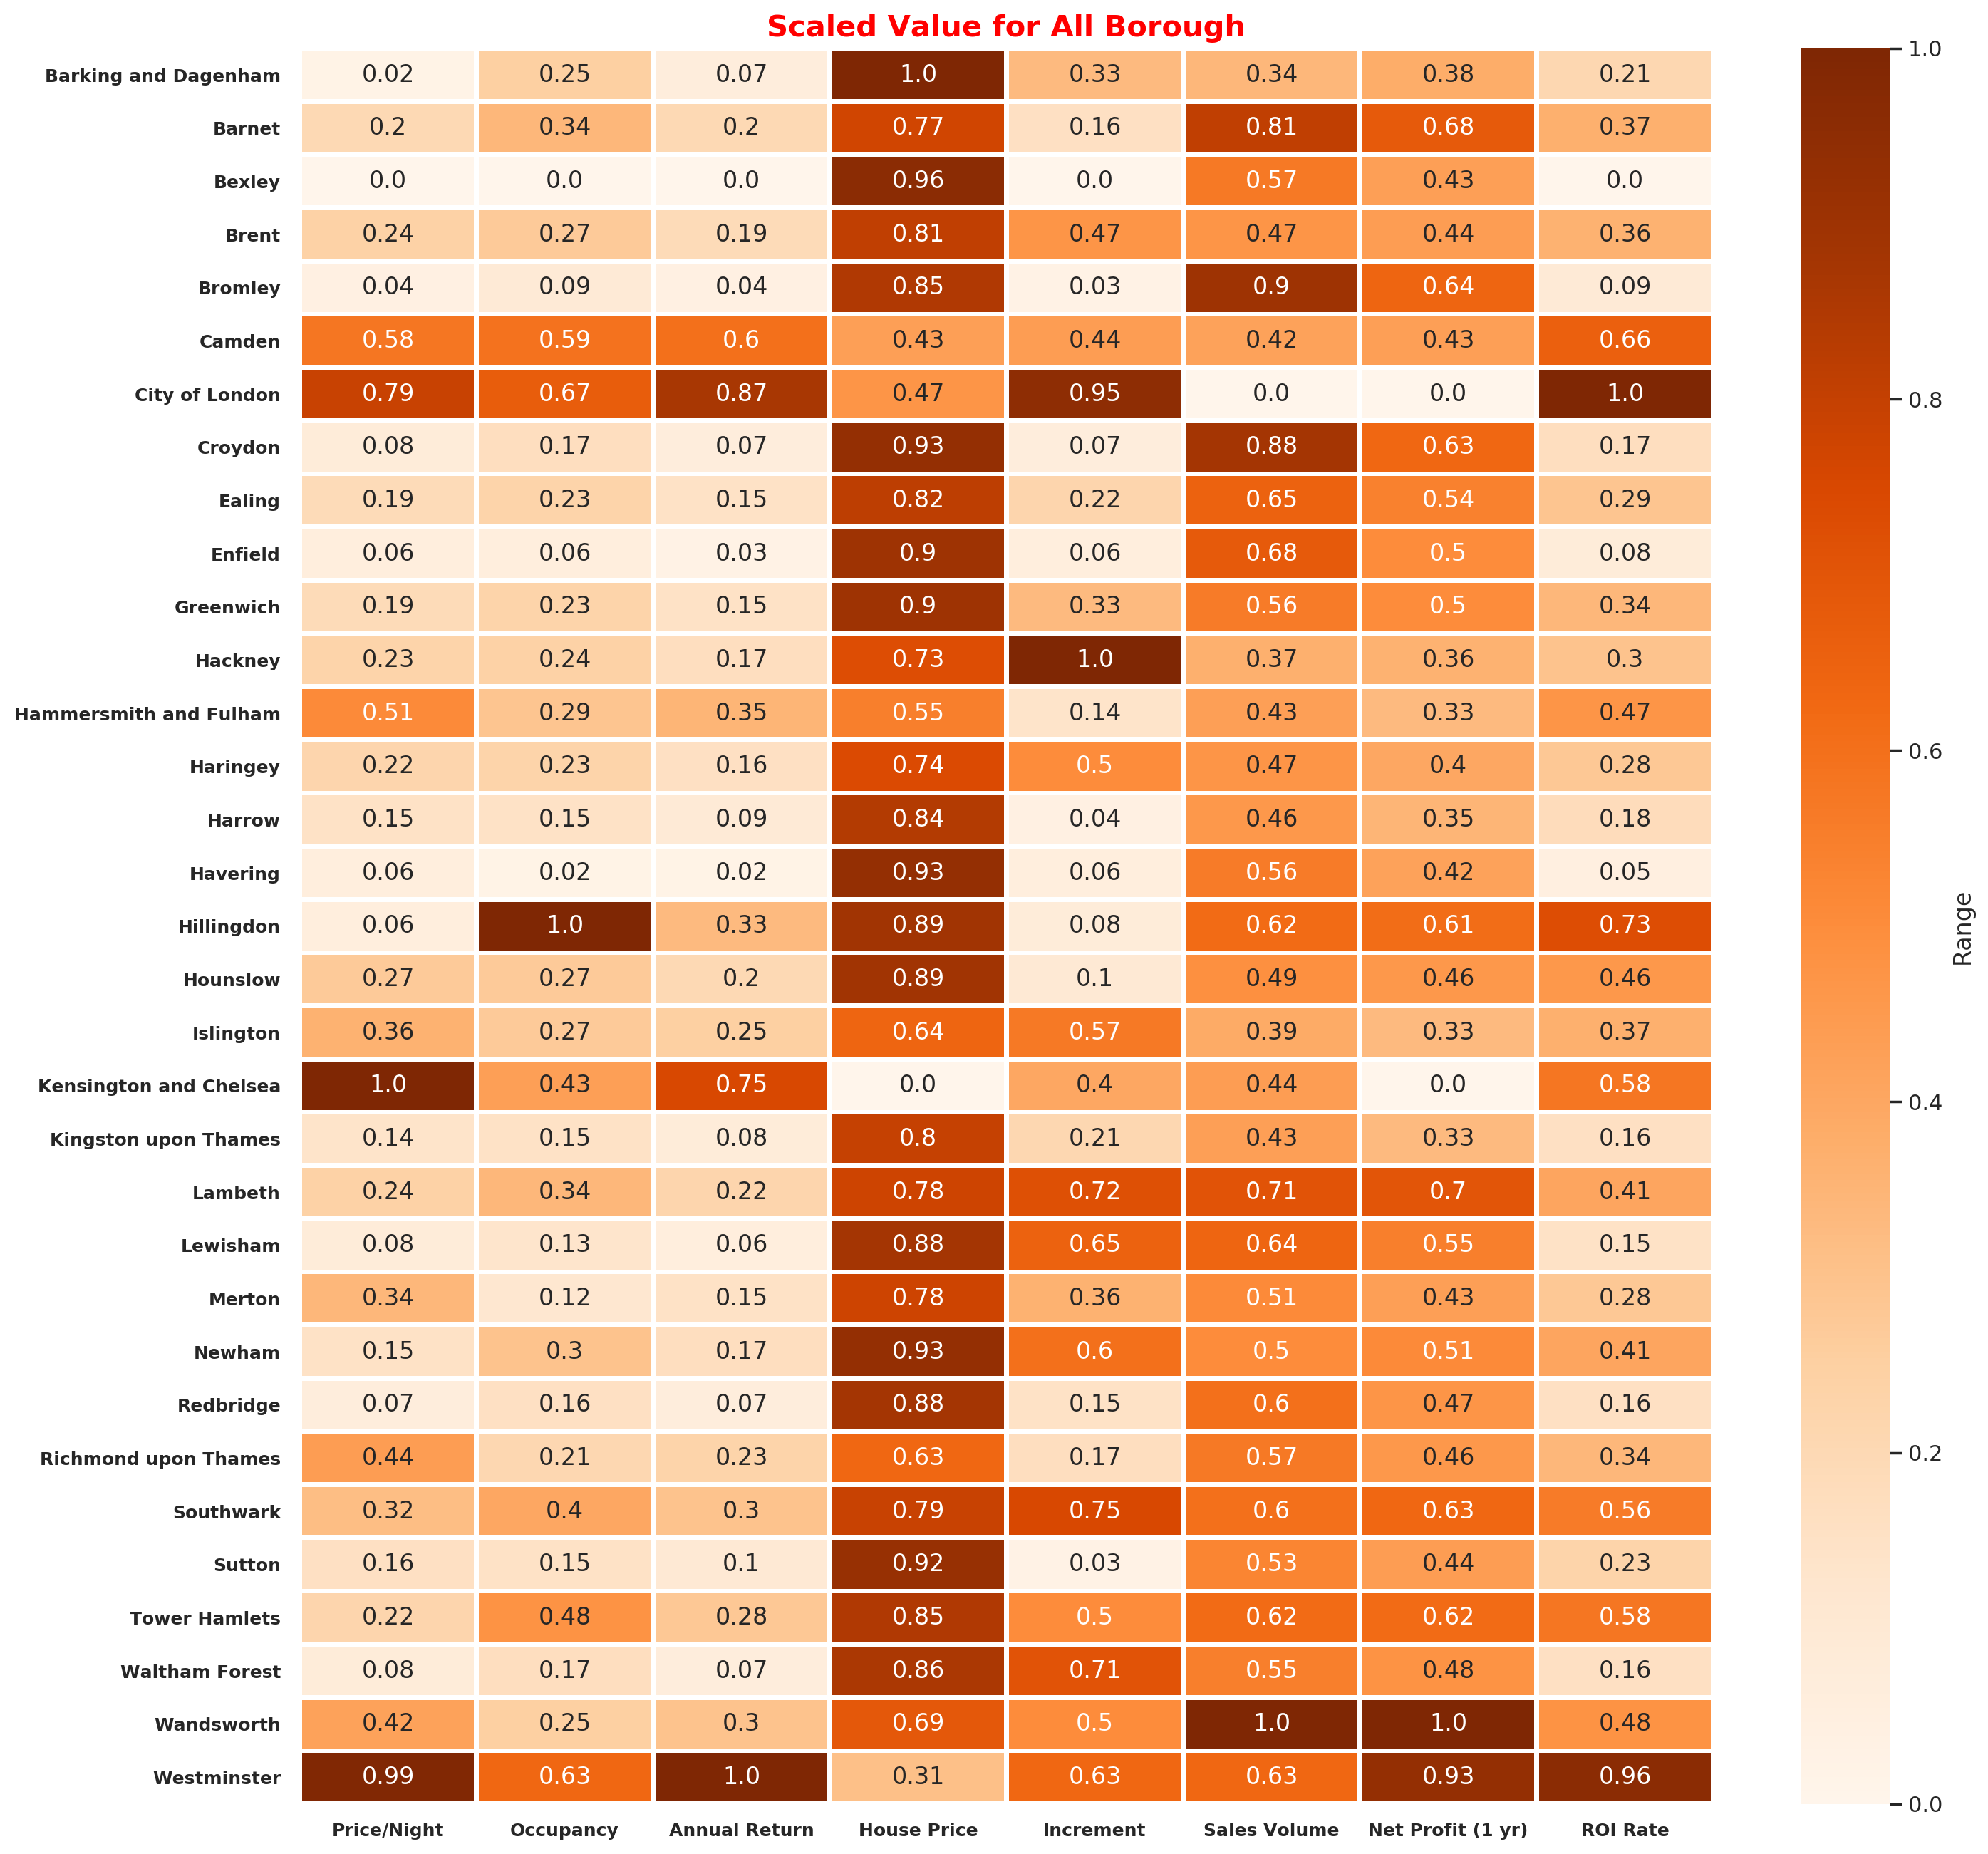

In [56]:
#Heatmap of Scaled Values for all Borough
uk_borough_final_result_scale_heatmap = uk_borough_final_result_scale.groupby("borough").mean()
plt.figure(figsize=(16,16),dpi=200),
sns.set(font_scale=1)
sns.heatmap(uk_borough_final_result_scale_heatmap,annot=True,fmt=".2", linewidths=2, cmap="Oranges",cbar_kws={'label': 'Range','orientation':'vertical'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=9)
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5],["Price/Night","Occupancy","Annual Return","House Price","Increment","Sales Volume","Net Profit (1 yr)","ROI Rate"],weight="bold",rotation=0,size=9)
plt.title("Scaled Value for All Borough",weight="bold",c="red", fontsize=15)
plt.savefig('images/13_HeatmapScaledValue.png', dpi=200)
plt.show()


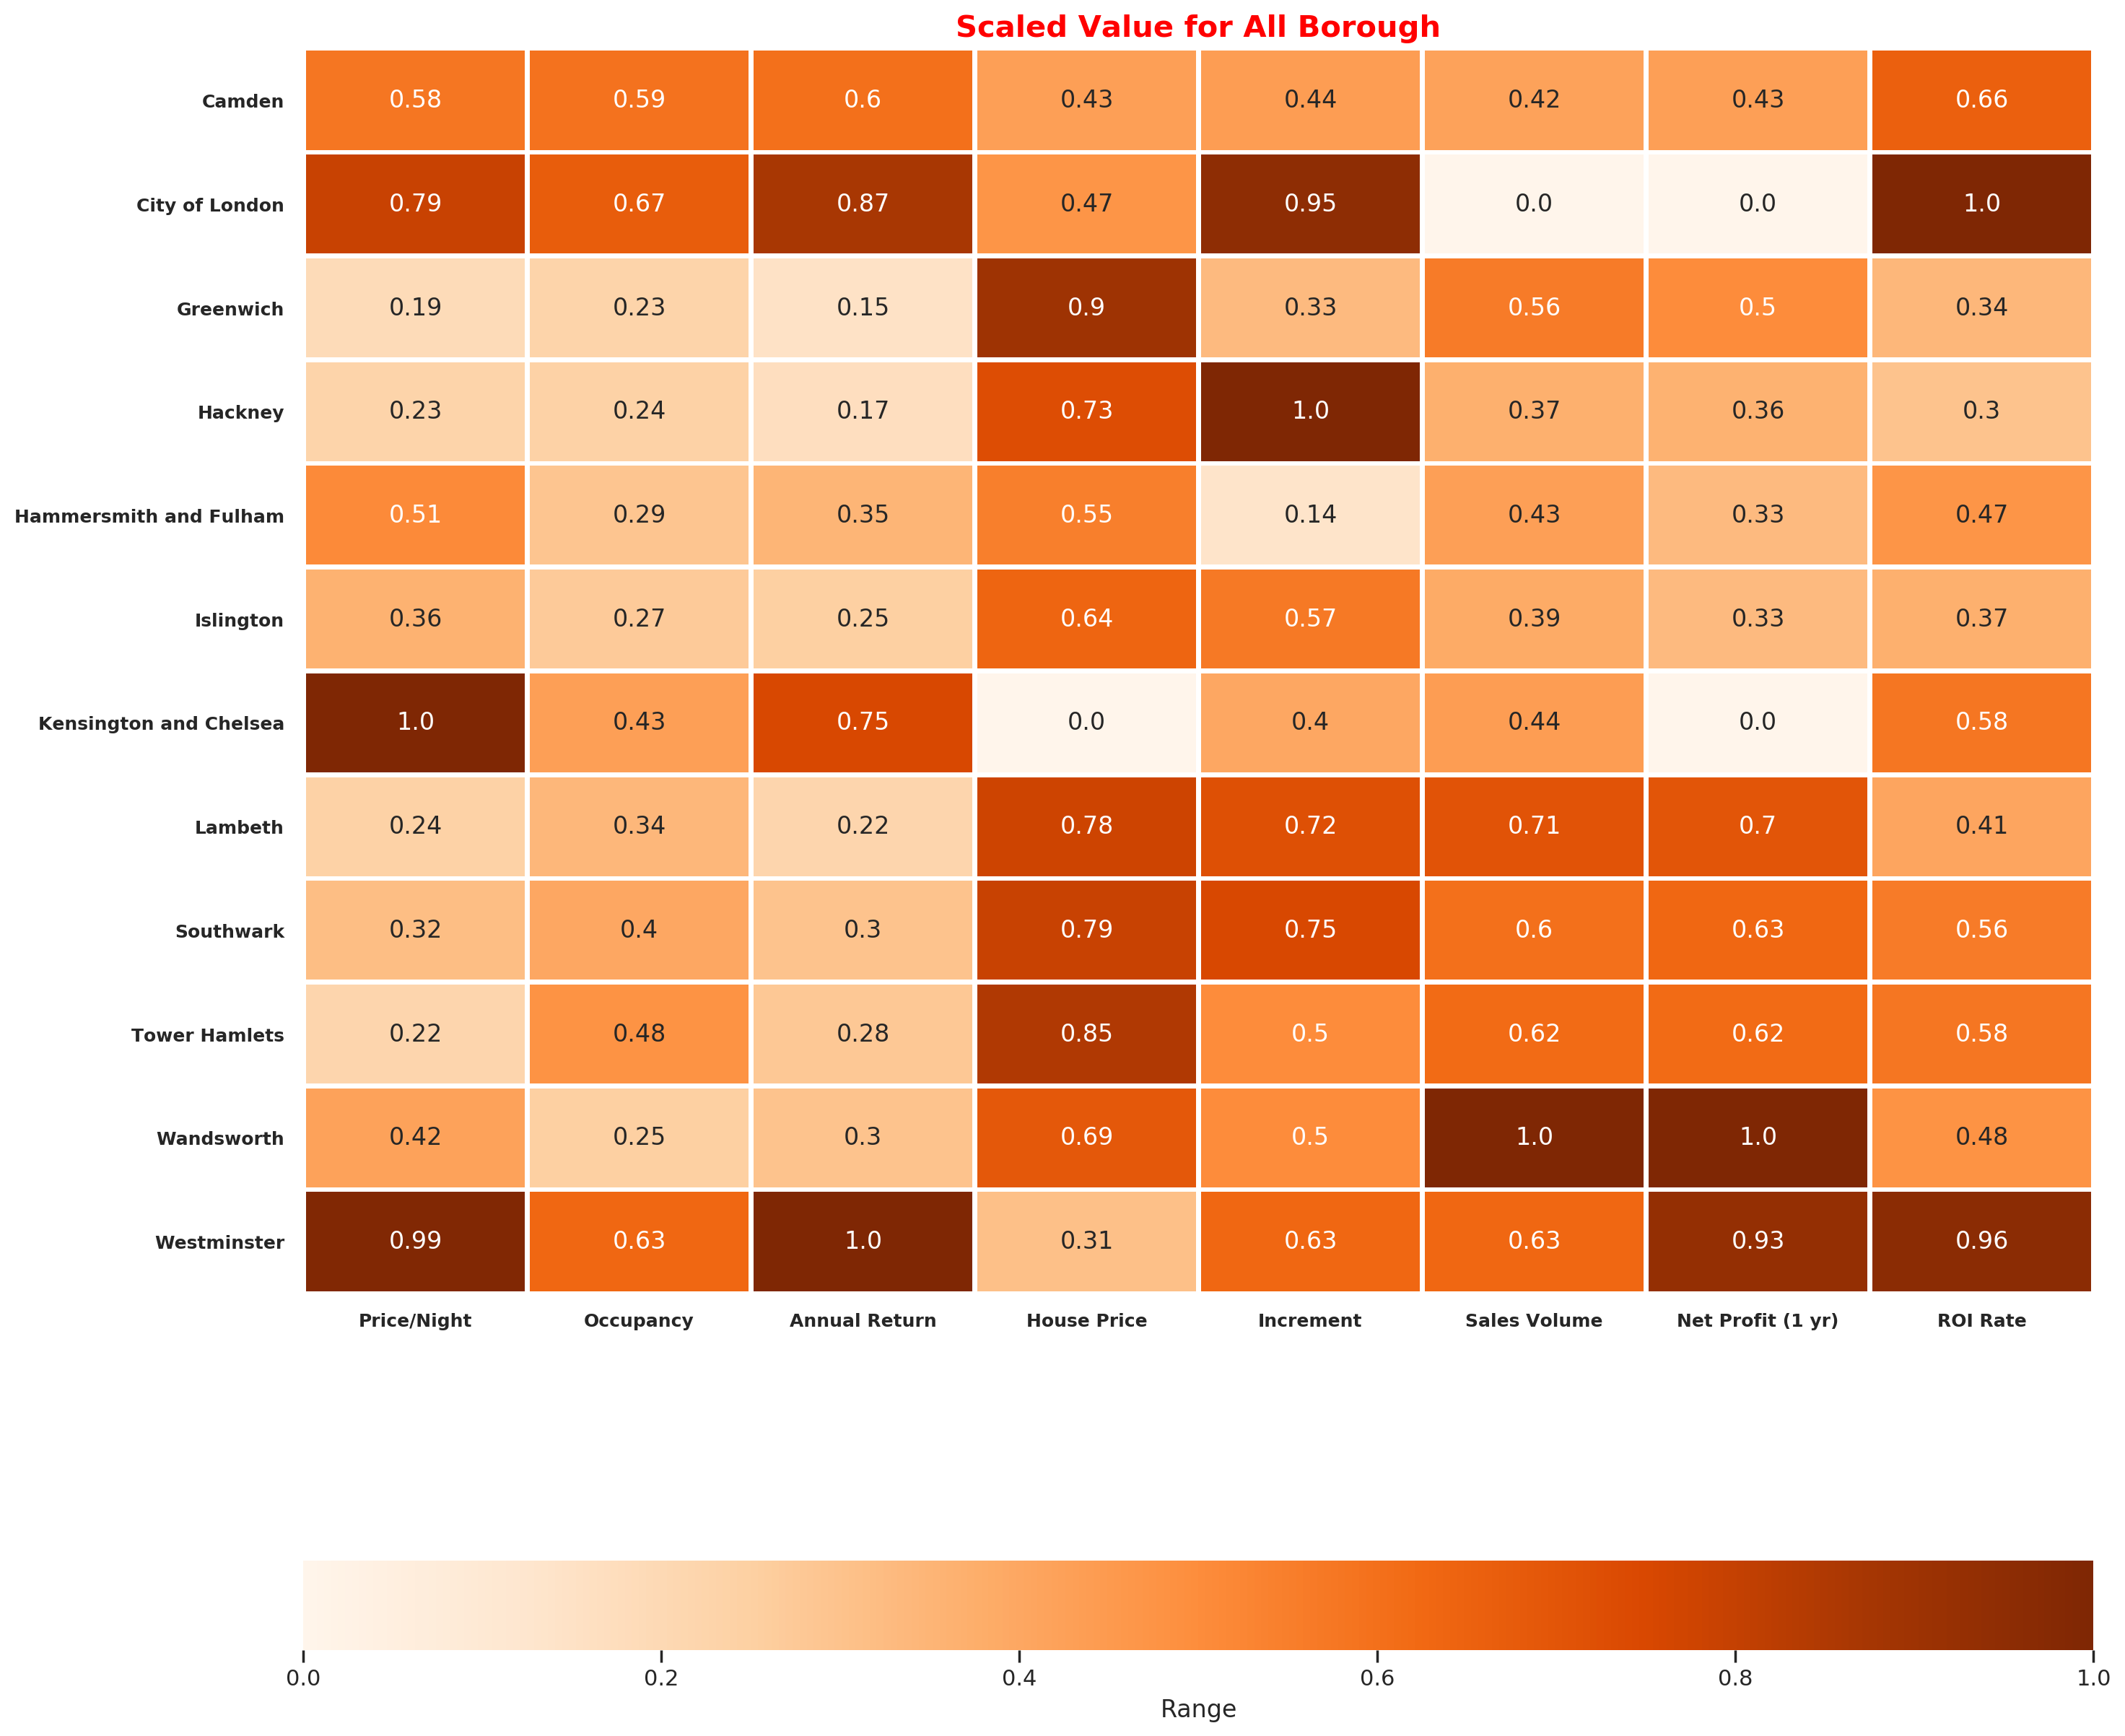

In [57]:
#Heatmap of Scaled Values for Inner Borough

uk_borough_final_result_scale_heatmap_inner_list = uk_borough_final_result_scale_heatmap.reset_index()
inner_london_final_list=uk_borough_final_result_scale_heatmap_inner_list[uk_borough_final_result_scale_heatmap_inner_list["borough"].isin(inner_london)]
inner_london_final_list_heatmap = inner_london_final_list.groupby("borough").mean()
plt.figure(figsize=(16,16),dpi=200),
sns.set(font_scale=1)
sns.heatmap(inner_london_final_list_heatmap,annot=True,fmt=".2", linewidths=2, cmap="Oranges",cbar_kws={'label': 'Range','orientation':'horizontal'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=9)
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5],["Price/Night","Occupancy","Annual Return","House Price","Increment","Sales Volume","Net Profit (1 yr)","ROI Rate"],weight="bold",rotation=0,size=9)
plt.title("Scaled Value for All Borough",weight="bold",c="red", fontsize=15)
plt.savefig('images/14_HeatmapScaledValueInner.png', dpi=200)
plt.show()

In [58]:
uk_borough_clint_cons = uk_borough_brief_result_profit[(uk_borough_brief_result["total_budget"]<750000)&(uk_borough_brief_result["inner_outer"]=="inner")].sort_values("ROI",ascending=False)

uk_borough_clint_cons[["borough","annual_return","Average","avg_increment","total_initial","profit_aft1","ROI"]]


borough  annual_return   Average  avg_increment  total_initial  \
29  Tower Hamlets    6269.831644  438461.0           8.69       21923.05   
27      Southwark    6743.127534  499247.0           9.24       24962.35   
31     Wandsworth    6654.410274  588613.0           8.69       29430.65   
21        Lambeth    4788.261781  508419.0           9.17       25420.95   
18      Islington    5354.499452  634610.0           8.84       31730.50   
10      Greenwich    3000.372877  393062.0           8.35       19653.10   
11        Hackney    3506.297945  555655.0           9.76       27782.75   

     profit_aft1       ROI  
29  14109.185478  1.361870  
27  18367.095435  1.286342  
31  17178.369254  1.076689  
21  16276.116191  0.896947  
18  17636.106782  0.803568  
10   8715.003029  0.726984  
11  19282.454705  0.600972

In [59]:
#Exporting Brief csv

uk_borough_final_result_scale_heatmap.to_csv("/Users/yalinyener/GitHub/yalinyener/EDA-Airbnb-London/data/BriefCSV/UK_Borough_Analys.csv")

inner_london_final_list_heatmap.to_csv("/Users/yalinyener/GitHub/yalinyener/EDA-Airbnb-London/data/BriefCSV/UK_InnerBorough_Analys.csv")

##### 